In [1]:
import pandas as pd
import camelot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")


c:\Users\guard\AppData\Local\Programs\Python\Python310\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
# Cargar el archivo Excel
file_path = r'C:\Users\guard\OneDrive\Desktop\Henry Data Science\Proyecto PIDA\Datos\Internet.xlsx'
excel_file = pd.ExcelFile(file_path)

# Listar todas las hojas en el archivo
print(excel_file.sheet_names)


['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']


Todos los análisis contarán con: búsqueda de valores faltantes, valores atípicos/extremos u outliers, registros duplicados, análisis de distribución y análisis de correlación (excluyendo columnas no numéricas). Además, habrá casos en donde se profundizará con análisis de tendencias temporales. Los análisis fueron agrupados por: Análisis de Ingresos, Análisis de Velocidad, Análisis de Accesos, Análisis de Penetración y Análisis de Competidores.

###### **Importante**: por la naturaleza de los datos en los casos en donde se encuentren las columnas Provincias, tendremos un alto número de duplicados correspondiente a esto mismo, ya que son una cantidad finita de provincias que se repiten año a año.

## EDA

### Análisis de Ingresos

Considerando que la solicitante del análisis es una empresa de telecomunicaciones, me parece relevante comenzar el análisis por el valor monetario.

    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023
Valores faltantes por columna:
 Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64
Número de registros duplicados: 0


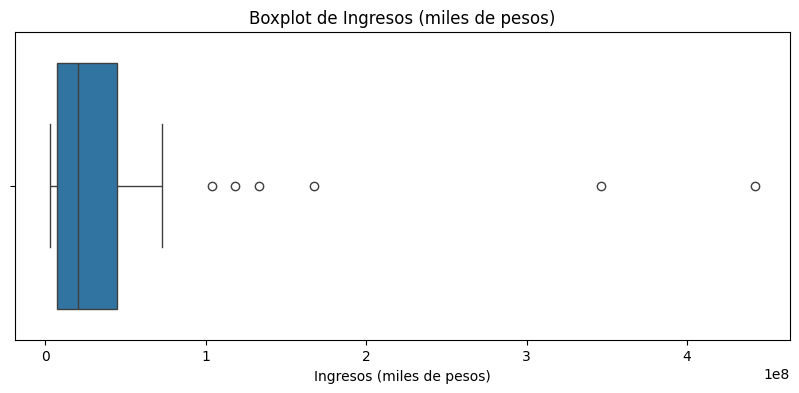

In [3]:
# Seleccionar la hoja 'Ingresos '
df1 = pd.read_excel(file_path, sheet_name='Ingresos ')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df1.head())

# Búsqueda de valores faltantes
missing_values = df1.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# Detección de registros duplicados
duplicate_records = df1.duplicated().sum()
print("Número de registros duplicados:", duplicate_records)

# Identificación de valores atípicos/extremos en 'Ingresos (miles de pesos)'

plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.show()

En el gráfico anterior observamos que hay 6 valores que son outliers, por lo que es bueno poder identificar ¿qué trimestres fueron?, ¿qué tan alejados se encuentran esos valores del promedio trimestral? esta pregunta viene dada pensando que el comportamiento pudiese ser estacional o si responde a otra variable externa como pudiese ser la inflación.

Filas con valores atípicos:
     Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2024          2               4.420322e+08   Abr-Jun 2024
1  2024          1               3.461990e+08   Ene-Mar 2024
2  2023          4               1.673760e+08   Oct-Dic 2023
3  2023          3               1.331066e+08  Jul-Sept 2023
4  2023          2               1.180603e+08   Jun-Mar 2023
5  2033          1               1.041350e+08   Ene-Mar 2023

Promedios por Trimestre:
 Trimestre
1    5.709575e+07
2    6.819111e+07
3    3.348653e+07
4    3.876715e+07
Name: Ingresos (miles de pesos), dtype: float64

Valores atípicos y su diferencia con el promedio del trimestre:
     Año  Trimestre  Ingresos (miles de pesos)        Periodo  \
0  2024          2               4.420322e+08   Abr-Jun 2024   
1  2024          1               3.461990e+08   Ene-Mar 2024   
2  2023          4               1.673760e+08   Oct-Dic 2023   
3  2023          3               1.331066e+08  Jul-Sept 2023   
4

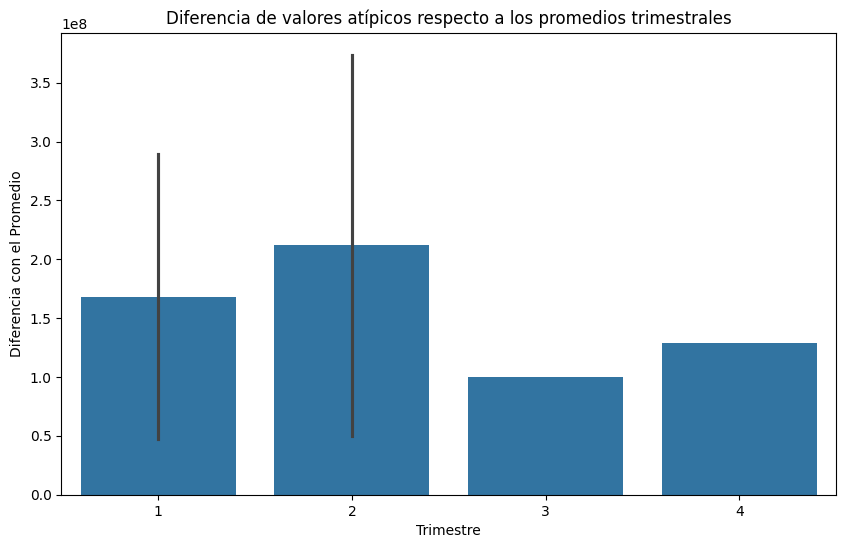

In [4]:
# Identificar los outliers en la columna 'Ingresos (miles de pesos)'
Q1 = df1['Ingresos (miles de pesos)'].quantile(0.25)
Q3 = df1['Ingresos (miles de pesos)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['Ingresos (miles de pesos)'] < lower_bound) | (df1['Ingresos (miles de pesos)'] > upper_bound)]
print("Filas con valores atípicos:\n", outliers)

# Calcular promedios por trimestre
mean_by_quarter = df1.groupby('Trimestre')['Ingresos (miles de pesos)'].mean()
print("\nPromedios por Trimestre:\n", mean_by_quarter)

# Comparar valores atípicos con los promedios de sus respectivos trimestres
outliers['Promedio del Trimestre'] = outliers['Trimestre'].map(mean_by_quarter)
outliers['Diferencia con Promedio'] = outliers['Ingresos (miles de pesos)'] - outliers['Promedio del Trimestre']
print("\nValores atípicos y su diferencia con el promedio del trimestre:\n", outliers)

# Graficar las diferencias de los valores atípicos respecto a los promedios trimestrales
plt.figure(figsize=(10, 6))
sns.barplot(x='Trimestre', y='Diferencia con Promedio', data=outliers)
plt.title('Diferencia de valores atípicos respecto a los promedios trimestrales')
plt.xlabel('Trimestre')
plt.ylabel('Diferencia con el Promedio')
plt.show()


Hemos conseguido dos cosas, primero es muy posible que el incremento en estos datos venga dado por inflación, ya que observamos que corresponden a los últimos registros, y segundo que hubo un error de transcripción en la columna 'Año' en el índice 5 donde debe ir 2023 estaba 2033, para verificar que el resto de datos esté correcto imprimiremos los datos únicos de la columna 'Año'

In [5]:
# Corregir el valor del 'Año' en el índice 5
df1.loc[5, 'Año'] = 2023

# Verificar la corrección
print(df1.loc[5])

# Obtener los valores únicos de la columna 'Año'
unique_years = df1['Año'].unique()
print("Años únicos en la columna 'Año':\n", unique_years)



Año                                  2023
Trimestre                               1
Ingresos (miles de pesos)    104134992.81
Periodo                      Ene-Mar 2023
Name: 5, dtype: object
Años únicos en la columna 'Año':
 [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Para minimizar el efecto inflacionario en el análisis del ingreso vamos a proceder a transformar los datos de Ingreso en dólares, para esto utilizaremos los datos oficiales correspondientes al tipo de cambio A 3500

In [6]:
# Cargar el archivo CSV en el dataframe dftp
dftp = pd.read_csv(r'C:\Users\guard\OneDrive\Desktop\Henry Data Science\Proyecto PIDA\Datos\datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv')

# Convertir 'indice_tiempo' a formato de fecha
dftp['indice_tiempo'] = pd.to_datetime(dftp['indice_tiempo'])

# Crear columnas de 'Año' y 'Trimestre'
dftp['Año'] = dftp['indice_tiempo'].dt.year
dftp['Trimestre'] = dftp['indice_tiempo'].dt.quarter

# Calcular el promedio trimestral de 'tipo_cambio_a3500'
tipo_cambio_trimestral = dftp.groupby(['Año', 'Trimestre'])['tipo_cambio_a3500'].mean().reset_index()
tipo_cambio_trimestral.rename(columns={'tipo_cambio_a3500': 'Tipo de Cambio Trimestral'}, inplace=True)

print(tipo_cambio_trimestral.head())


    Año  Trimestre  Tipo de Cambio Trimestral
0  2002          1                   2.474174
1  2002          2                   3.281251
2  2002          3                   3.622743
3  2002          4                   3.557733
4  2003          1                   3.171191


In [7]:
# Unir el dataframe tipo_cambio_trimestral con df1 para agregar la columna 'Tipo de Cambio Trimestral'
df1 = pd.merge(df1, tipo_cambio_trimestral, on=['Año', 'Trimestre'], how='left')

print(df1.head())


    Año  Trimestre  Ingresos (miles de pesos)        Periodo  \
0  2024          2               4.420322e+08   Abr-Jun 2024   
1  2024          1               3.461990e+08   Ene-Mar 2024   
2  2023          4               1.673760e+08   Oct-Dic 2023   
3  2023          3               1.331066e+08  Jul-Sept 2023   
4  2023          2               1.180603e+08   Jun-Mar 2023   

   Tipo de Cambio Trimestral  
0                 864.546300  
1                 834.312456  
2                 446.752258  
3                 312.147560  
4                 231.736316  


In [8]:
# Calcular la columna 'Ingreso (miles de dólares)'
df1['Ingreso (miles de dólares)'] = (df1['Ingresos (miles de pesos)'] * 1000) / df1['Tipo de Cambio Trimestral'] / 1000

print(df1.head())

    Año  Trimestre  Ingresos (miles de pesos)        Periodo  \
0  2024          2               4.420322e+08   Abr-Jun 2024   
1  2024          1               3.461990e+08   Ene-Mar 2024   
2  2023          4               1.673760e+08   Oct-Dic 2023   
3  2023          3               1.331066e+08  Jul-Sept 2023   
4  2023          2               1.180603e+08   Jun-Mar 2023   

   Tipo de Cambio Trimestral  Ingreso (miles de dólares)  
0                 864.546300               511288.020884  
1                 834.312456               414951.237539  
2                 446.752258               374650.630074  
3                 312.147560               426422.021376  
4                 231.736316               509459.553304  


En el siguiente gráfico vemos que, efectivamente, el comportamiento creciente de los ingresos está distorsionado por la inflación y que en mayor o menor medida el comportamiento de los ingresos sigue un patrón estacionario, se observa que traía un comportamiento alcista hasta el año 2017 y que luego presenta una caída, la cual vino acompañada por la pandemia, de estos datos no podemos afirmar si fue producto de esta debido a que la caída se genera primero. Se observa que desde el primer trimestre de 2020 hay una tendencia alcista con mínimos y máximos cada vez más altos, sin embargo no se alcanzaron los máximos observados en el período de estudio, siendo interrumpido por una caída importante en el primer trimestre de 2024. Más adelante veremos si la caída en ingresos viene dada por una disminución en precios o una disminución en conexiones.

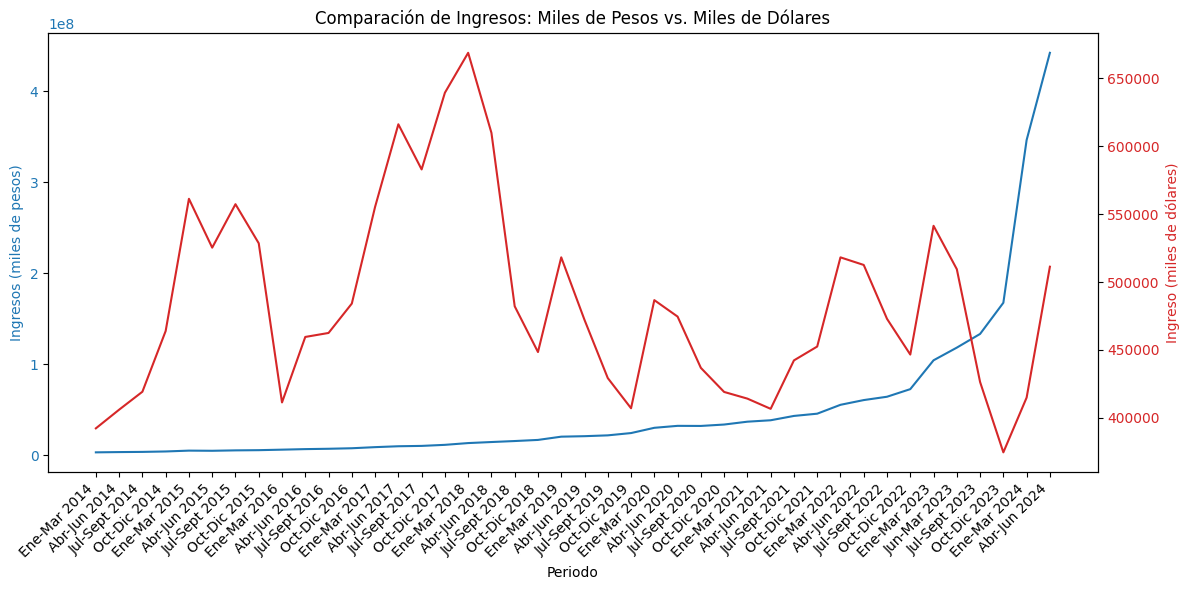

In [9]:
# Crear el gráfico de líneas con dos escalas
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de 'Ingreso (miles de pesos)'
color = 'tab:blue'
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Ingresos (miles de pesos)', color=color)
ax1.plot(df1['Periodo'], df1['Ingresos (miles de pesos)'], color=color, label='Ingresos (miles de pesos)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_xaxis()  # Invertir el eje x para mostrar del más reciente al más antiguo

# Crear un segundo eje y para 'Ingreso (miles de dólares)'
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Ingreso (miles de dólares)', color=color)
ax2.plot(df1['Periodo'], df1['Ingreso (miles de dólares)'], color=color, label='Ingreso (miles de dólares)')
ax2.tick_params(axis='y', labelcolor=color)

# Sincronizar el eje x del segundo eje con el primero para que ambos se muestren de derecha a izquierda
ax2.set_xlim(ax1.get_xlim())

# Ajustar el formato del eje del 'Período' para que sea legible
ax1.set_xticklabels(df1['Periodo'], rotation=45, ha='right')

# Agregar título y mostrar el gráfico
plt.title('Comparación de Ingresos: Miles de Pesos vs. Miles de Dólares')
fig.tight_layout()
plt.show()


Ya teniendo los Ingresos en dólares vamos a proceder a realizar análisis de distribución, correlación y tendencias temporales para profundizar un poco más en los datos.

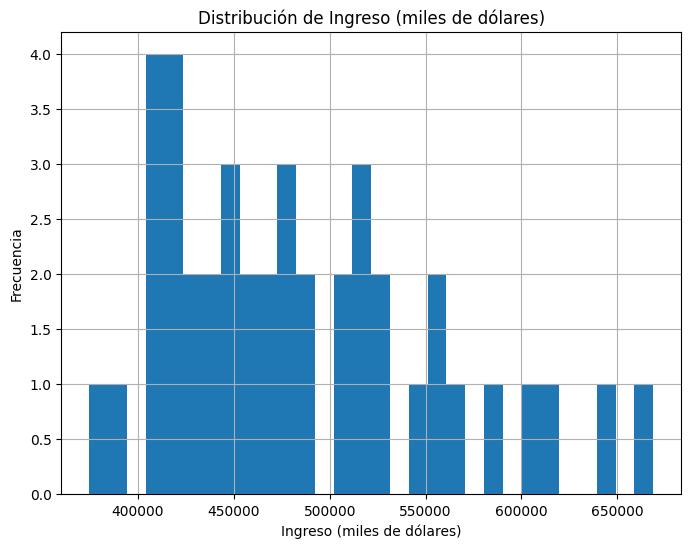

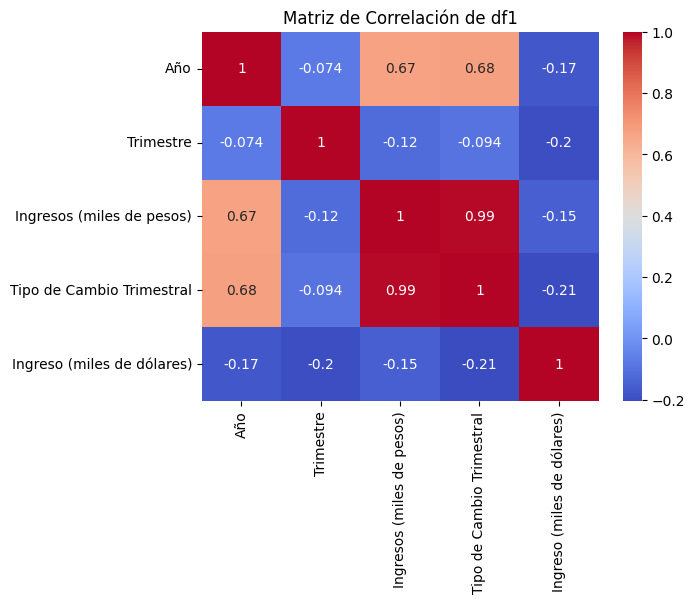

In [10]:
# Análisis de Distribución
df1['Ingreso (miles de dólares)'].hist(bins=30, figsize=(8, 6))
plt.title('Distribución de Ingreso (miles de dólares)')
plt.xlabel('Ingreso (miles de dólares)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
correlation_matrix_df1 = df1.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df1')
plt.show()


### Análisis de Velocidad

Vamos a evaluar los datos correspondientes a la velocidad de las conexiones y a la velocidad promedio de bajada, tanto a nivel global como por Provincia. Podemos encontrar que cuando revisamos los datos de forma agregada mantienen un comportamiento normal con agrupación central, sin embargo, al momento que empezamos a incorporar las Provincias vamos a comenzar a ver la presencia de outliers, lo que muestra que la distribución de la Velocidad en el servicio no es constante a lo largo del territorio.

    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042
Valores faltantes por columna en df2:
 Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64
Número de registros duplicados en df2: 0
Filas con valores atípicos en 'Velocidad':
         Año  Trimestre     Provincia  Velocidad  Accesos
2      2024          2  BUENOS AIRES      480.0        5
9      2024          2  BUENOS AIRES      500.0   137199
15     2024          2  BUENOS AIRES      120.0      510
20     2024          2  BUENOS AIRES      256.0       15
23     2024          2  BUENOS AIRES      205.0        3
...     ...        ...           ...        ...      ...
18658  2017          4         Jujuy      155.0        3
18728  20

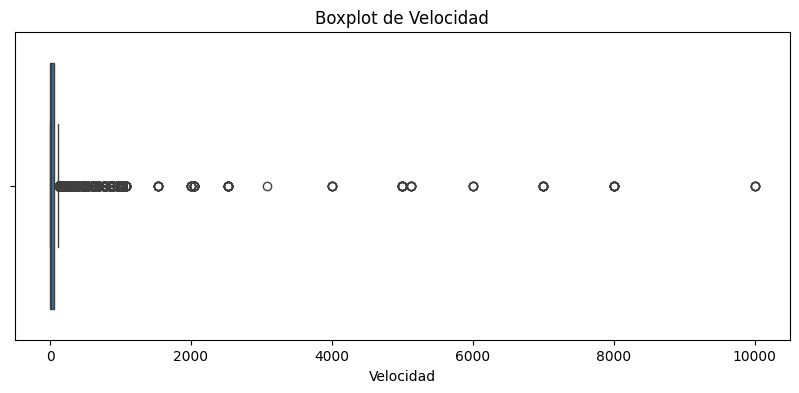

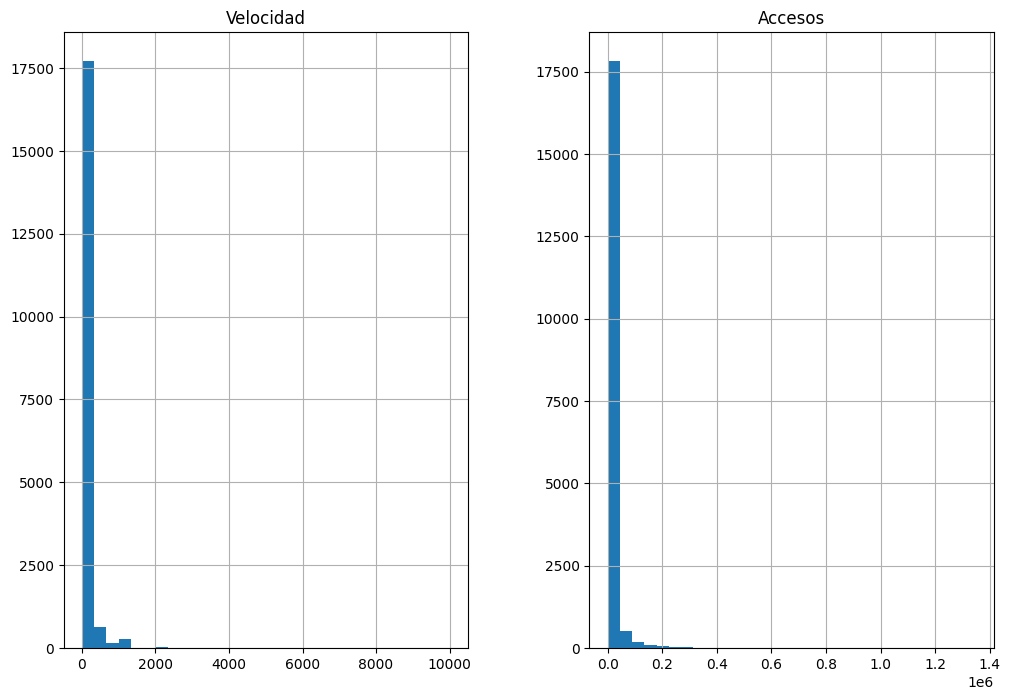

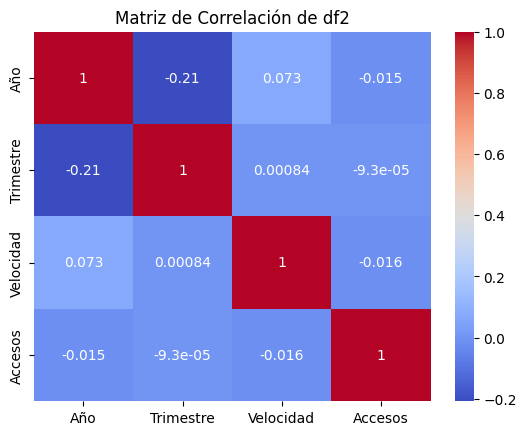

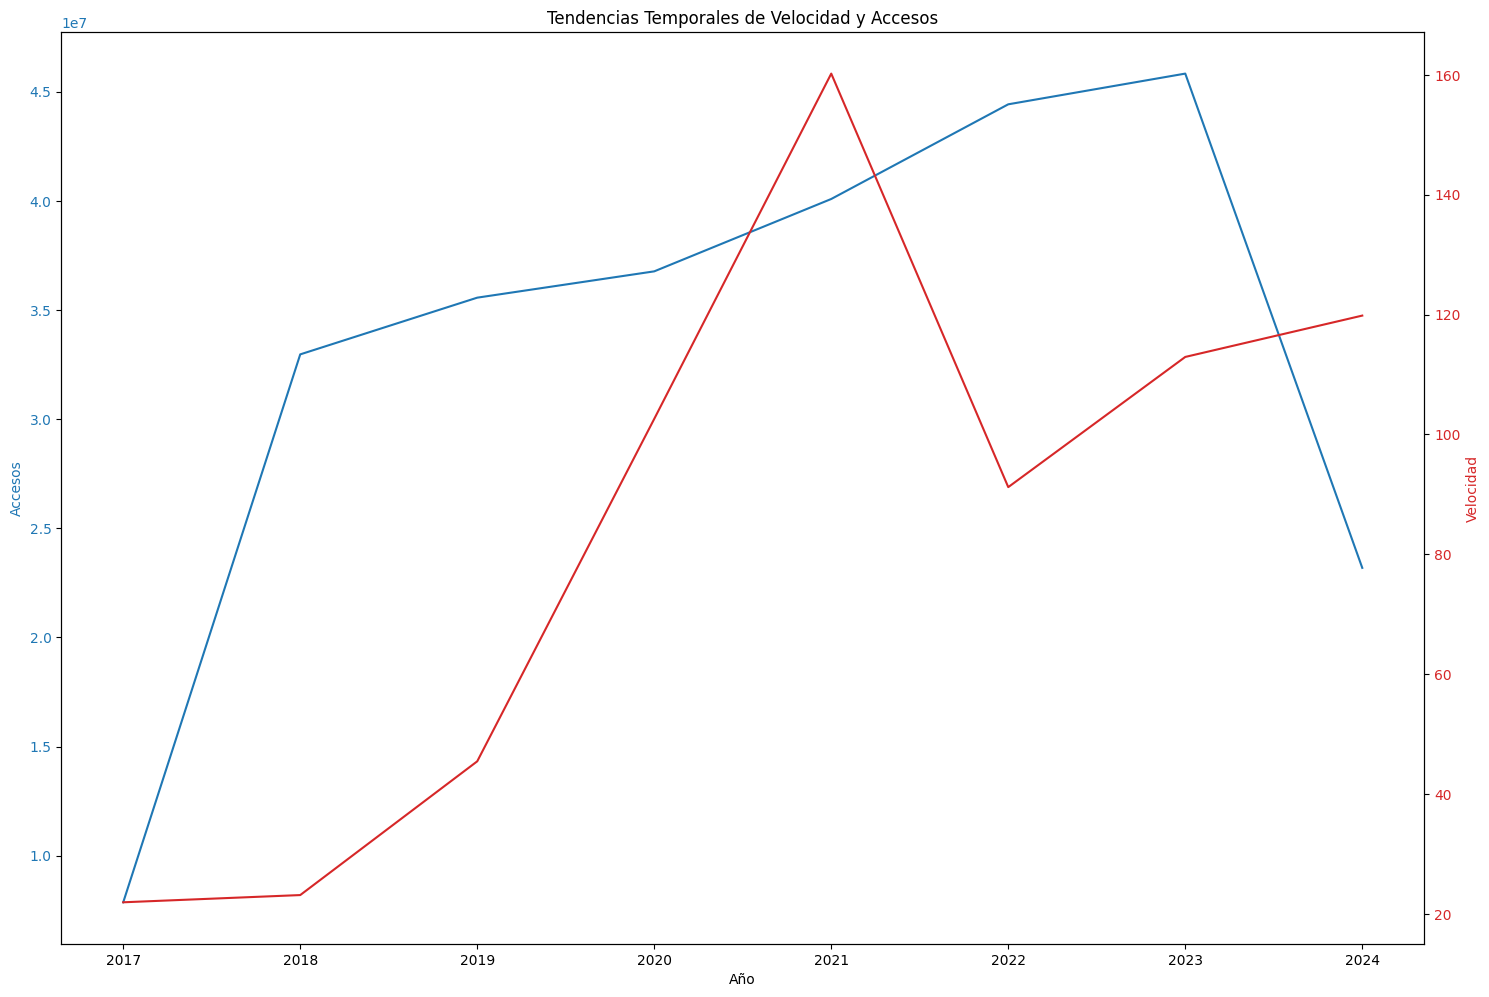

In [11]:
# Cargar la hoja 'Velocidad_sin_Rangos' en el dataframe df2
df2 = pd.read_excel(file_path, sheet_name='Velocidad_sin_Rangos')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df2.head())

# Búsqueda de valores faltantes
missing_values_df2 = df2.isnull().sum()
print("Valores faltantes por columna en df2:\n", missing_values_df2)

# Detección de registros duplicados
duplicate_records_df2 = df2.duplicated().sum()
print("Número de registros duplicados en df2:", duplicate_records_df2)

# Identificación de valores atípicos/extremos en 'Velocidad'
Q1 = df2['Velocidad'].quantile(0.25)
Q3 = df2['Velocidad'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df2 = df2[(df2['Velocidad'] < lower_bound) | (df2['Velocidad'] > upper_bound)]
print("Filas con valores atípicos en 'Velocidad':\n", outliers_df2)

# Visualizar los valores atípicos en 'Velocidad' con boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2['Velocidad'])
plt.title('Boxplot de Velocidad')
plt.show()

# Análisis de Distribución
df2[['Velocidad', 'Accesos']].hist(bins=30, figsize=(12, 8))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
correlation_matrix_df2 = df2.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df2, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df2')
plt.show()

# Análisis de Tendencias Temporales para df2
fig, ax1 = plt.subplots(figsize=(15, 10))

# Accesos en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos', color=color)
ax1.plot(df2.groupby('Año')['Accesos'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Velocidad en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Velocidad', color=color)
ax2.plot(df2.groupby('Año')['Velocidad'].mean(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Velocidad y Accesos')
plt.show()

Encontramos que la tendencia en Velocidad es creciente, esto gracias a los avances de la tecnología, más adelante profundizaremos en esto, observando que ante cambios en la tecnológia de los accesos la velocidad de conexión se incrementa con el paso del tiempo.

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67
Valores faltantes por columna en df13:
 Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Número de registros duplicados en df13: 0
Filas con valores atípicos en 'Mbps (Media de bajada)':
       Año  Trimestre        Provincia  Mbps (Media de bajada)
0    2024          2     Buenos Aires              157.410000
1    2024          2  Capital Federal              233.010000
2    2024          2        Catamarca               97.380000
3    2024          2            Chaco              107.760000
5    2024          2          Córdoba              117.390000
..  

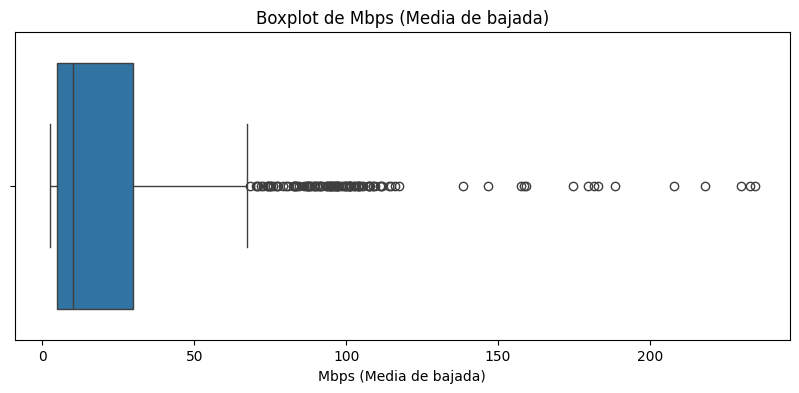

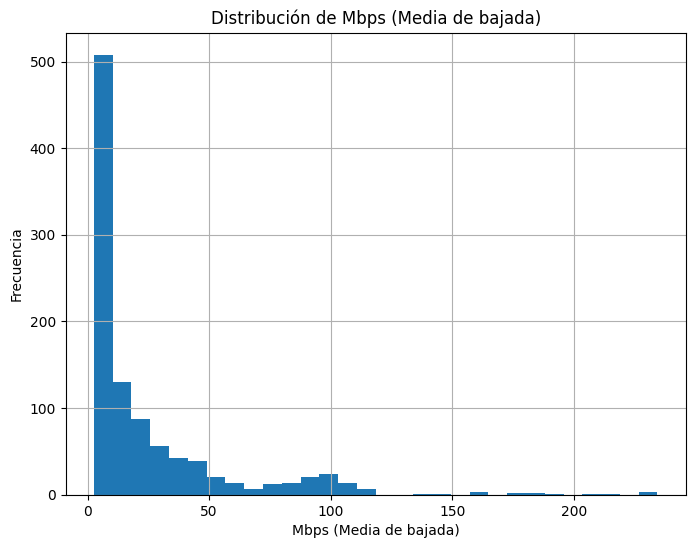

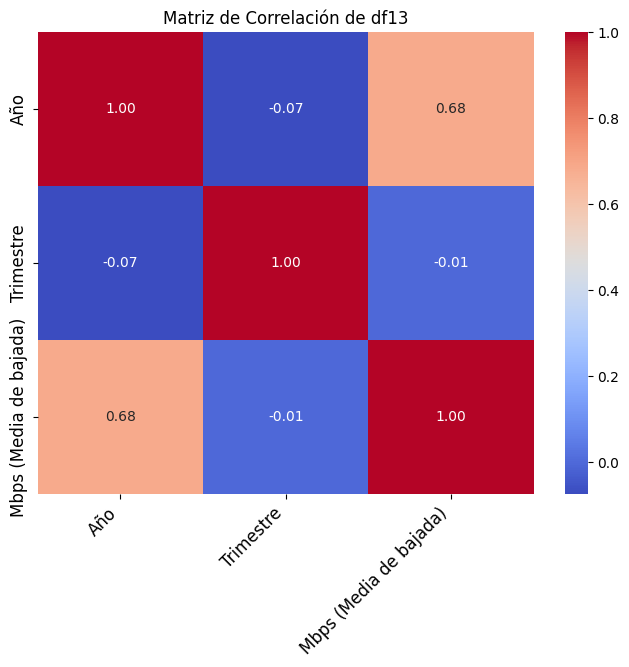

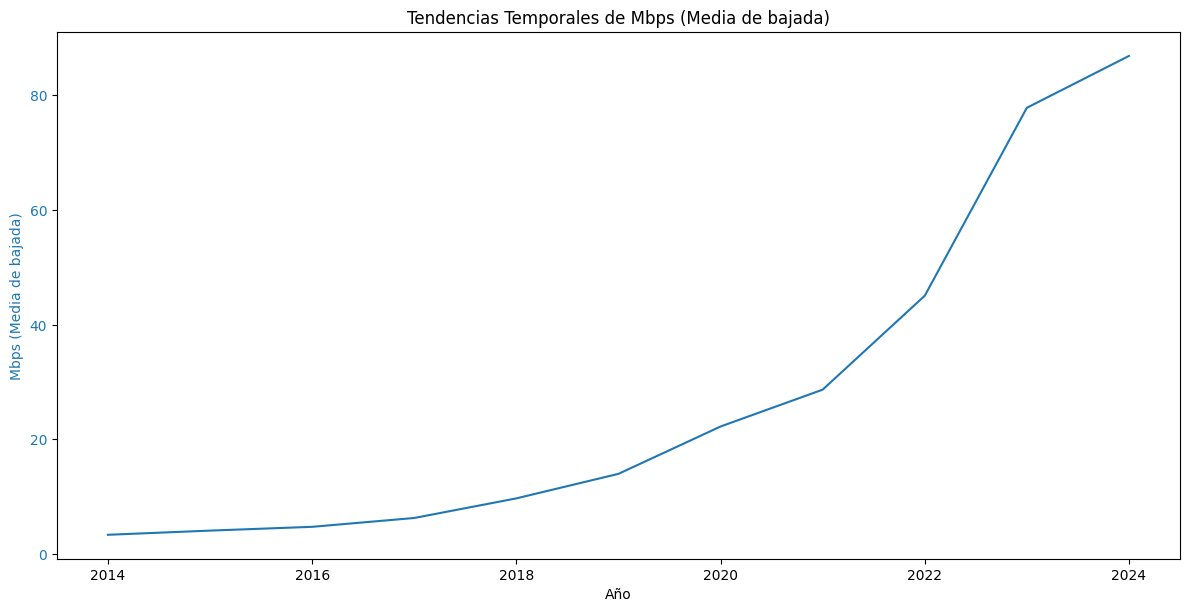

In [12]:
# Cargar la hoja 'Velocidad % por prov' en el dataframe df13
df13 = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df13.head())

# Búsqueda de valores faltantes
missing_values_df13 = df13.isnull().sum()
print("Valores faltantes por columna en df13:\n", missing_values_df13)

# Detección de registros duplicados
duplicate_records_df13 = df13.duplicated().sum()
print("Número de registros duplicados en df13:", duplicate_records_df13)

# Identificación de valores atípicos/extremos en la columna 'Mbps (Media de bajada)'
Q1 = df13['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df13['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df13[(df13['Mbps (Media de bajada)'] < lower_bound) | (df13['Mbps (Media de bajada)'] > upper_bound)]
print("Filas con valores atípicos en 'Mbps (Media de bajada)':\n", outliers)

# Visualizar los valores atípicos con boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=df13['Mbps (Media de bajada)'])
plt.title('Boxplot de Mbps (Media de bajada)')
plt.show()

# Análisis de Distribución
df13['Mbps (Media de bajada)'].hist(bins=30, figsize=(8, 6))
plt.title('Distribución de Mbps (Media de bajada)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(8, 6))
correlation_matrix_df13 = df13.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df13, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df13')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Mbps (Media de bajada) en el eje Y
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Mbps (Media de bajada)', color=color)
ax1.plot(df13.groupby('Año')['Mbps (Media de bajada)'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Mbps (Media de bajada)')
plt.show()

A pesar de que el promedio de Mbps de bajada es cada vez mayor, la agrupación de los valores se encuentra sesgada a la izquierda, evidenciando que el incremento en la velocidad de conexión no ha sido equilibrado a lo largo de las provincias, manteniendo una brecha importante entre ellas.

    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023
Valores faltantes por columna en df12:
 Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64
Número de registros duplicados en df12: 0
Filas con valores atípicos en 'Mbps (Media de bajada)':
     Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023


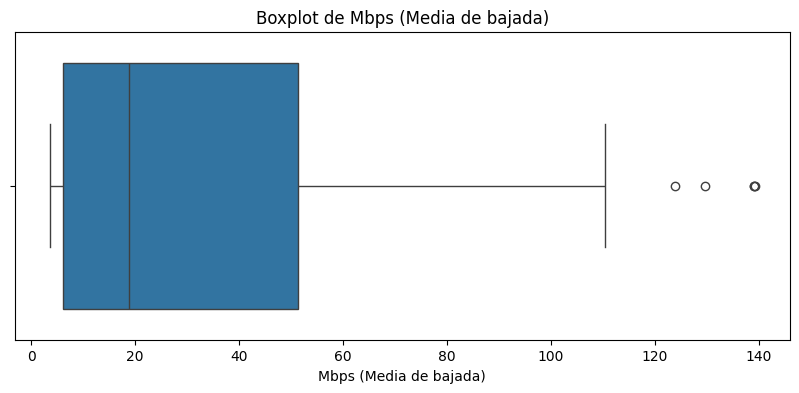

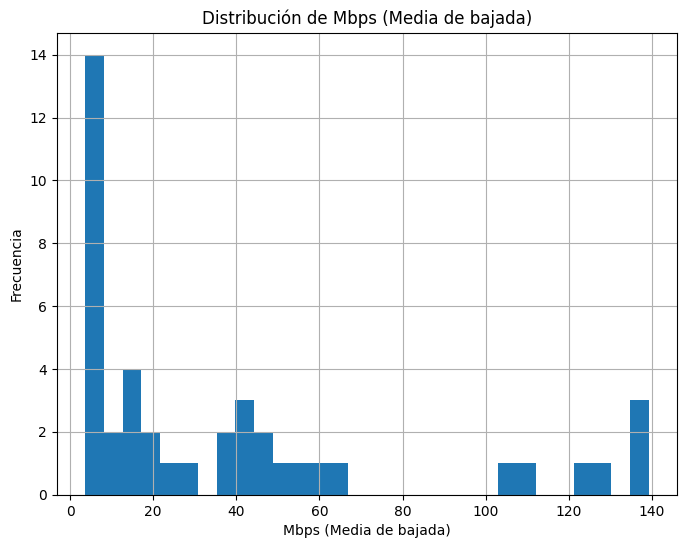

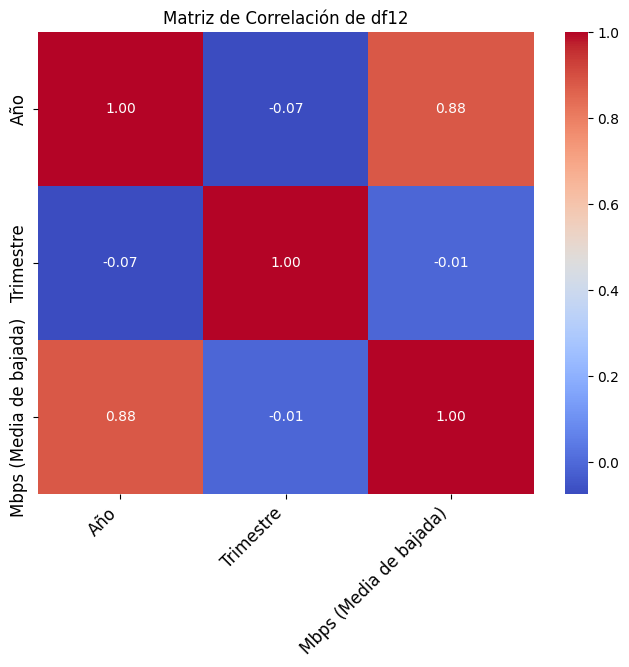

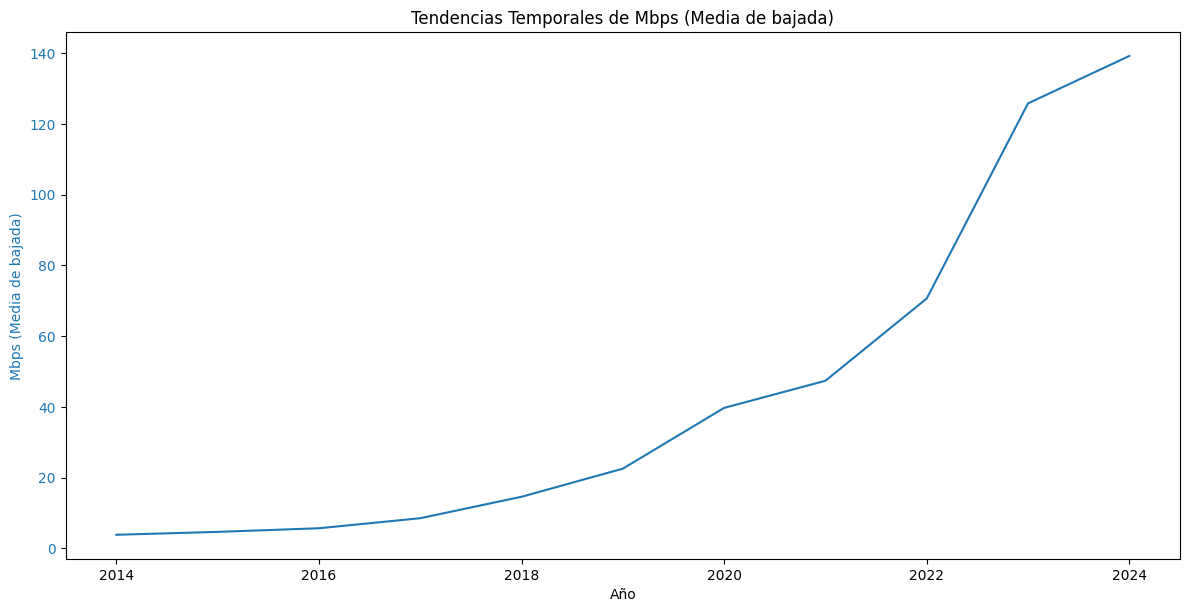

In [13]:
# Cargar la hoja 'Totales VMD' en el dataframe df12
df12 = pd.read_excel(file_path, sheet_name='Totales VMD')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df12.head())

# Búsqueda de valores faltantes
missing_values_df12 = df12.isnull().sum()
print("Valores faltantes por columna en df12:\n", missing_values_df12)

# Detección de registros duplicados
duplicate_records_df12 = df12.duplicated().sum()
print("Número de registros duplicados en df12:", duplicate_records_df12)

# Identificación de valores atípicos/extremos en la columna 'Mbps (Media de bajada)'
Q1 = df12['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df12['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df12[(df12['Mbps (Media de bajada)'] < lower_bound) | (df12['Mbps (Media de bajada)'] > upper_bound)]
print("Filas con valores atípicos en 'Mbps (Media de bajada)':\n", outliers)

# Visualizar los valores atípicos con boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=df12['Mbps (Media de bajada)'])
plt.title('Boxplot de Mbps (Media de bajada)')
plt.show()

# Análisis de Distribución
df12['Mbps (Media de bajada)'].hist(bins=30, figsize=(8, 6))
plt.title('Distribución de Mbps (Media de bajada)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(8, 6))
correlation_matrix_df12 = df12.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df12, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df12')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Mbps (Media de bajada) en el eje Y
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Mbps (Media de bajada)', color=color)
ax1.plot(df12.groupby('Año')['Mbps (Media de bajada)'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Mbps (Media de bajada)')
plt.show()

En el gráfico de distribución se envidencia lo que se mencionó anteriormente, hay una distribución sesgada en la velocidad de conexión.

### Análisis de Accesos

A continuación, observaremos un análisis acerca del número de accesos a lo largo del período de estudio, esto quiere decir número de conexiones. De ninguna manera el total de accesos representa el número de usuarios de internet.

    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3  11406908  Jul-Sept 2023  
4  11251897   Abr-Jun 2023  
Valores faltantes por columna en df10:
 Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
Número de registros duplicados en df10: 0
Filas con valores atípicos en 'ADSL':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wirel

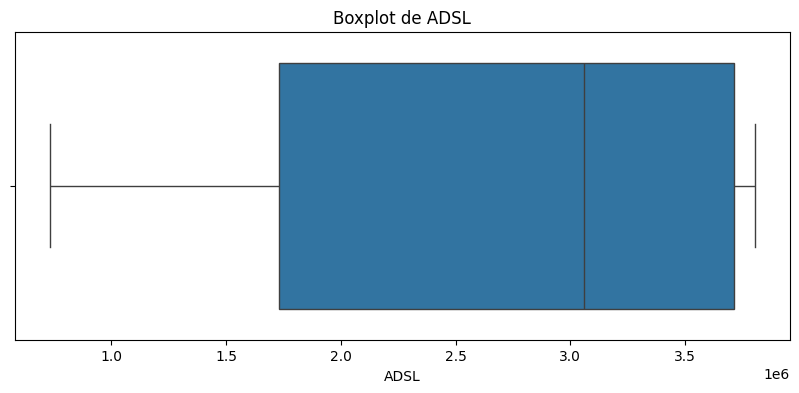

Filas con valores atípicos en 'Cablemodem':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


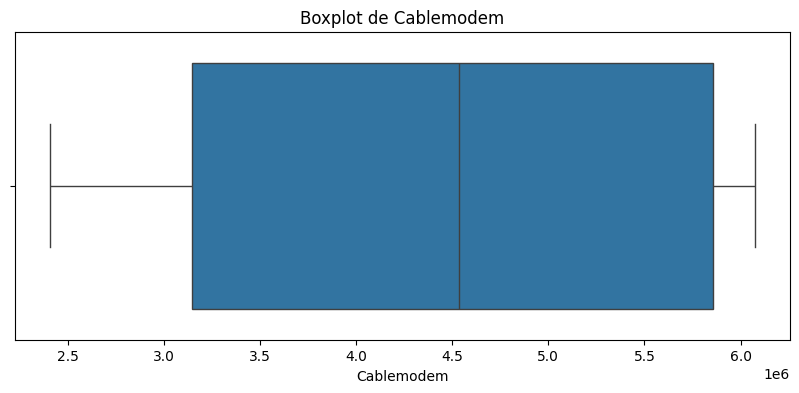

Filas con valores atípicos en 'Fibra óptica':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


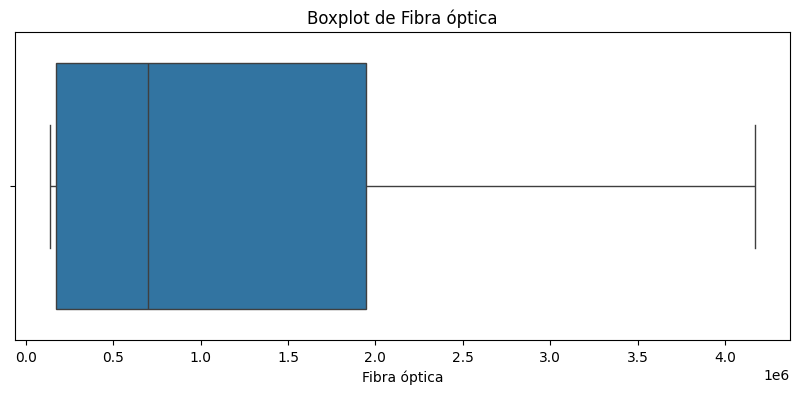

Filas con valores atípicos en 'Wireless':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


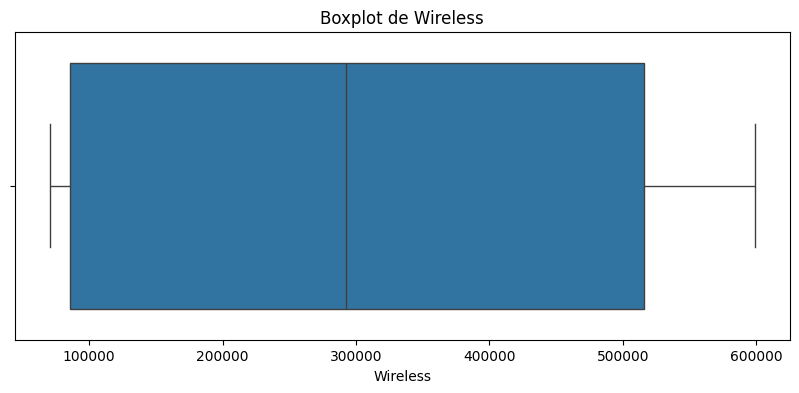

Filas con valores atípicos en 'Otros':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


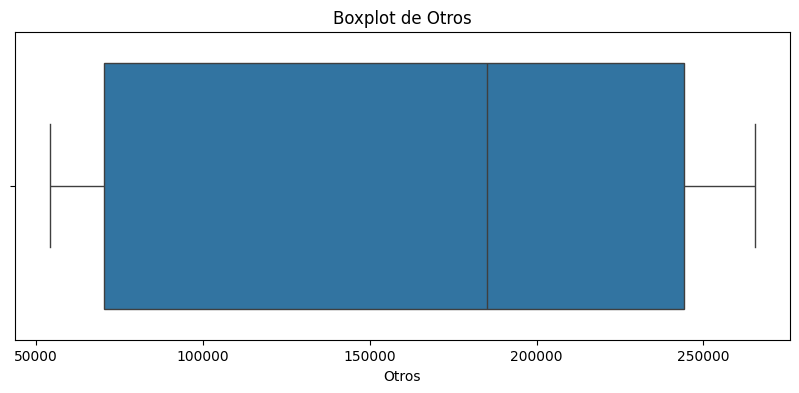

Filas con valores atípicos en 'Total':
 Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


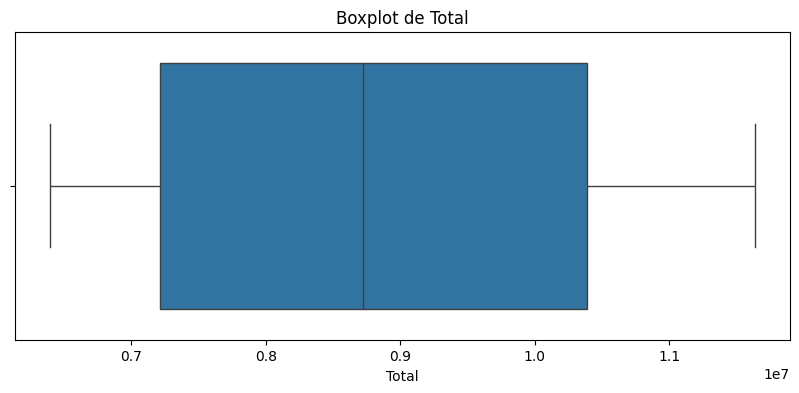

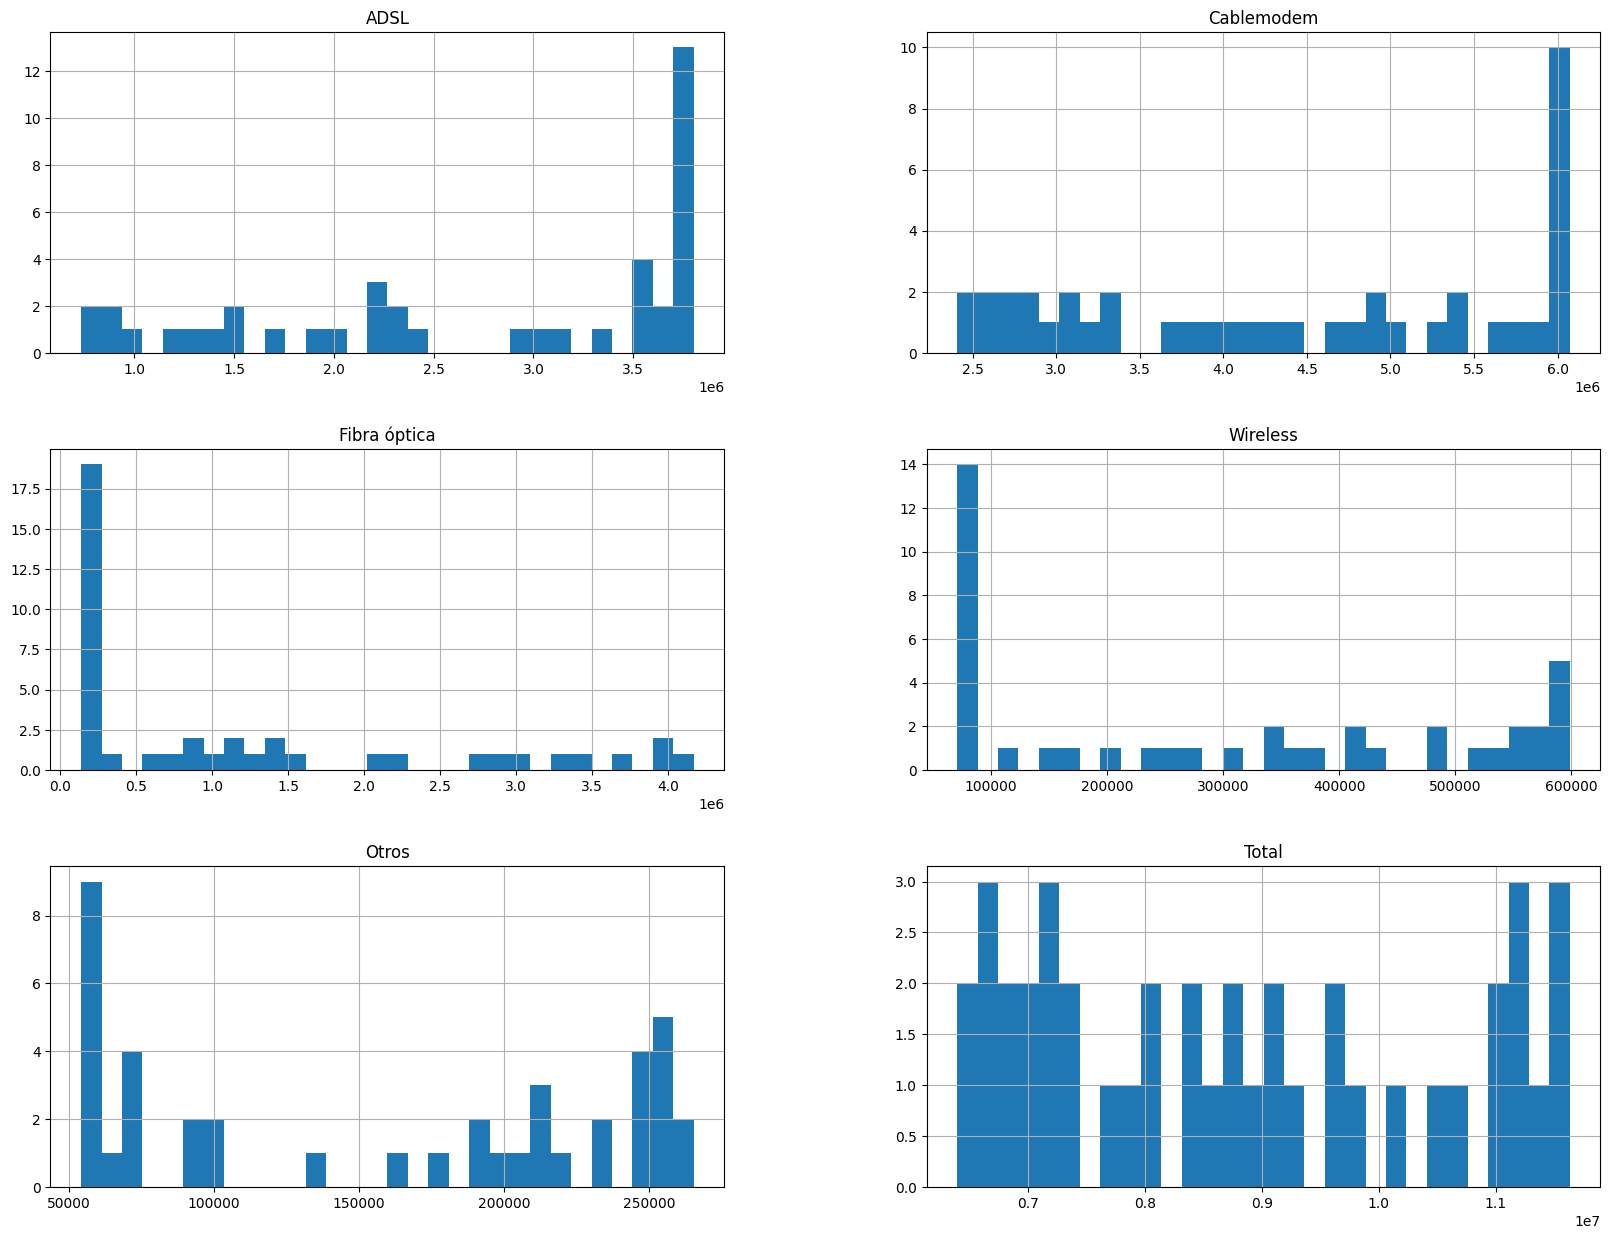

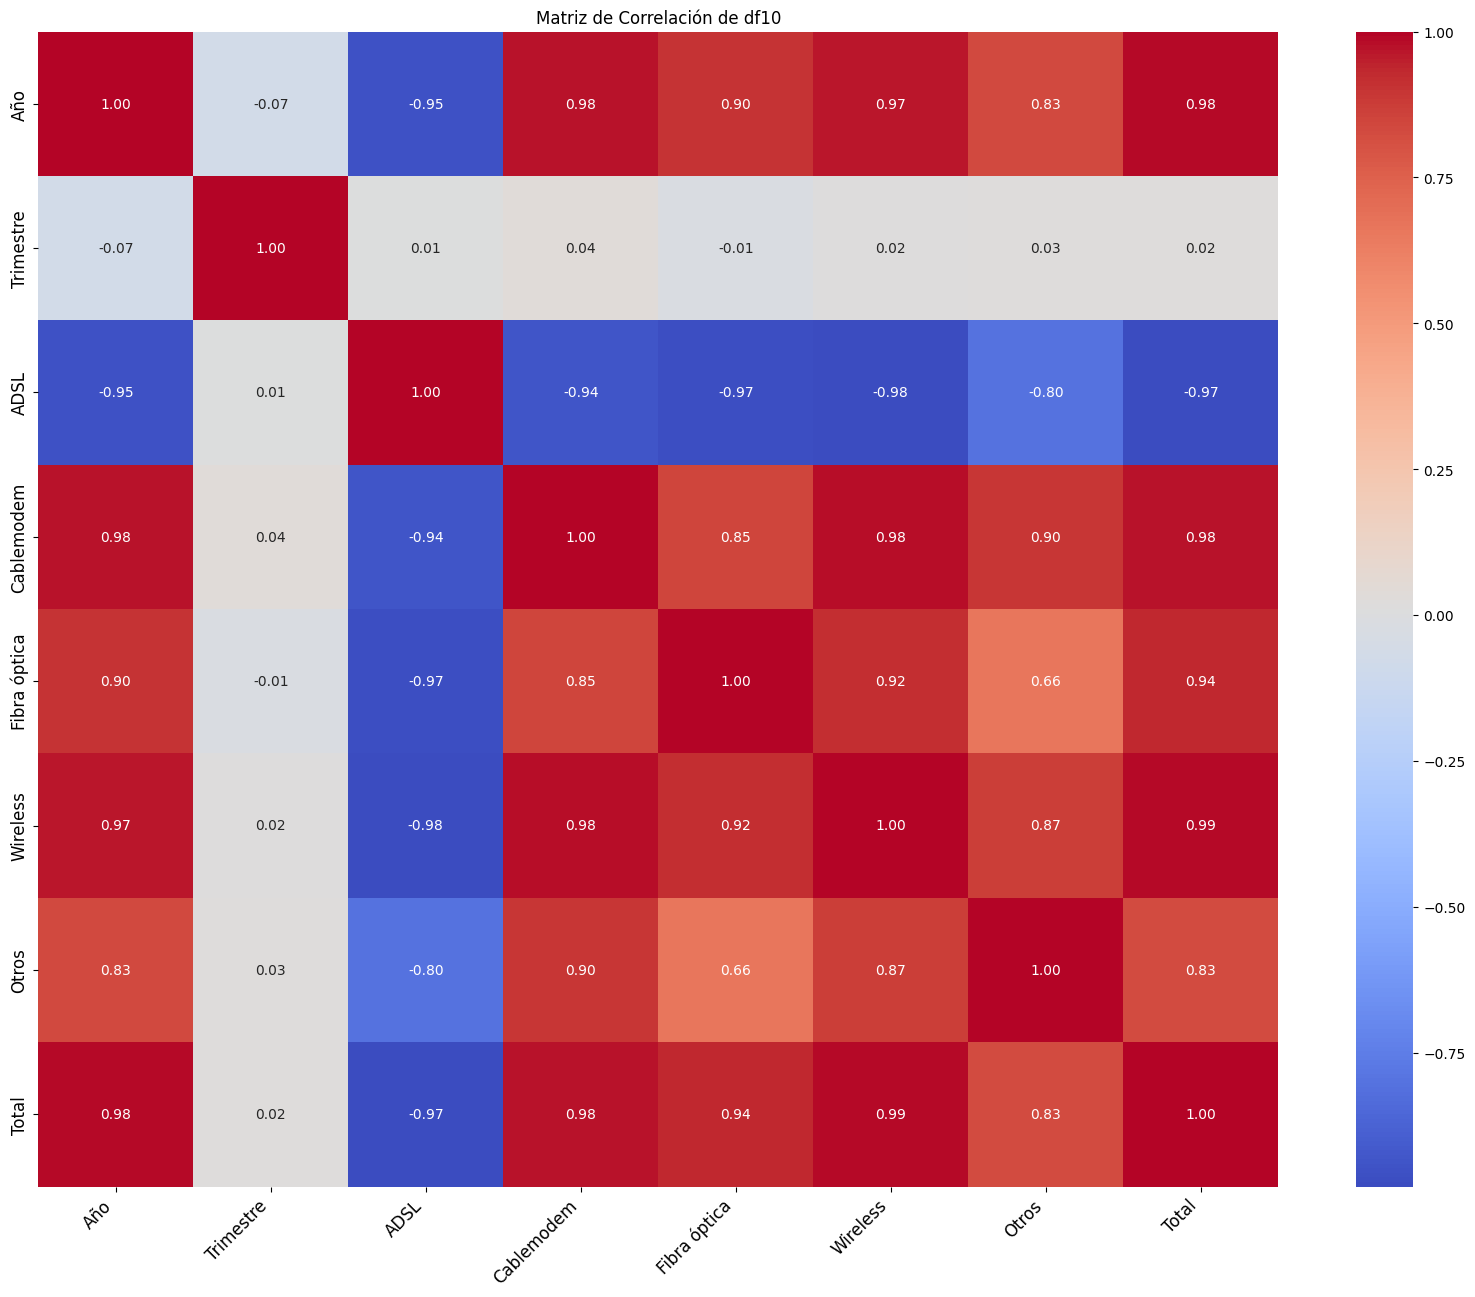

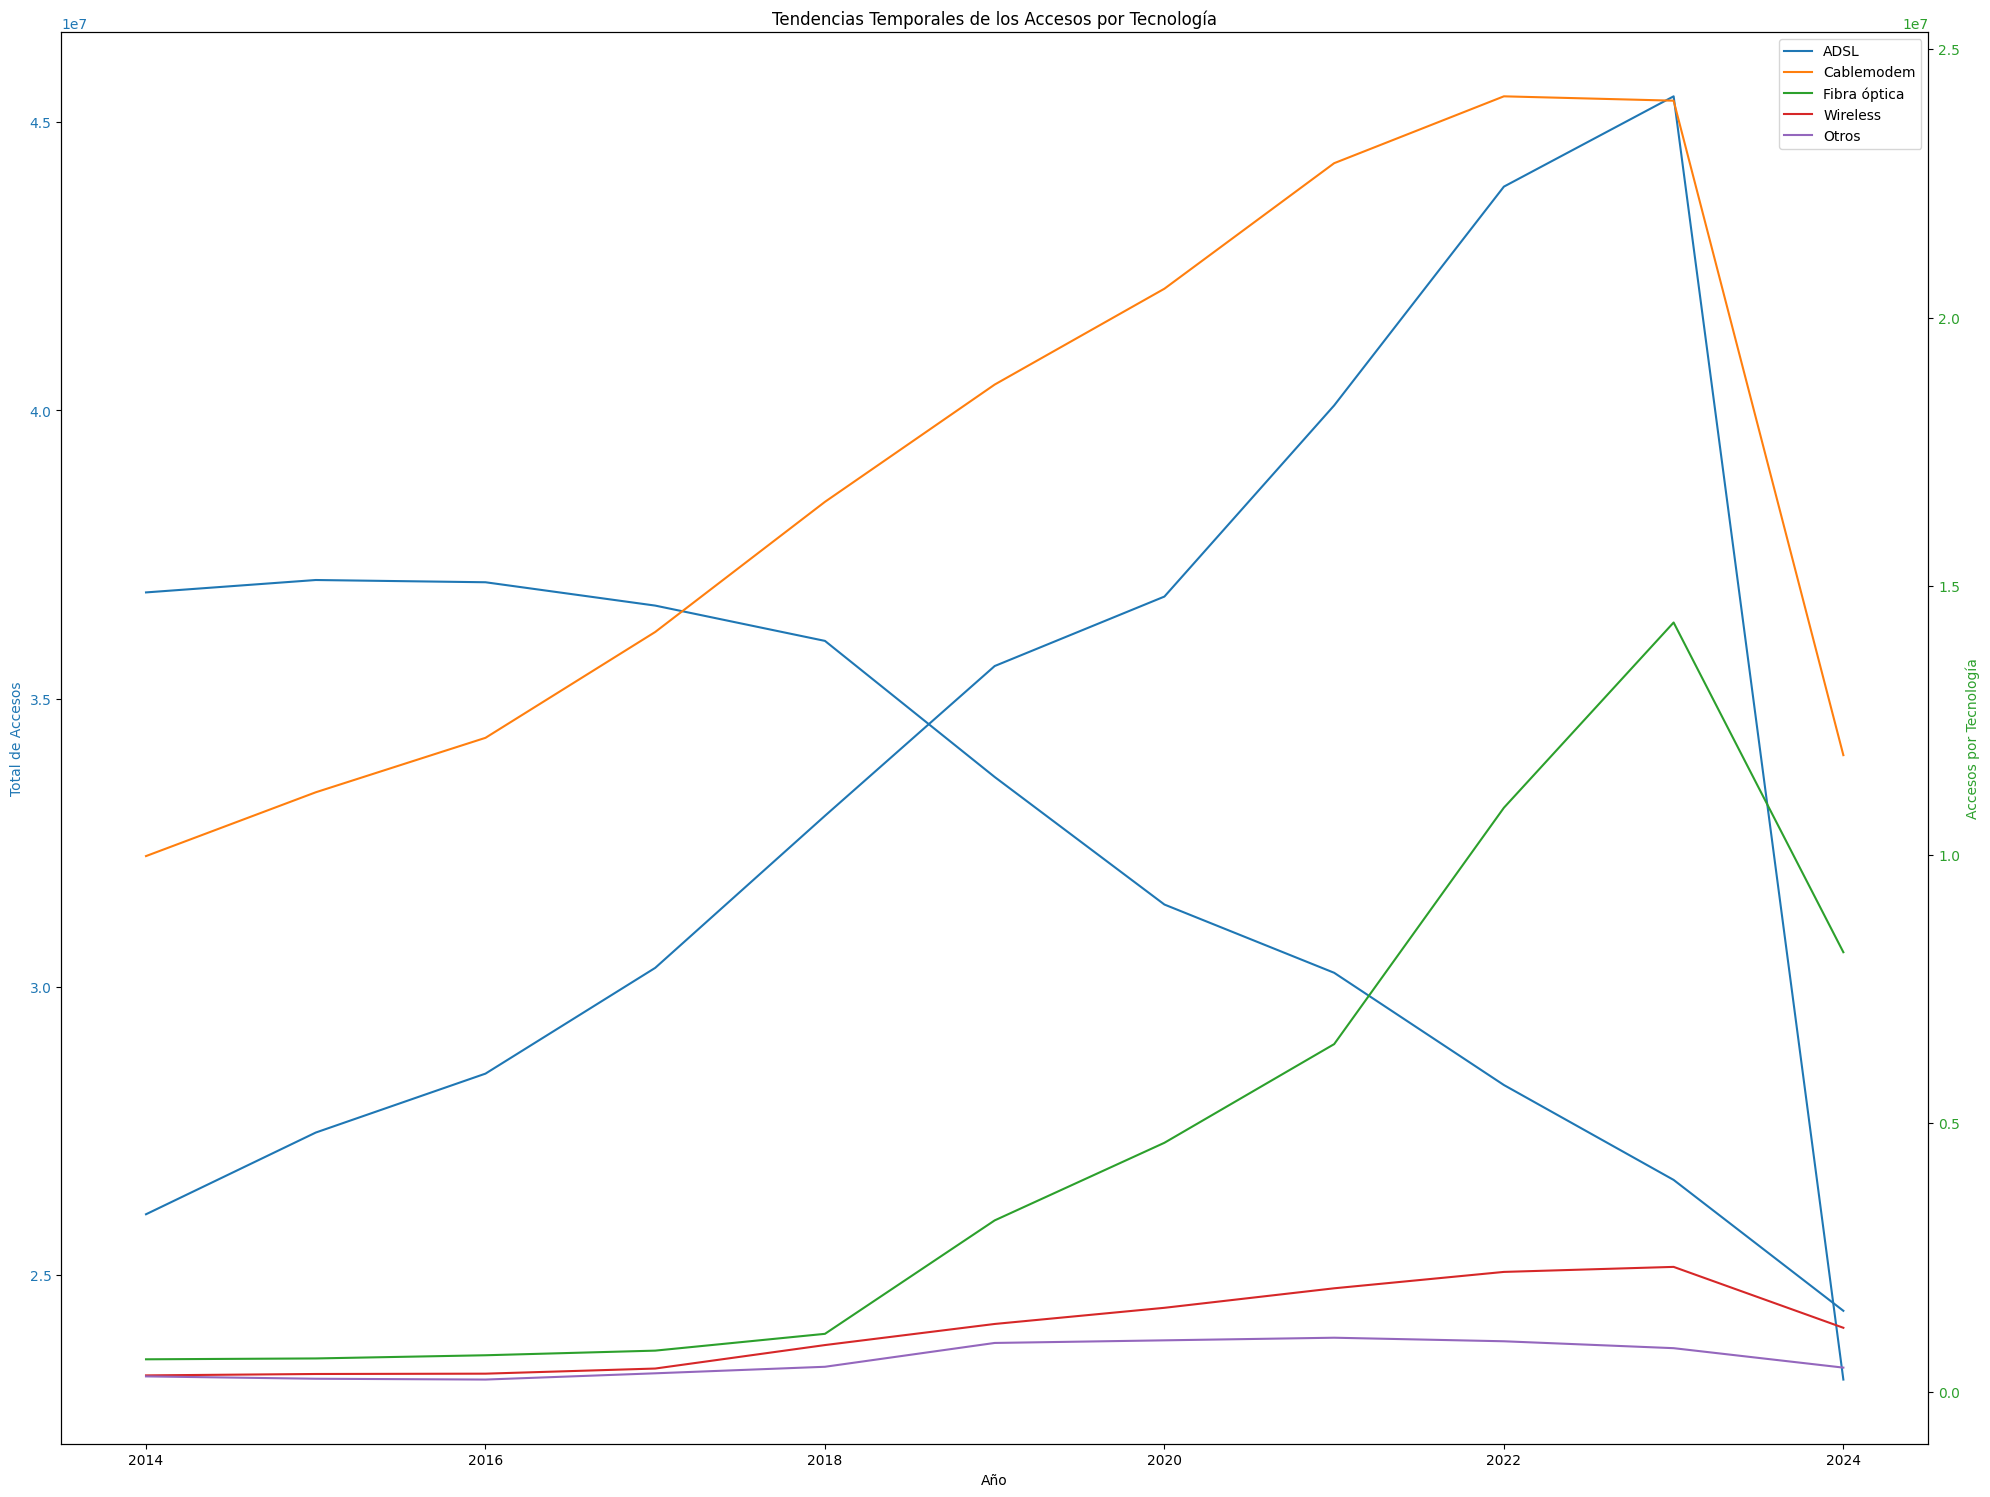

In [14]:
# Cargar la hoja 'Totales Accesos Por Tecnología' en el dataframe df10
df10 = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df10.head())

# Búsqueda de valores faltantes
missing_values_df10 = df10.isnull().sum()
print("Valores faltantes por columna en df10:\n", missing_values_df10)

# Detección de registros duplicados
duplicate_records_df10 = df10.duplicated().sum()
print("Número de registros duplicados en df10:", duplicate_records_df10)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    Q1 = df10[column].quantile(0.25)
    Q3 = df10[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df10[(df10[column] < lower_bound) | (df10[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df10[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df10[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].hist(bins=30, figsize=(20, 15))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(20, 15))
correlation_matrix_df10 = df10.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df10, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df10')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(20, 15))

# Total en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Accesos', color=color)
ax1.plot(df10.groupby('Año')['Total'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Otros tipos de tecnología en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accesos por Tecnología', color=color)
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    ax2.plot(df10.groupby('Año')[column].sum(), label=column)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de los Accesos por Tecnología')
plt.legend()
plt.show()

En este apartado llama la atención la correlación entre las variables, en un primer acercamiento a los datos se pensaría que esta correlación debería ser negativa dado que estamos hablando de productos sustitutos a primera vista dado que en general son tecnologías sustitutas, sin embargo, en la mayoría de los casos la correlación es fuertemente positiva.

En el mismo sentido de las líneas anteriores, el hecho de ser tecnologías que se entienden como sustitutas explica el comportamiento de la tendencia, en donde fibra óptica y cablemodem poseen una tendencia positiva frente a al tendencia negativa de ADSL.

    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0  
Valores faltantes por columna en df11:
 Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64
Número de registros duplicados en df11: 0
Filas con valores atípicos en 'ADSL':
        Año Trimestre        Provincia       ADSL  Cable

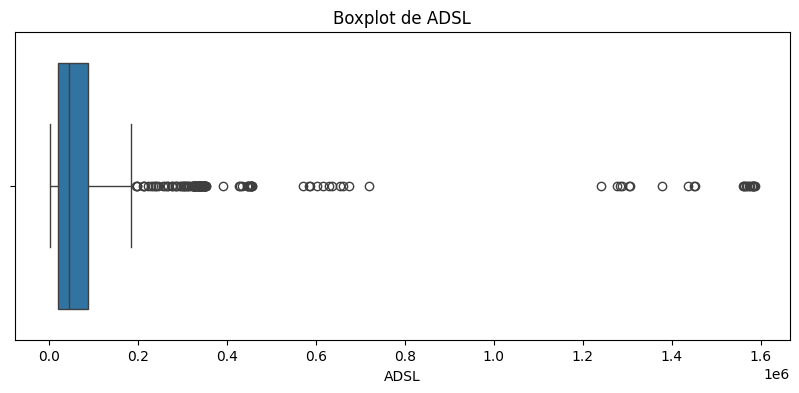

Filas con valores atípicos en 'Cablemodem':
       Año Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0    2024         2     Buenos Aires   214055.0   2722466.0     1849476.0   
1    2024         2  Capital Federal    54102.0   1144781.0      230402.0   
5    2024         2          Córdoba    93483.0    443091.0      477504.0   
20   2024         2         Santa Fe    88486.0    394939.0      390090.0   
24   2024         1  Capital Federal    70108.0   1177475.0      203756.0   
..    ...       ...              ...        ...         ...           ...   
964  2014         2          Córdoba   337825.0    234729.0         351.0   
979  2014         2         Santa Fe   324101.0    178495.0        3085.0   
983  2014         1     Buenos Aires  1567685.0   1000879.0      120960.0   
984  2014         1  Capital Federal   445569.0    820161.0       17767.0   
988  2014         1          Córdoba   336841.0    225769.0         347.0   

     Wireless    Otros      To

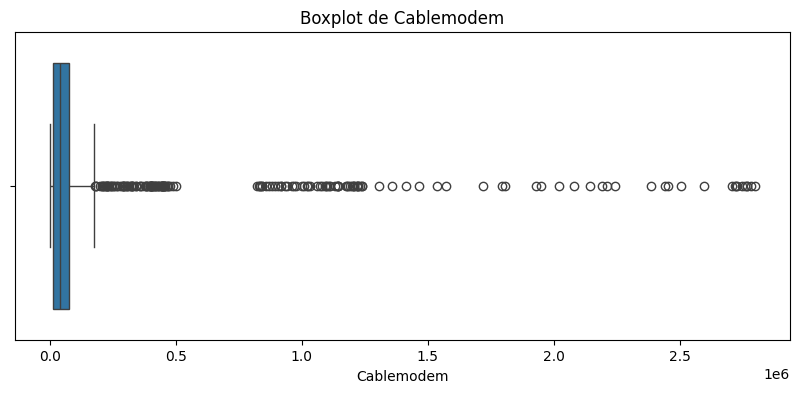

Filas con valores atípicos en 'Fibra óptica':
       Año Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0    2024         2     Buenos Aires   214055.0   2722466.0     1849476.0   
1    2024         2  Capital Federal    54102.0   1144781.0      230402.0   
5    2024         2          Córdoba    93483.0    443091.0      477504.0   
12   2024         2          Mendoza    17671.0     66636.0      188815.0   
13   2024         2         Misiones    20868.0     76427.0       87389.0   
..    ...       ...              ...        ...         ...           ...   
887  2015         1     Buenos Aires  1583135.0   1096836.0      134177.0   
911  2014         4     Buenos Aires  1575978.0   1070135.0      120528.0   
935  2014         3     Buenos Aires  1562533.0   1110628.0      124474.0   
959  2014         2     Buenos Aires  1568881.0   1025490.0      120008.0   
983  2014         1     Buenos Aires  1567685.0   1000879.0      120960.0   

     Wireless    Otros      

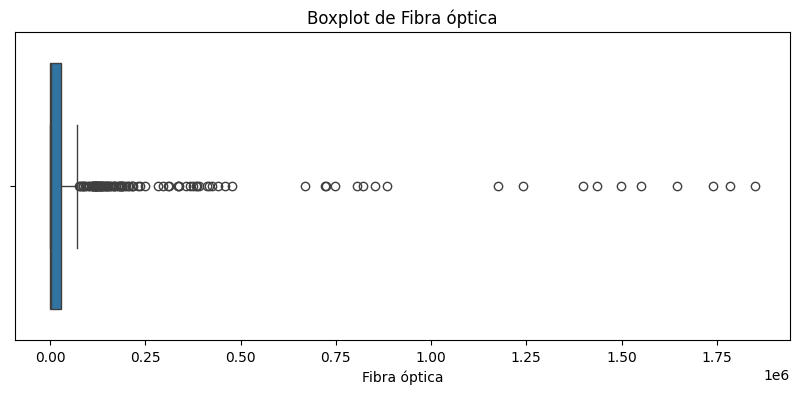

Filas con valores atípicos en 'Wireless':
       Año Trimestre     Provincia       ADSL  Cablemodem  Fibra óptica  \
0    2024         2  Buenos Aires   214055.0   2722466.0     1849476.0   
5    2024         2       Córdoba    93483.0    443091.0      477504.0   
18   2024         2      San Luis     4038.0     40063.0       34255.0   
20   2024         2      Santa Fe    88486.0    394939.0      390090.0   
28   2024         1       Córdoba   102812.0    449784.0      458985.0   
..    ...       ...           ...        ...         ...           ...   
569  2018         3      San Luis    11096.0      7784.0         368.0   
575  2018         2  Buenos Aires  1450203.0   1807868.0      143626.0   
599  2018         1  Buenos Aires  1452061.0   1793884.0      133928.0   
623  2017         4  Buenos Aires  1241172.0   1718013.0      131181.0   
647  2017         3  Buenos Aires  1288025.0   1571180.0      124920.0   

     Wireless    Otros      Total  
0    138638.0  64745.0  4989380.

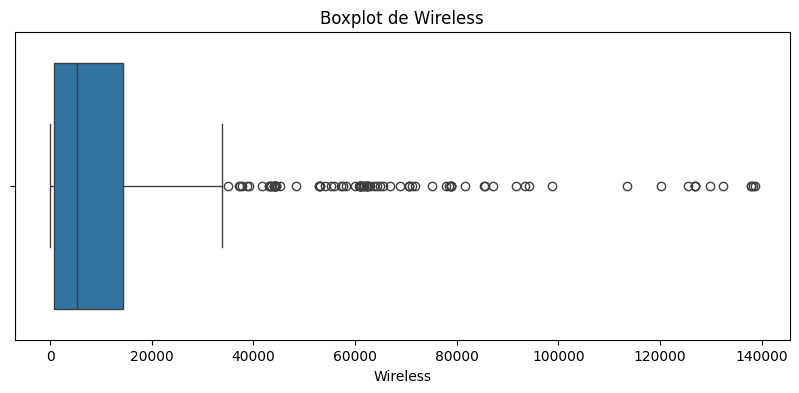

Filas con valores atípicos en 'Otros':
       Año Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0    2024         2     Buenos Aires   214055.0   2722466.0     1849476.0   
1    2024         2  Capital Federal    54102.0   1144781.0      230402.0   
24   2024         1  Capital Federal    70108.0   1177475.0      203756.0   
47   2023         4     Buenos Aires   223391.0   2797700.0     1784593.0   
48   2023         4  Capital Federal    58700.0   1198835.0      182520.0   
..    ...       ...              ...        ...         ...           ...   
887  2015         1     Buenos Aires  1583135.0   1096836.0      134177.0   
911  2014         4     Buenos Aires  1575978.0   1070135.0      120528.0   
935  2014         3     Buenos Aires  1562533.0   1110628.0      124474.0   
959  2014         2     Buenos Aires  1568881.0   1025490.0      120008.0   
983  2014         1     Buenos Aires  1567685.0   1000879.0      120960.0   

     Wireless    Otros      Total  

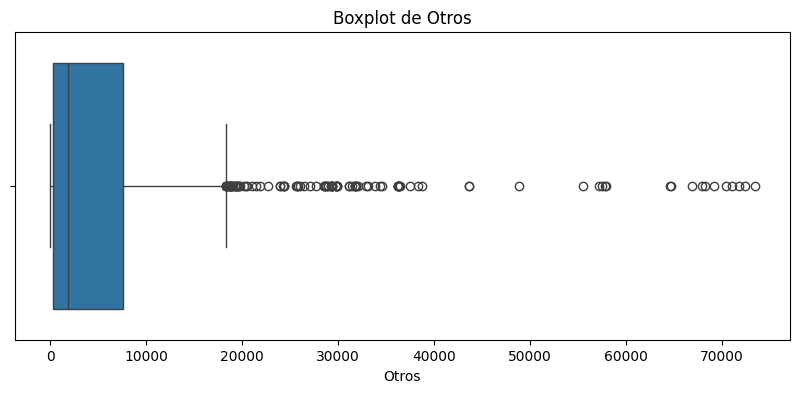

Filas con valores atípicos en 'Total':
        Año Trimestre        Provincia       ADSL  Cablemodem  Fibra óptica  \
0     2024         2     Buenos Aires   214055.0   2722466.0     1849476.0   
1     2024         2  Capital Federal    54102.0   1144781.0      230402.0   
5     2024         2          Córdoba    93483.0    443091.0      477504.0   
20    2024         2         Santa Fe    88486.0    394939.0      390090.0   
24    2024         1  Capital Federal    70108.0   1177475.0      203756.0   
...    ...       ...              ...        ...         ...           ...   
979   2014         2         Santa Fe   324101.0    178495.0        3085.0   
983   2014         1     Buenos Aires  1567685.0   1000879.0      120960.0   
984   2014         1  Capital Federal   445569.0    820161.0       17767.0   
988   2014         1          Córdoba   336841.0    225769.0         347.0   
1003  2014         1         Santa Fe   322662.0    174296.0        3059.0   

      Wireless    Otros

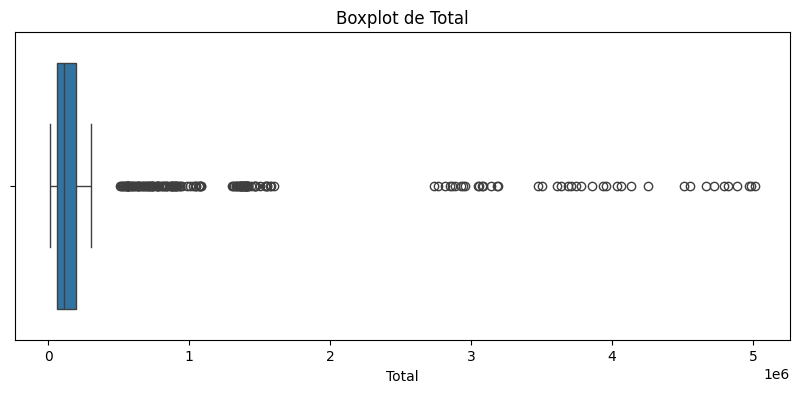

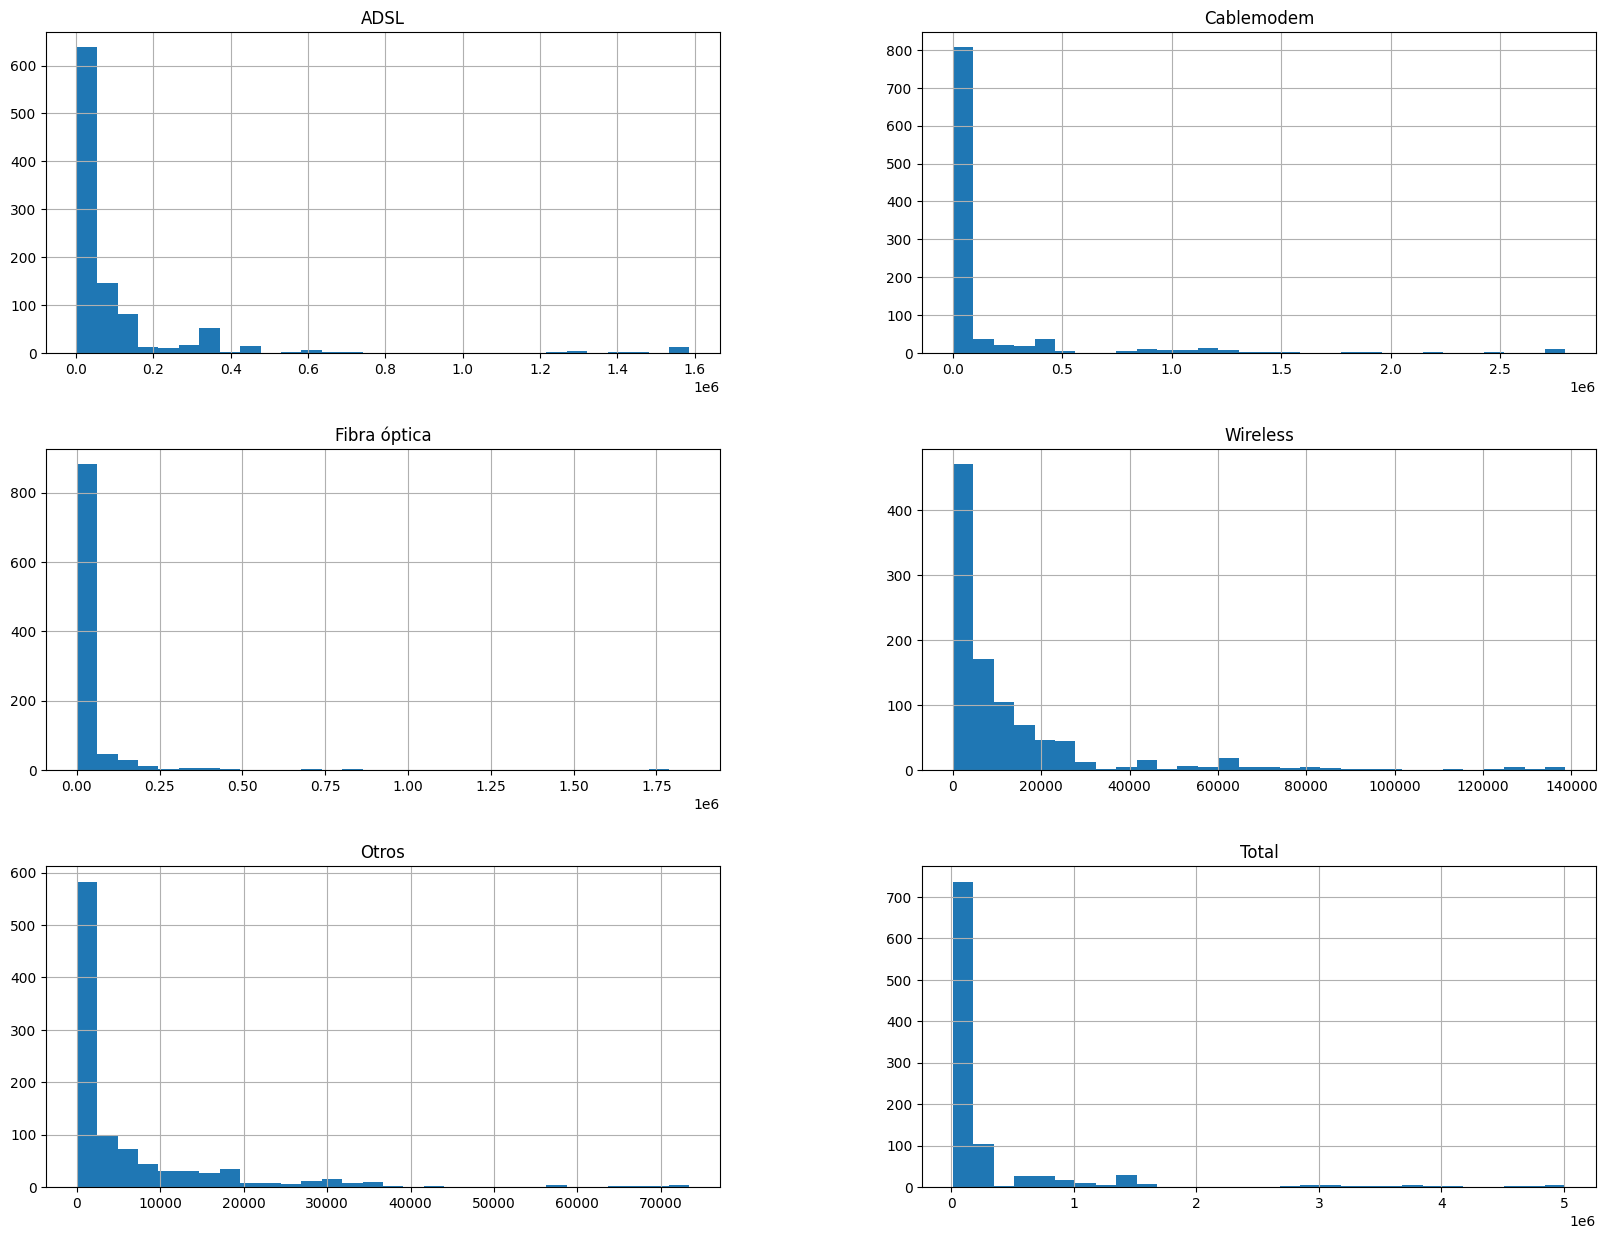

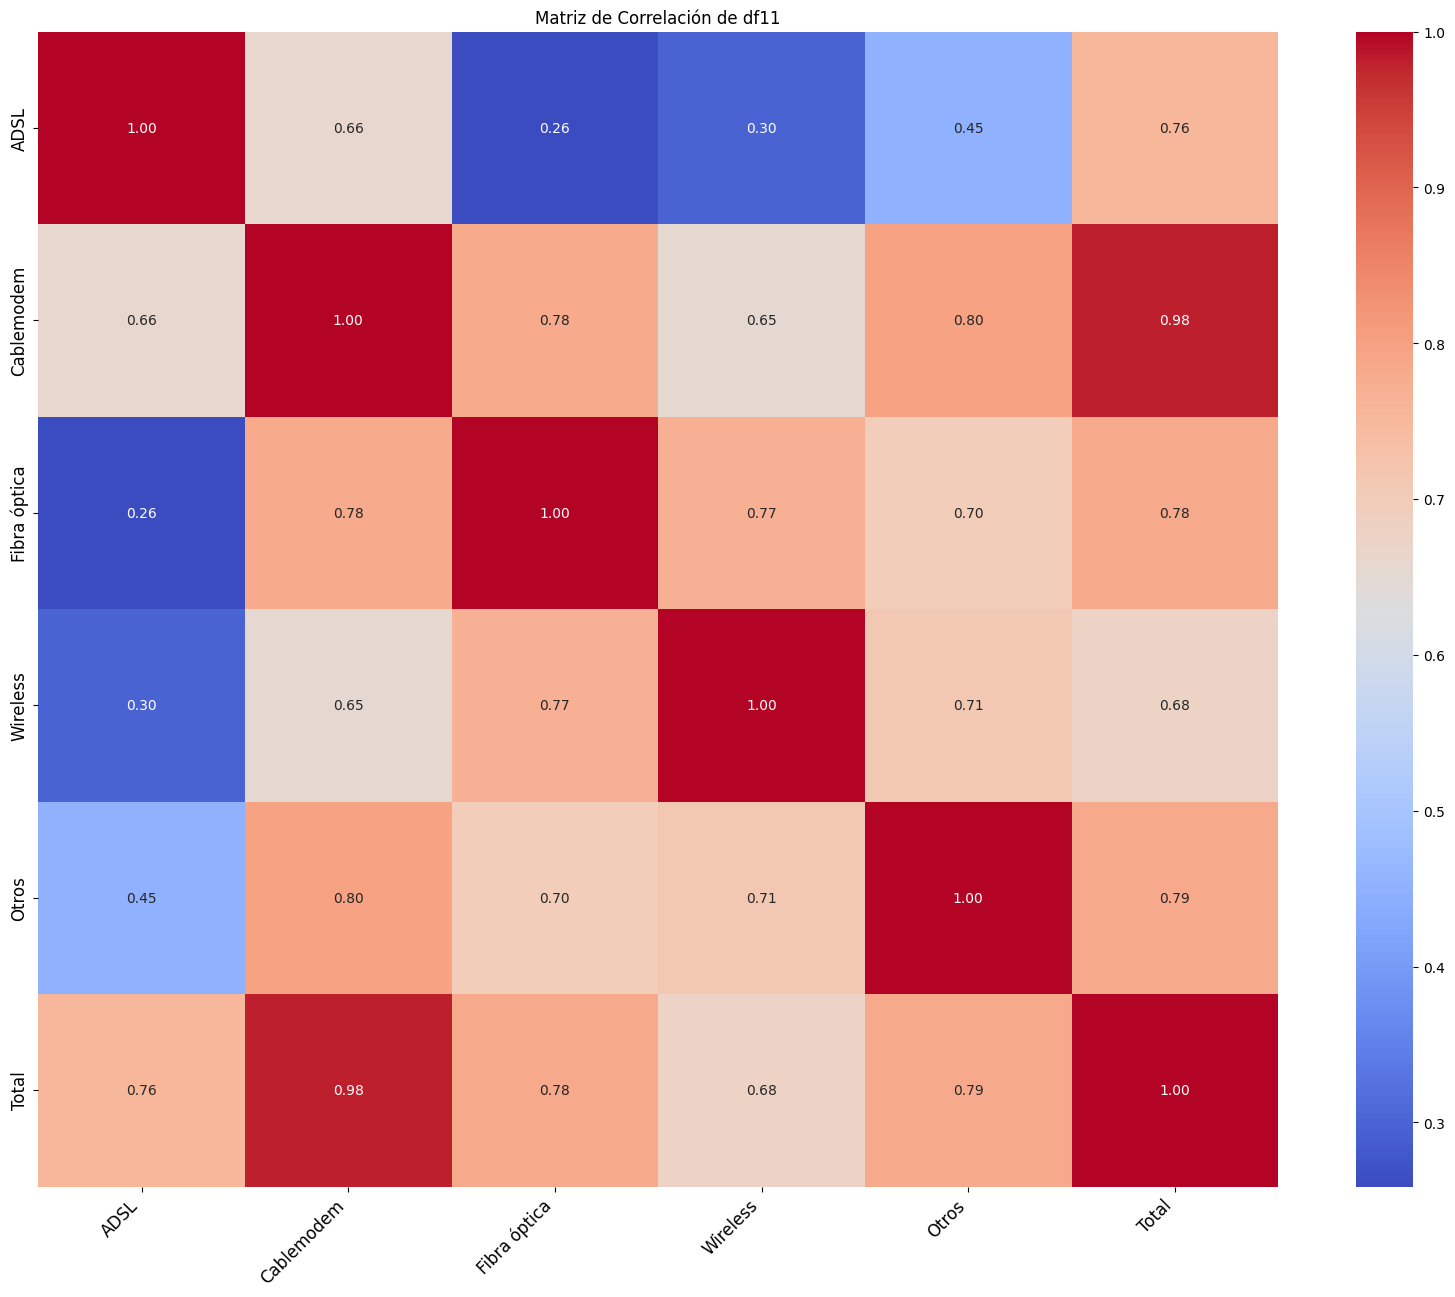

float64


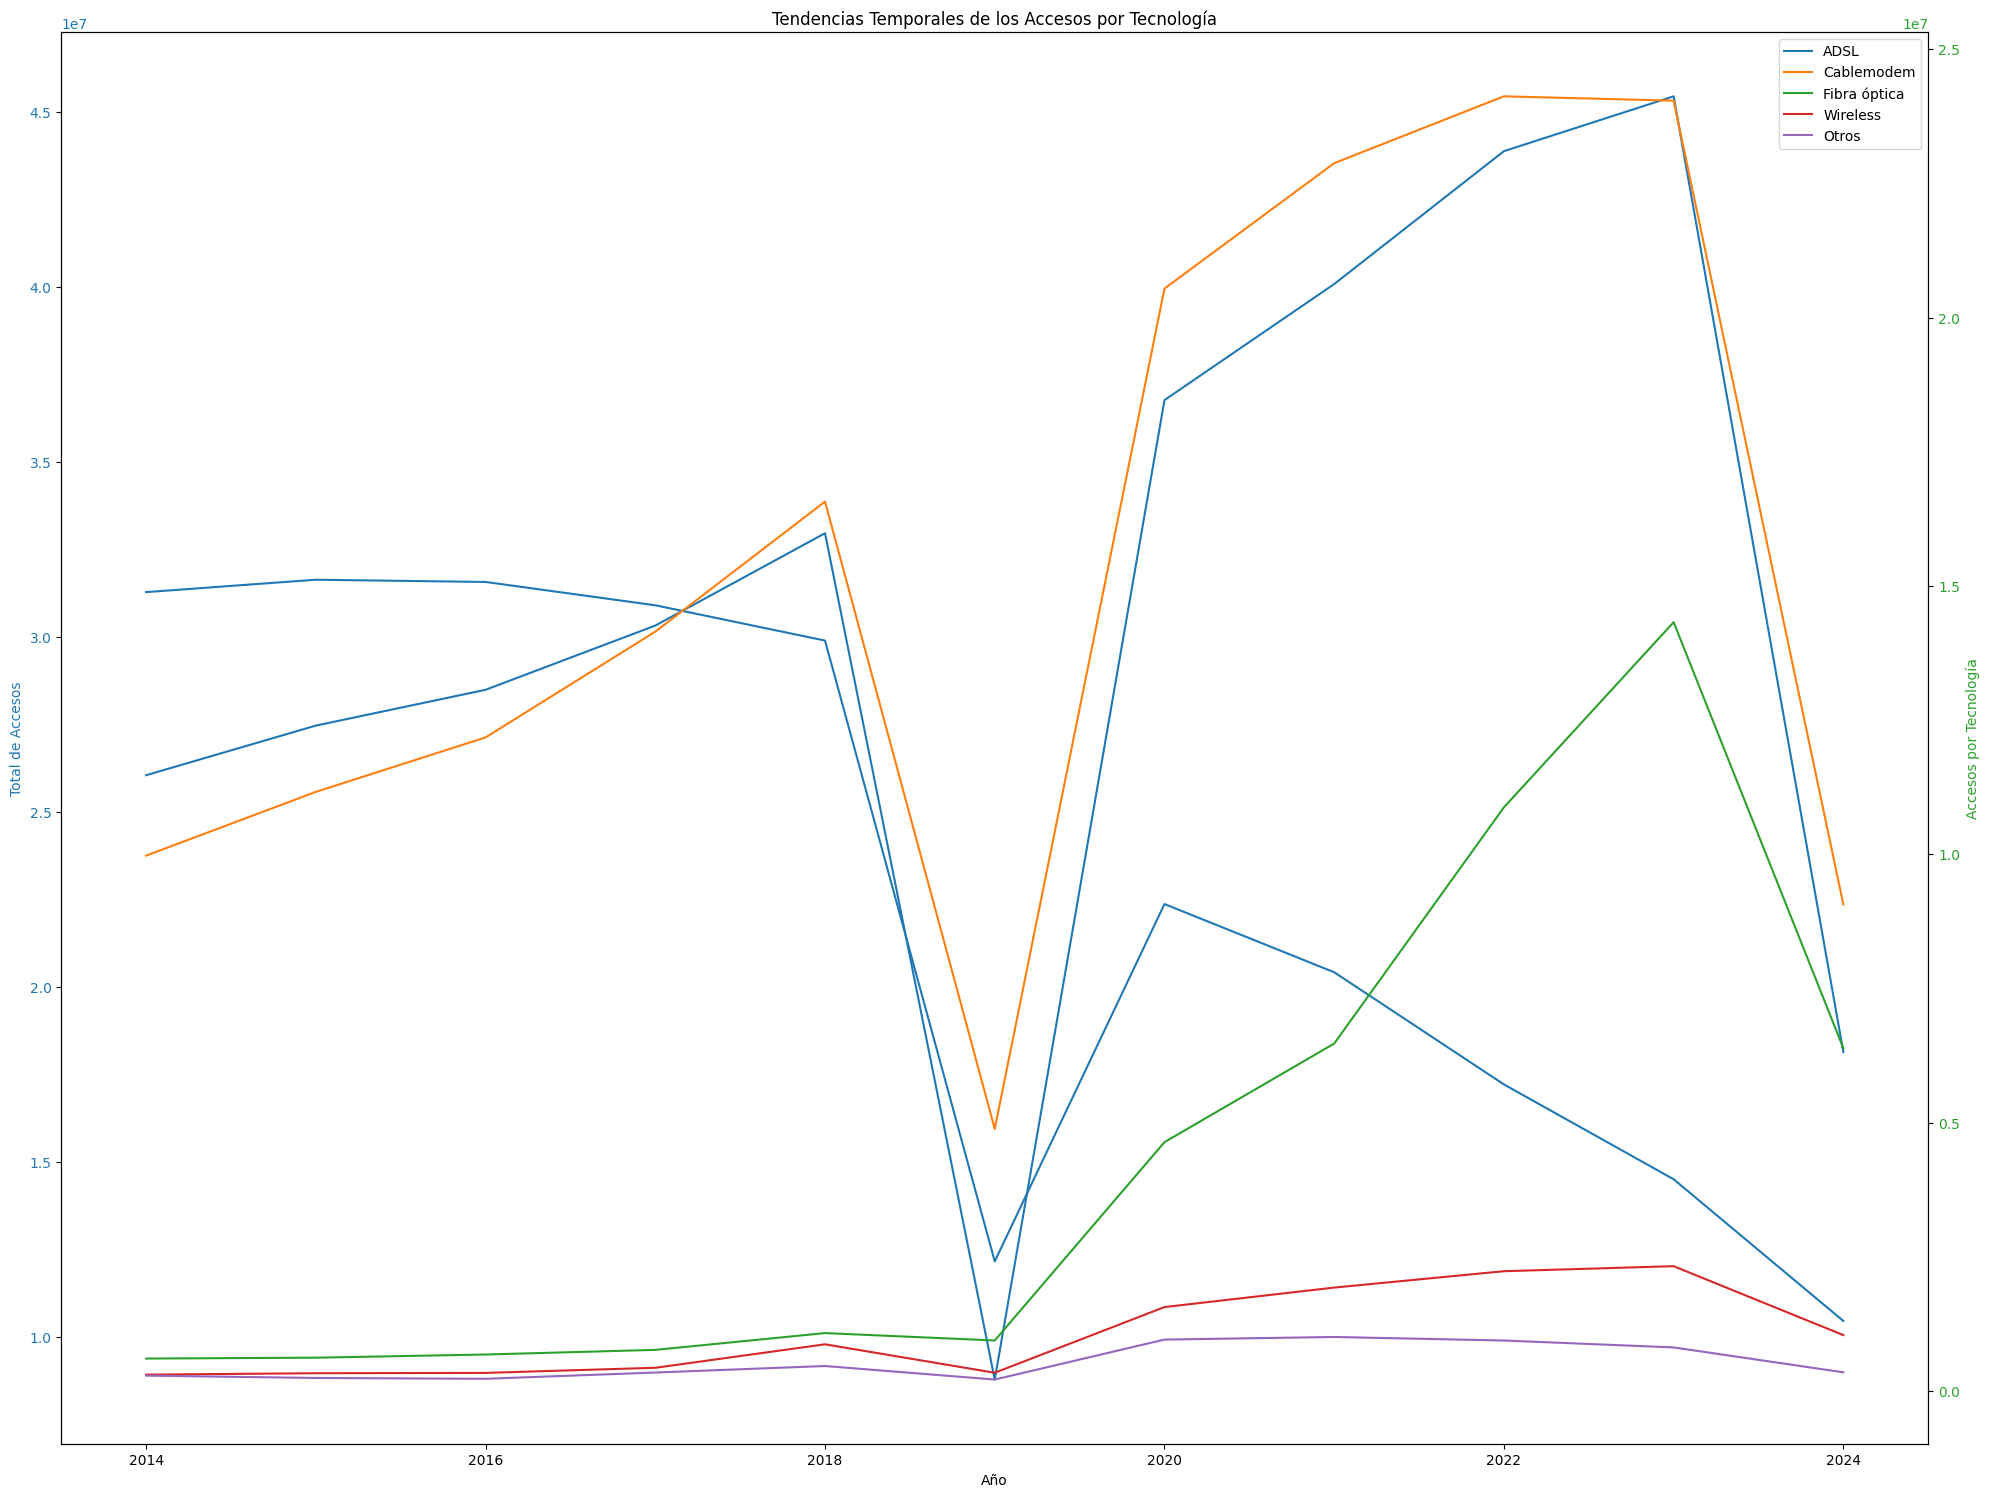

In [15]:
# Cargar la hoja 'Accesos Por Tecnología' en el dataframe df11
df11 = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df11.head())

# Búsqueda de valores faltantes
missing_values_df11 = df11.isnull().sum()
print("Valores faltantes por columna en df11:\n", missing_values_df11)

# Detección de registros duplicados
duplicate_records_df11 = df11.duplicated().sum()
print("Número de registros duplicados en df11:", duplicate_records_df11)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    Q1 = df11[column].quantile(0.25)
    Q3 = df11[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df11[(df11[column] < lower_bound) | (df11[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df11[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df11[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].hist(bins=30, figsize=(20, 15))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(20, 15))
correlation_matrix_df11 = df11.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df11, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df11')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Eliminar filas que contienen un asterisco en cualquier columna
df11 = df11[~df11.apply(lambda row: row.astype(str).str.contains('\*').any(), axis=1)]

# Convertir la columna 'Total' a valores numéricos
df11['Total'] = pd.to_numeric(df11['Total'], errors='coerce')

# Verificar que la columna 'Total' es numérica
print(df11['Total'].dtype)

# Continuar con el análisis después de la limpieza
fig, ax1 = plt.subplots(figsize=(20, 15))

# Total en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Accesos', color=color)
ax1.plot(df11.groupby('Año')['Total'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Otros tipos de tecnología en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accesos por Tecnología', color=color)
for column in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    ax2.plot(df11.groupby('Año')[column].sum(), label=column)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de los Accesos por Tecnología')
plt.legend()
plt.show()



En el punto anterior, como se ha mencionado, se observa mayor presencia de outliers debido a que se analizan datos desagregados. Por lo que a mayor detalle de las variables, más probable es que se observen datos extremos o atípicos.

    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151                    67024   
1  2024          1           28801                    69355   
2  2023          4           29708                    71742   
3  2023          3           30274                    80609   
4  2023          2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   348253         8357088  341368  11556107  
1                   353896      

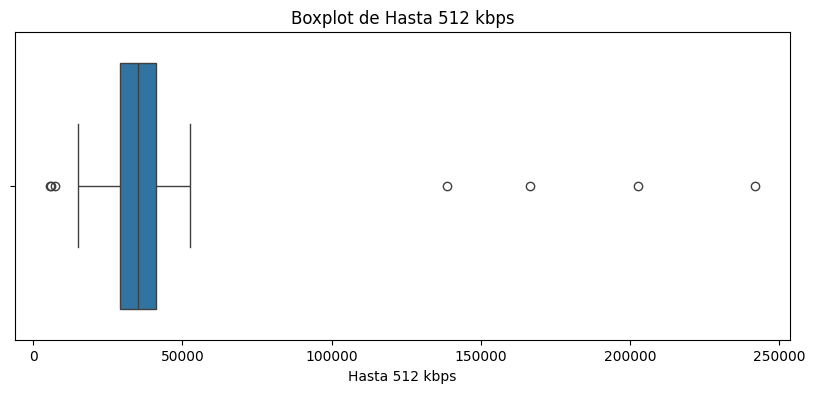

Filas con valores atípicos en 'Entre 512 Kbps y 1 Mbps':
      Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
39  2014          3           37430                   608018   
40  2014          2           41064                   656408   
41  2014          1           52684                   687619   

    Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
39                5153437                  373372                   182483   
40                5149574                  341689                   147273   
41                5130294                  289182                   101127   

    Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  OTROS    Total  
39                      507           12424      0  6367671  
40                      478           12259      0  6348745  
41                      345           11595      0  6272846  


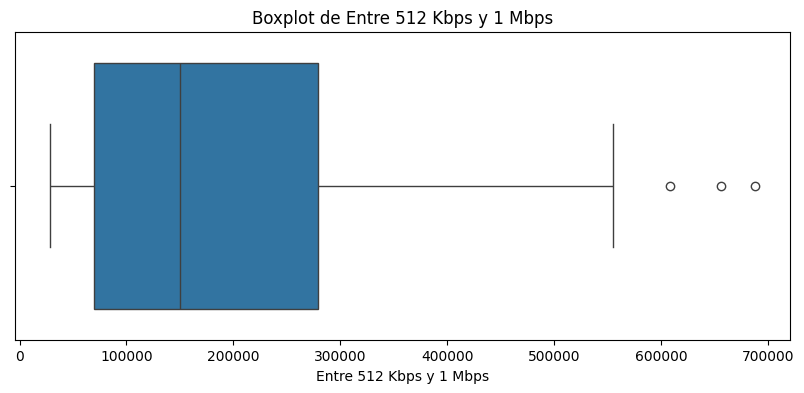

Filas con valores atípicos en 'Entre 1 Mbps y 6 Mbps':
 Empty DataFrame
Columns: [Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total]
Index: []


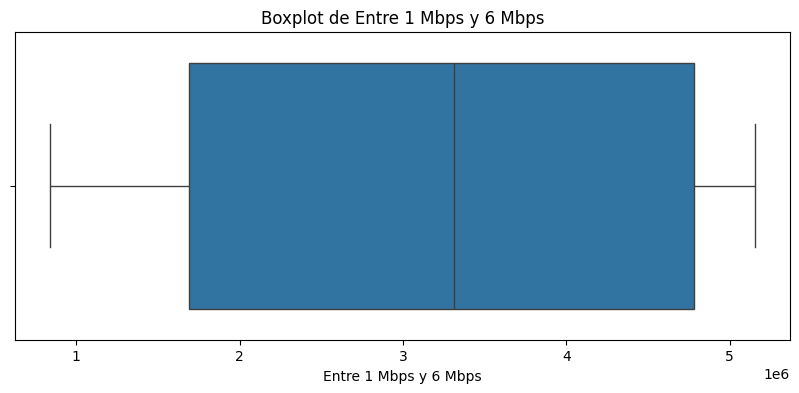

Filas con valores atípicos en 'Entre 6 Mbps y 10 Mbps':
      Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
38  2014          4           44075                   554749   
39  2014          3           37430                   608018   
40  2014          2           41064                   656408   
41  2014          1           52684                   687619   

    Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
38                5084556                  496251                   276254   
39                5153437                  373372                   182483   
40                5149574                  341689                   147273   
41                5130294                  289182                   101127   

    Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  OTROS    Total  
38                     4371           15229      0  6475485  
39                      507           12424      0  6367671  
40                      478           12259  

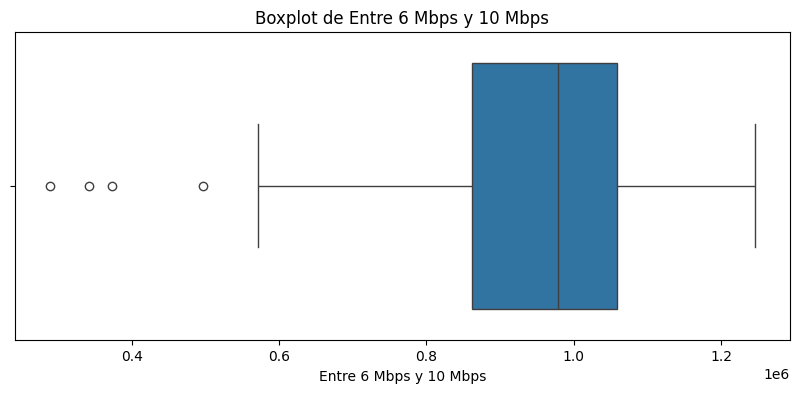

Filas con valores atípicos en 'Entre 10 Mbps y 20 Mbps':
      Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
23  2018          3            5675                   220589   
24  2018          2            5972                   219467   
25  2018          1            7309                   215406   
26  2017          4           15041                   221474   
27  2017          3           19022                   217997   
40  2014          2           41064                   656408   
41  2014          1           52684                   687619   

    Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
23                3401277                  859413                  1607137   
24                3316868                  979416                  1905839   
25                3272724                  976956                  2068087   
26                3773159                 1005545                  1730353   
27                4062226              

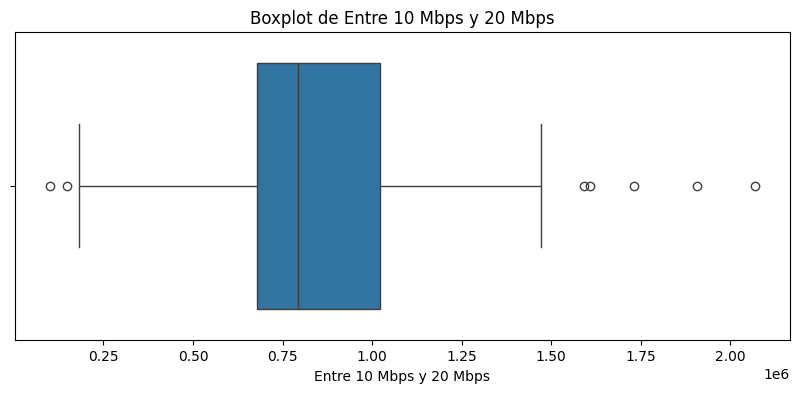

Filas con valores atípicos en 'Entre 20 Mbps y 30 Mbps':
      Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
22  2018          4          138740                   201196   
23  2018          3            5675                   220589   

    Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
22                3337982                  882388                  1472634   
23                3401277                  859413                  1607137   

    Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS    Total  
22                  1688748          599579  152388  8473655  
23                  1571692          524777  156475  8347035  


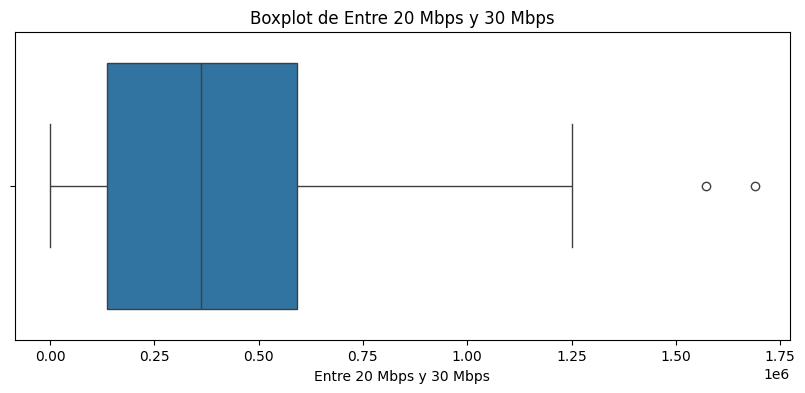

Filas con valores atípicos en 'Más de 30 Mbps':
 Empty DataFrame
Columns: [Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total]
Index: []


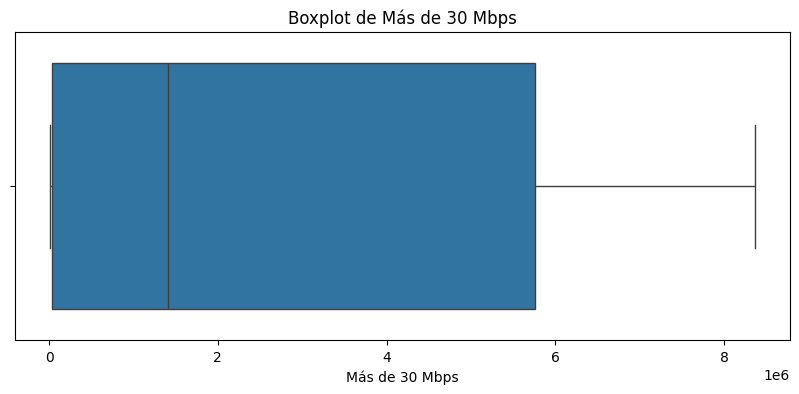

Filas con valores atípicos en 'OTROS':
 Empty DataFrame
Columns: [Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total]
Index: []


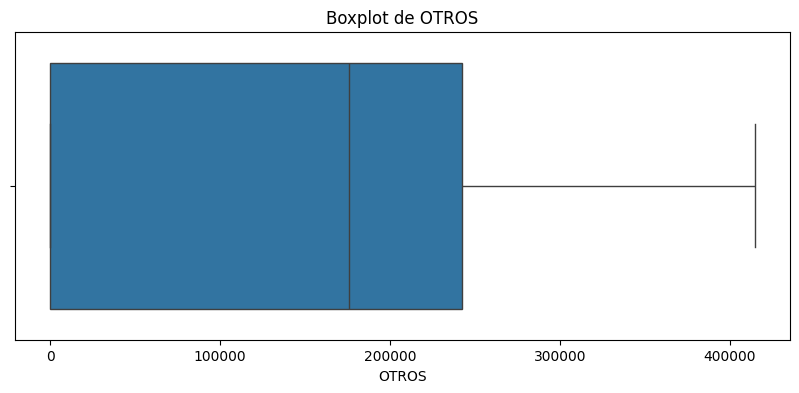

Filas con valores atípicos en 'Total':
 Empty DataFrame
Columns: [Año, Trimestre, Hasta 512 kbps, Entre 512 Kbps y 1 Mbps, Entre 1 Mbps y 6 Mbps, Entre 6 Mbps y 10 Mbps, Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS, Total]
Index: []


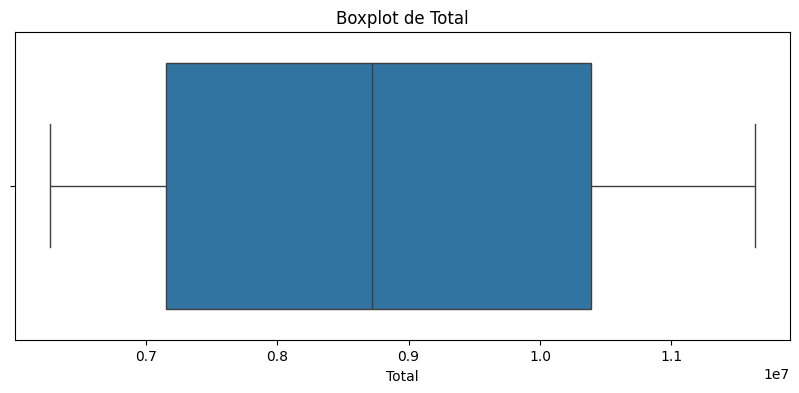

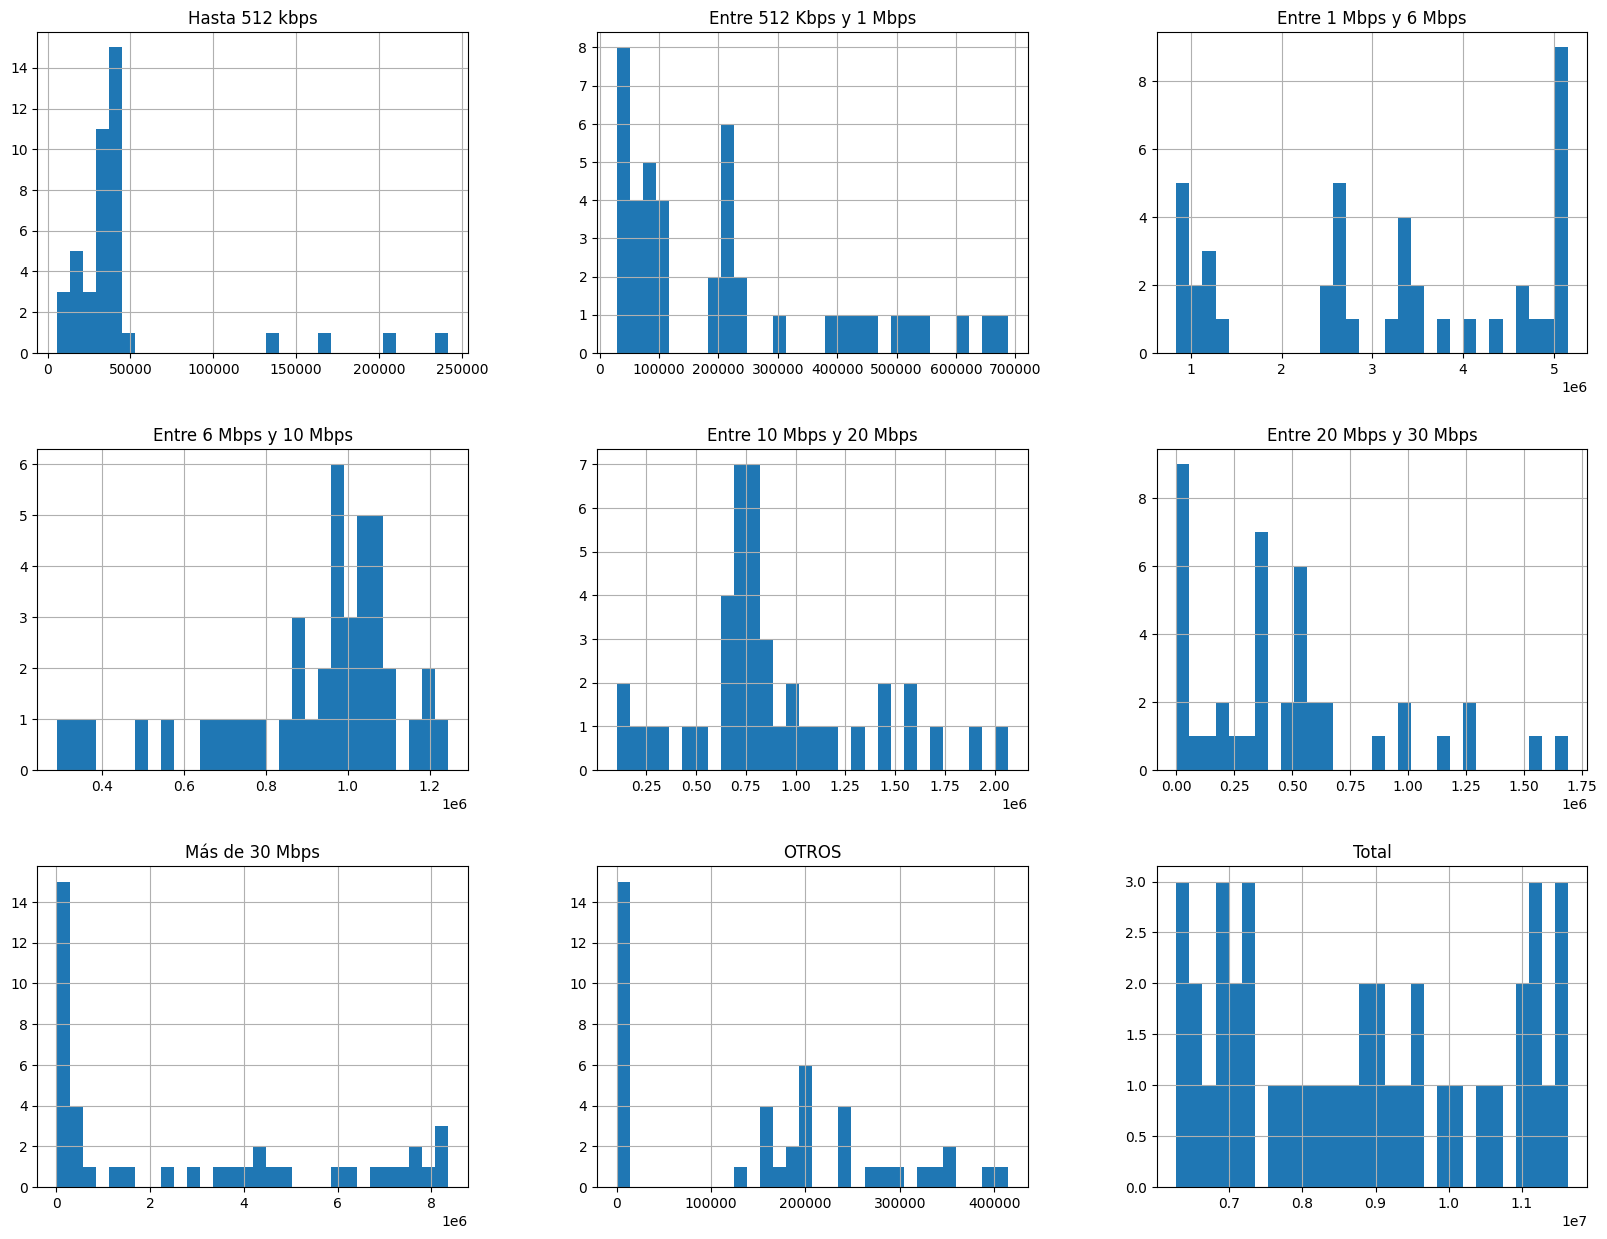

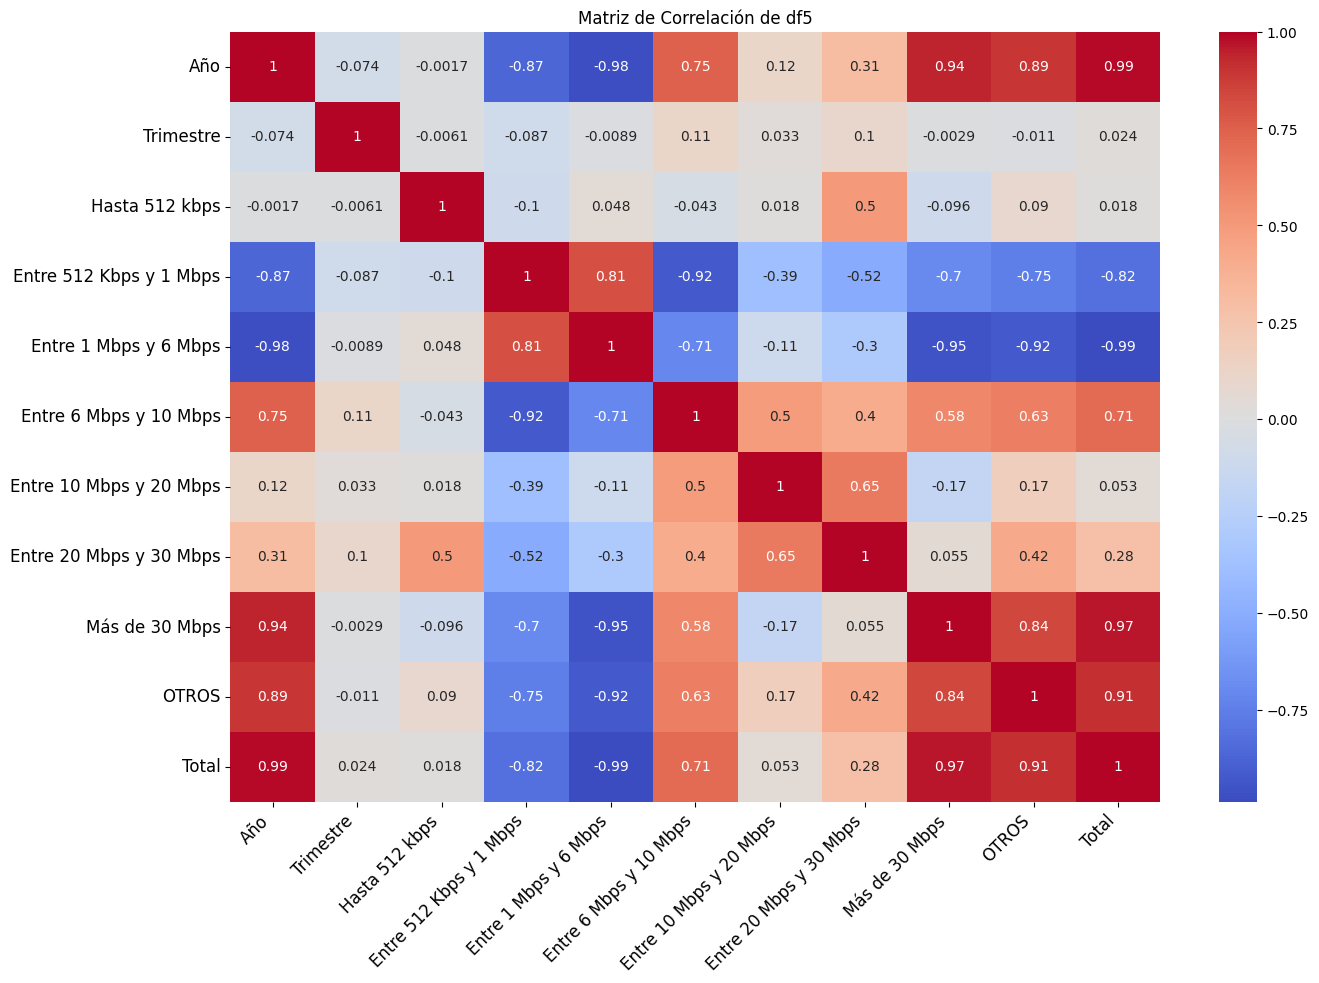

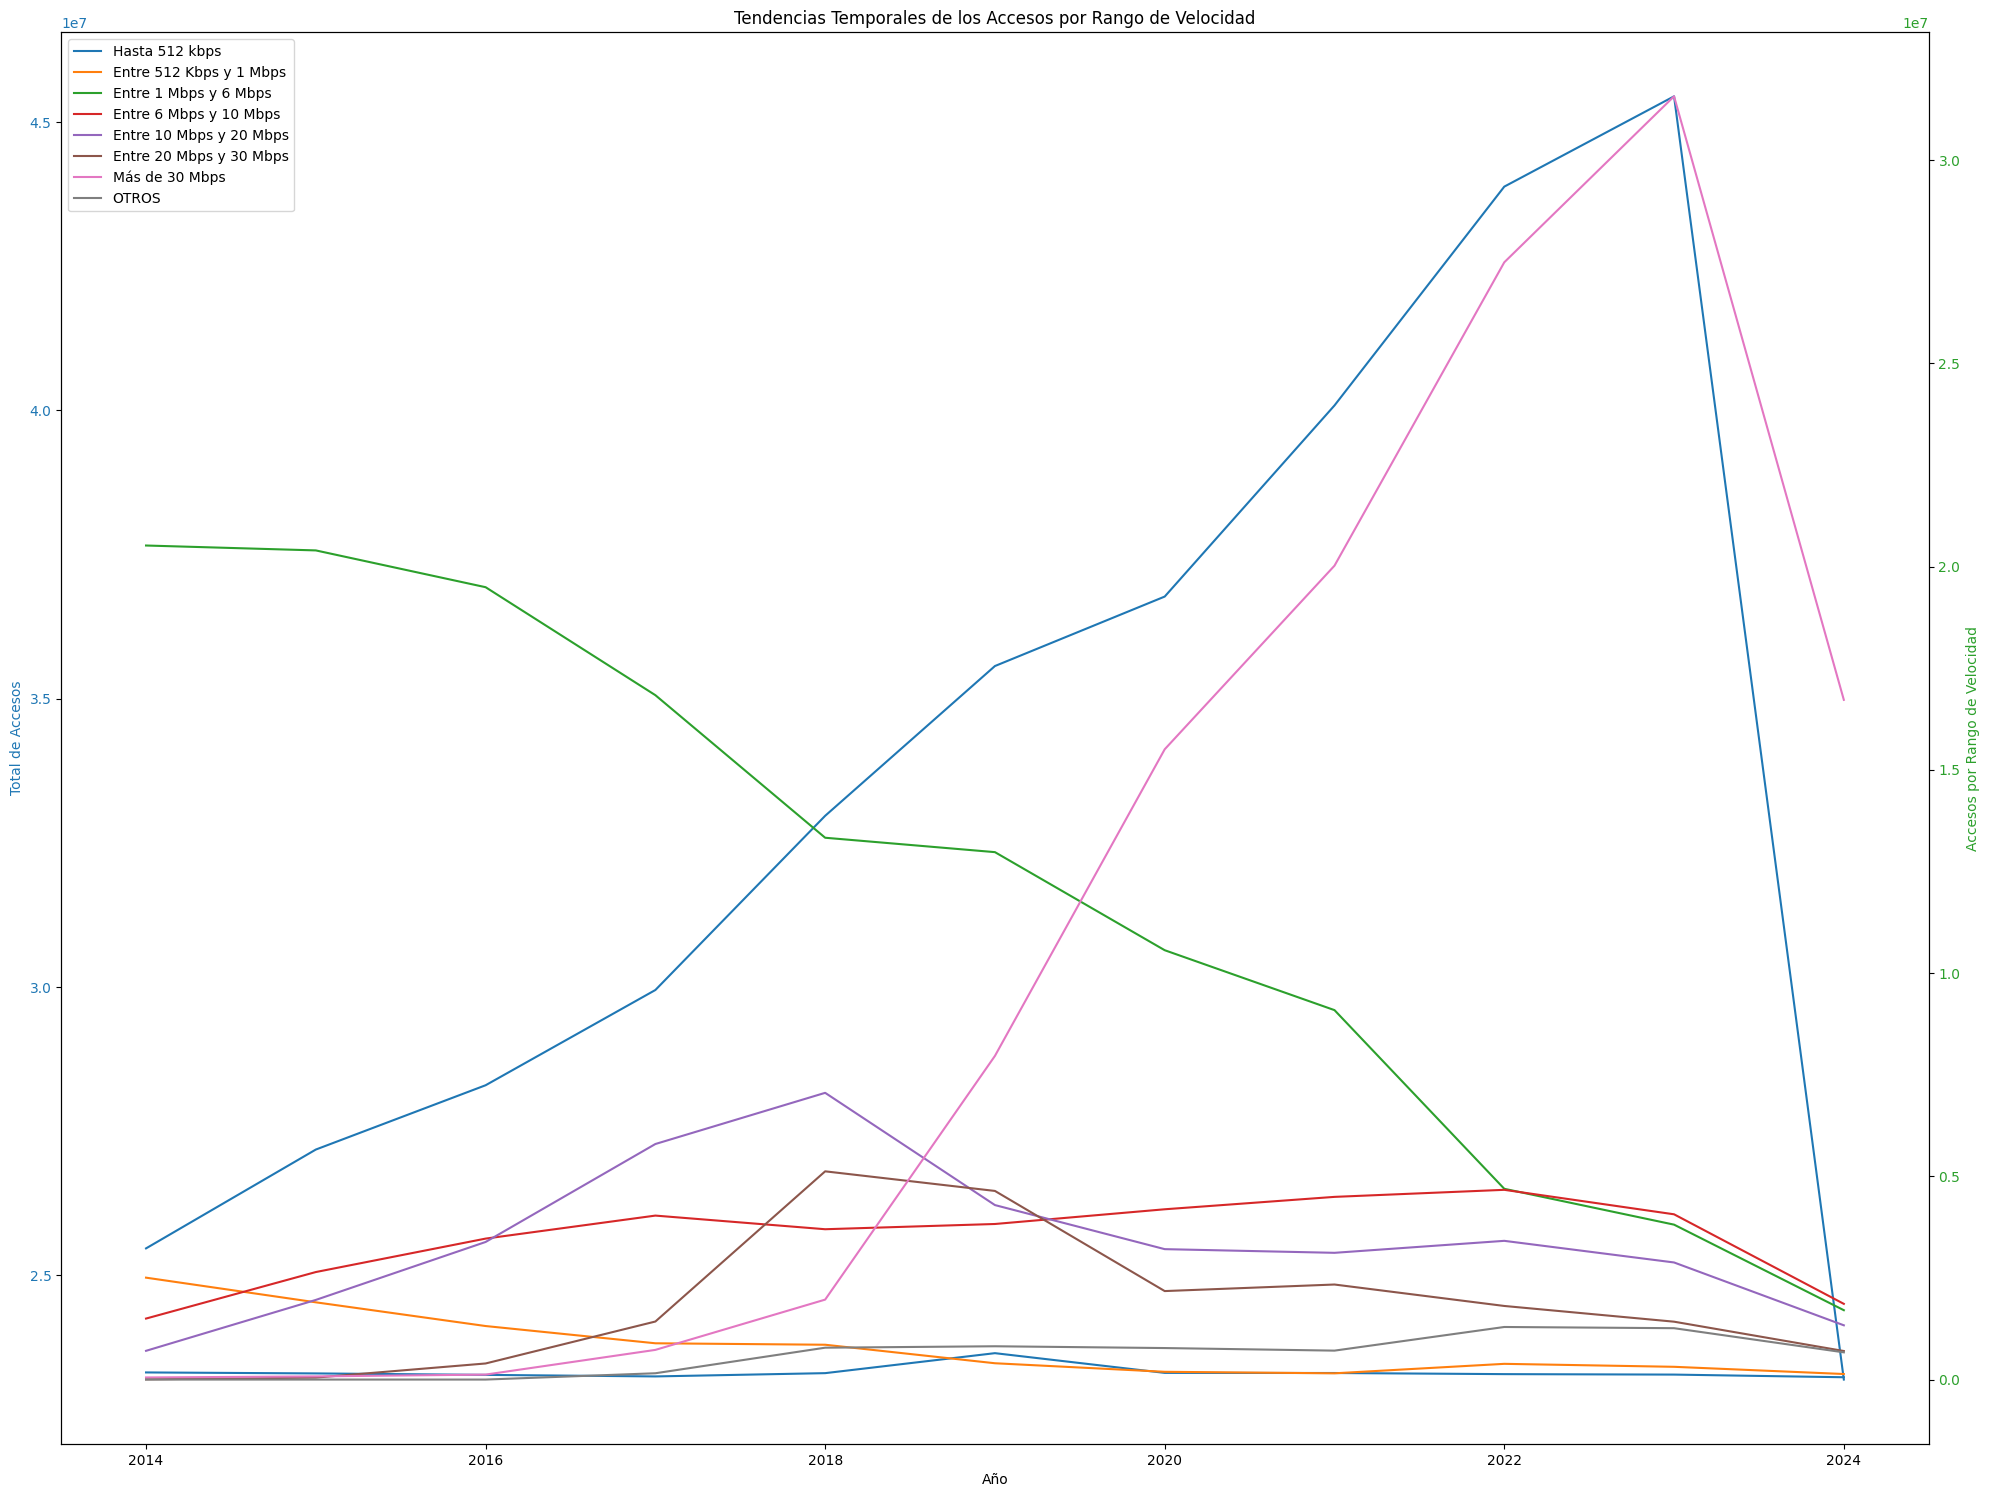

In [16]:
# Cargar la hoja 'Totales Accesos por rango' en el dataframe df5
df5 = pd.read_excel(file_path, sheet_name='Totales Accesos por rango')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df5.head())

# Búsqueda de valores faltantes
missing_values_df5 = df5.isnull().sum()
print("Valores faltantes por columna en df5:\n", missing_values_df5)

# Detección de registros duplicados
duplicate_records_df5 = df5.duplicated().sum()
print("Número de registros duplicados en df5:", duplicate_records_df5)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']:
    Q1 = df5[column].quantile(0.25)
    Q3 = df5[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df5[(df5[column] < lower_bound) | (df5[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df5[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df5[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']].hist(bins=30, figsize=(20, 15))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(15, 10))
correlation_matrix_df5 = df5.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df5, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df5')
plt.xticks(rotation= 45, ha= 'right', fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

# Análisis de Tendencias Temporales para df5
fig, ax1 = plt.subplots(figsize=(20, 15))

# Total en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Accesos', color=color)
ax1.plot(df5.groupby('Año')['Total'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Otros rangos de velocidad en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accesos por Rango de Velocidad', color=color)
for column in ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS']:
    ax2.plot(df5.groupby('Año')[column].sum(), label=column)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de los Accesos por Rango de Velocidad')
plt.legend()
plt.show()



En este punto es relevante dos observaciones,la primera es que, en el histograma de distribución la agrupación de los valores se encuentra en los extremos, tanto mínimo como máximo, entendiendo que hay períodos con poco acceso a internet, seguido de períodos con un incremento importante en el acceso. La segunda, lo podemos observar en el gráfico de tendencia, en donde se observa la disminución consistente de acceso a baja velocidad mientras que los accesos superiores a 30 Mbps a partir del año 2018 tienen un crecimiento importante y acelerado.

    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             106302.0  4020395.0  125547.0  4989380.0  
1               5633.0  1355333.0     

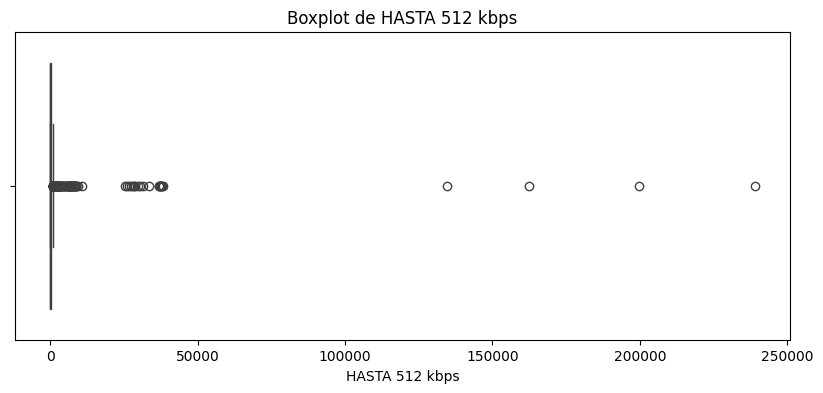

Filas con valores atípicos en '+ 512 Kbps - 1 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0             23034.00   
24   2024          1     Buenos Aires         26002.0             22510.00   
48   2024          4     Buenos Aires         26909.0             23962.00   
72   2023          3     Buenos Aires         27440.0             24820.00   
96   2023          2     Buenos Aires         28007.0             24674.00   
..    ...        ...              ...             ...                  ...   
983  2014          2          Tucumán             6.0             32714.00   
984  2014          1     Buenos Aires          8469.0            171244.48   
985  2014          1  Capital Federal           852.0             88825.52   
989  2014          1          Córdoba          2076.0            107705.00   
991  2014          1       Entre Ríos          2177.0             35206.00   

     + 1 

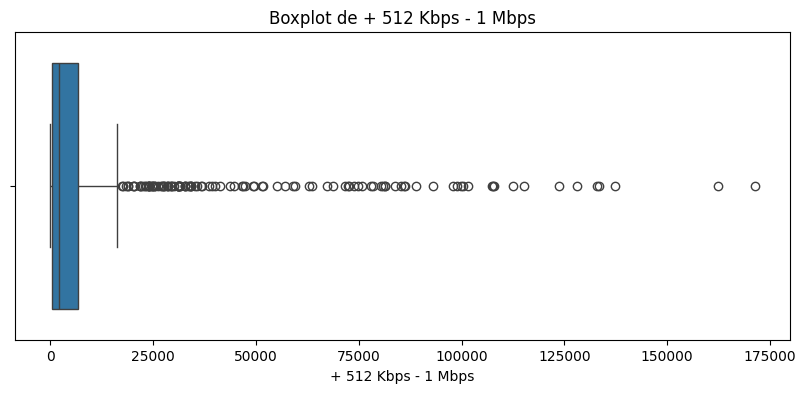

Filas con valores atípicos en '+ 1 Mbps - 6 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0             23034.00   
24   2024          1     Buenos Aires         26002.0             22510.00   
48   2024          4     Buenos Aires         26909.0             23962.00   
72   2023          3     Buenos Aires         27440.0             24820.00   
96   2023          2     Buenos Aires         28007.0             24674.00   
..    ...        ...              ...             ...                  ...   
965  2014          2          Córdoba          2105.0            101598.00   
980  2014          2         Santa Fe          8515.0            115197.00   
984  2014          1     Buenos Aires          8469.0            171244.48   
985  2014          1  Capital Federal           852.0             88825.52   
989  2014          1          Córdoba          2076.0            107705.00   

     + 1 Mb

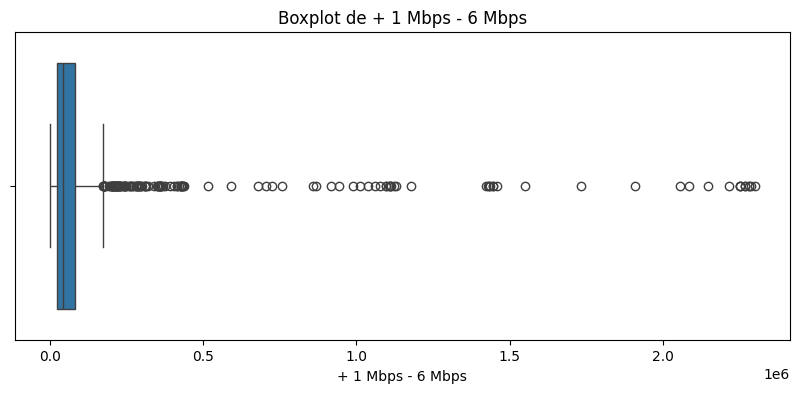

Filas con valores atípicos en '+ 6 Mbps - 10 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0             23034.00   
20   2024          2         Santa Fe           476.0              6016.00   
24   2024          1     Buenos Aires         26002.0             22510.00   
44   2024          1         Santa Fe           468.0              6417.00   
48   2024          4     Buenos Aires         26909.0             23962.00   
..    ...        ...              ...             ...                  ...   
913  2014          4  Capital Federal          2698.0             62895.80   
936  2014          3     Buenos Aires          7355.0            128186.72   
937  2014          3  Capital Federal           840.0             78016.28   
960  2014          2     Buenos Aires          6902.0            162273.72   
984  2014          1     Buenos Aires          8469.0            171244.48   

     + 1 M

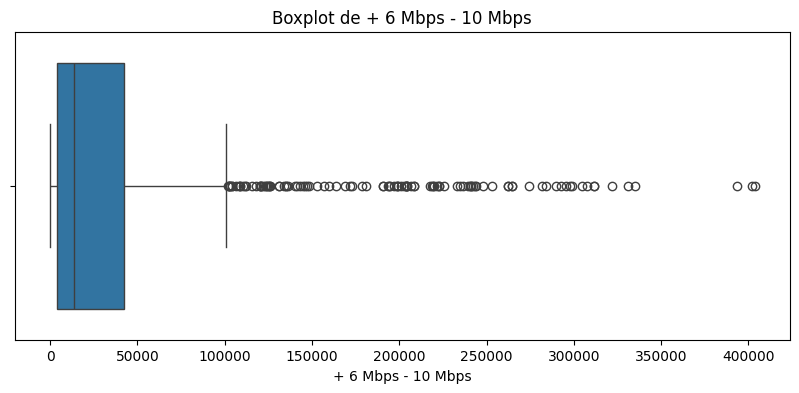

Filas con valores atípicos en '+ 10 Mbps - 20 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0             23034.00   
24   2024          1     Buenos Aires         26002.0             22510.00   
48   2024          4     Buenos Aires         26909.0             23962.00   
72   2023          3     Buenos Aires         27440.0             24820.00   
92   2023          3         Santa Fe           468.0              7174.00   
..    ...        ...              ...             ...                  ...   
889  2015          1  Capital Federal          2545.0             59084.12   
912  2014          4     Buenos Aires          8226.0            132937.20   
913  2014          4  Capital Federal          2698.0             62895.80   
936  2014          3     Buenos Aires          7355.0            128186.72   
937  2014          3  Capital Federal           840.0             78016.28   

     + 1 

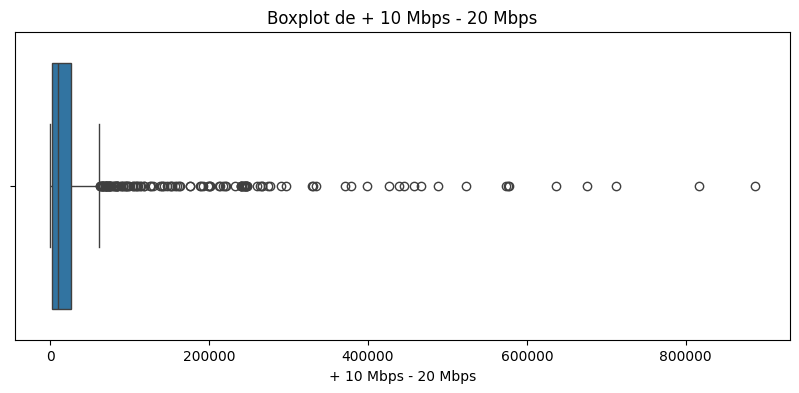

Filas con valores atípicos en '+ 20 Mbps - 30 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0              23034.0   
5    2024          2          Córdoba           103.0               7771.0   
18   2024          2         San Luis            60.0                629.0   
24   2024          1     Buenos Aires         26002.0              22510.0   
29   2024          1          Córdoba            99.0               8056.0   
..    ...        ...              ...             ...                  ...   
720  2016          4     Buenos Aires          6055.0              86281.0   
721  2016          4  Capital Federal           517.0               1477.0   
744  2016          3     Buenos Aires          5856.0             107945.0   
745  2016          3  Capital Federal           331.0                995.0   
768  2016          2     Buenos Aires         10786.0             133385.0   

     + 1 

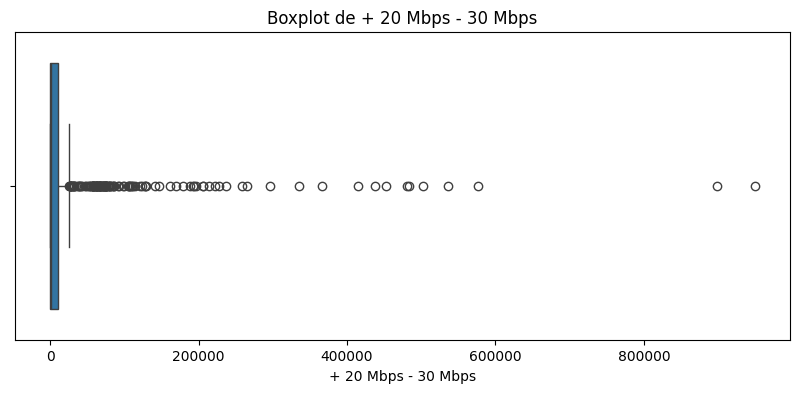

Filas con valores atípicos en '+ 30 Mbps':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0              23034.0   
1    2024          2  Capital Federal           518.0               4122.0   
5    2024          2          Córdoba           103.0               7771.0   
7    2024          2       Entre Ríos           107.0               4123.0   
12   2024          2          Mendoza           108.0               2945.0   
..    ...        ...              ...             ...                  ...   
577  2018          2  Capital Federal            73.0               9234.0   
600  2018          1     Buenos Aires          1514.0              74766.0   
601  2018          1  Capital Federal            89.0              10039.0   
624  2017          4     Buenos Aires          3865.0              55046.0   
625  2017          4  Capital Federal           314.0              31411.0   

     + 1 Mbps - 6 M

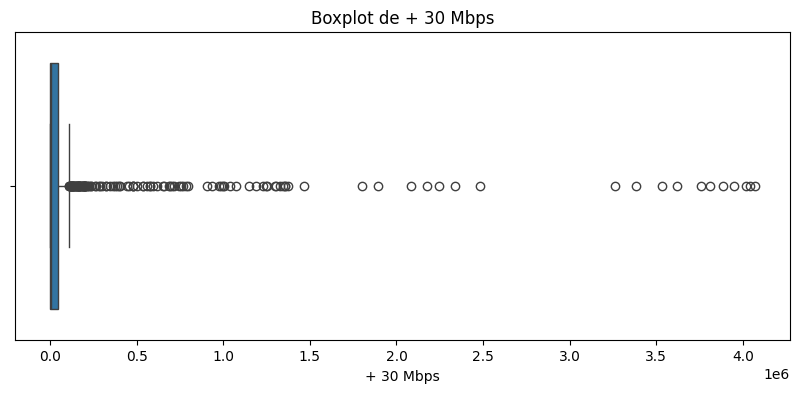

Filas con valores atípicos en 'OTROS':
       Año  Trimestre            Provincia  HASTA 512 kbps  \
0    2024          2         Buenos Aires         25287.0   
14   2024          2              Neuquén           146.0   
17   2024          2             San Juan            27.0   
19   2024          2           Santa Cruz            56.0   
20   2024          2             Santa Fe           476.0   
..    ...        ...                  ...             ...   
600  2018          1         Buenos Aires          1514.0   
612  2018          1              Mendoza            20.0   
620  2018          1             Santa Fe          1359.0   
621  2018          1  Santiago Del Estero            41.0   
624  2017          4         Buenos Aires          3865.0   

     + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0                23034.0           222627.0            221660.0   
14                 990.0            35229.0             13345.0   
17                2022.0  

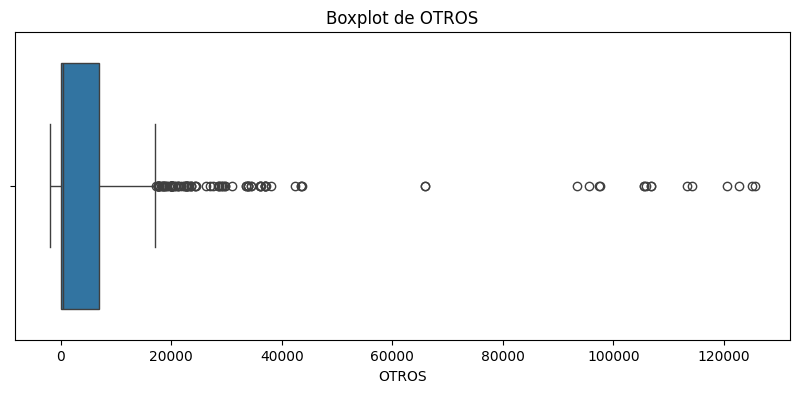

Filas con valores atípicos en 'Total':
       Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0    2024          2     Buenos Aires         25287.0             23034.00   
1    2024          2  Capital Federal           518.0              4122.00   
5    2024          2          Córdoba           103.0              7771.00   
20   2024          2         Santa Fe           476.0              6016.00   
24   2024          1     Buenos Aires         26002.0             22510.00   
..    ...        ...              ...             ...                  ...   
965  2014          2          Córdoba          2105.0            101598.00   
980  2014          2         Santa Fe          8515.0            115197.00   
984  2014          1     Buenos Aires          8469.0            171244.48   
985  2014          1  Capital Federal           852.0             88825.52   
989  2014          1          Córdoba          2076.0            107705.00   

     + 1 Mbps - 6 Mbps 

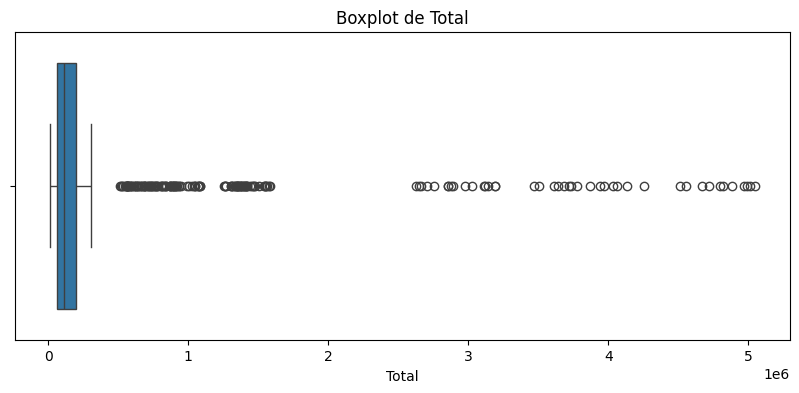

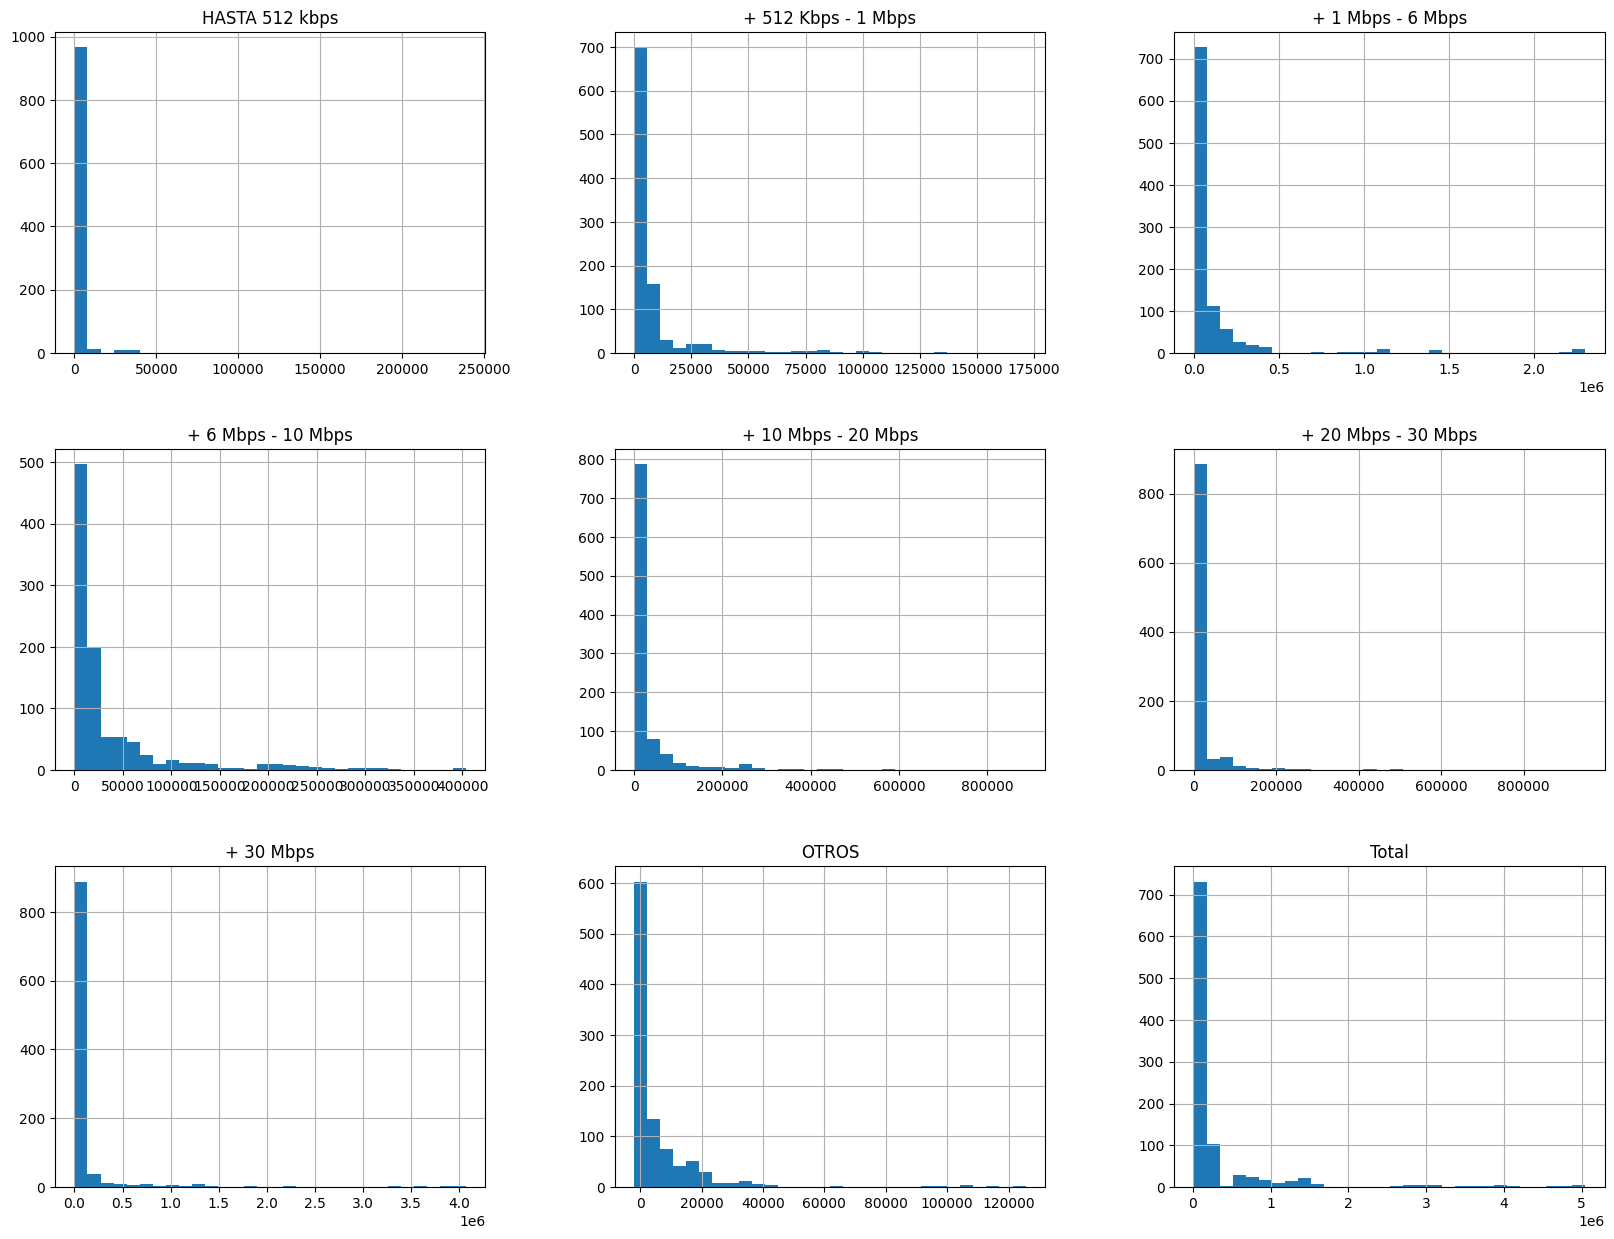

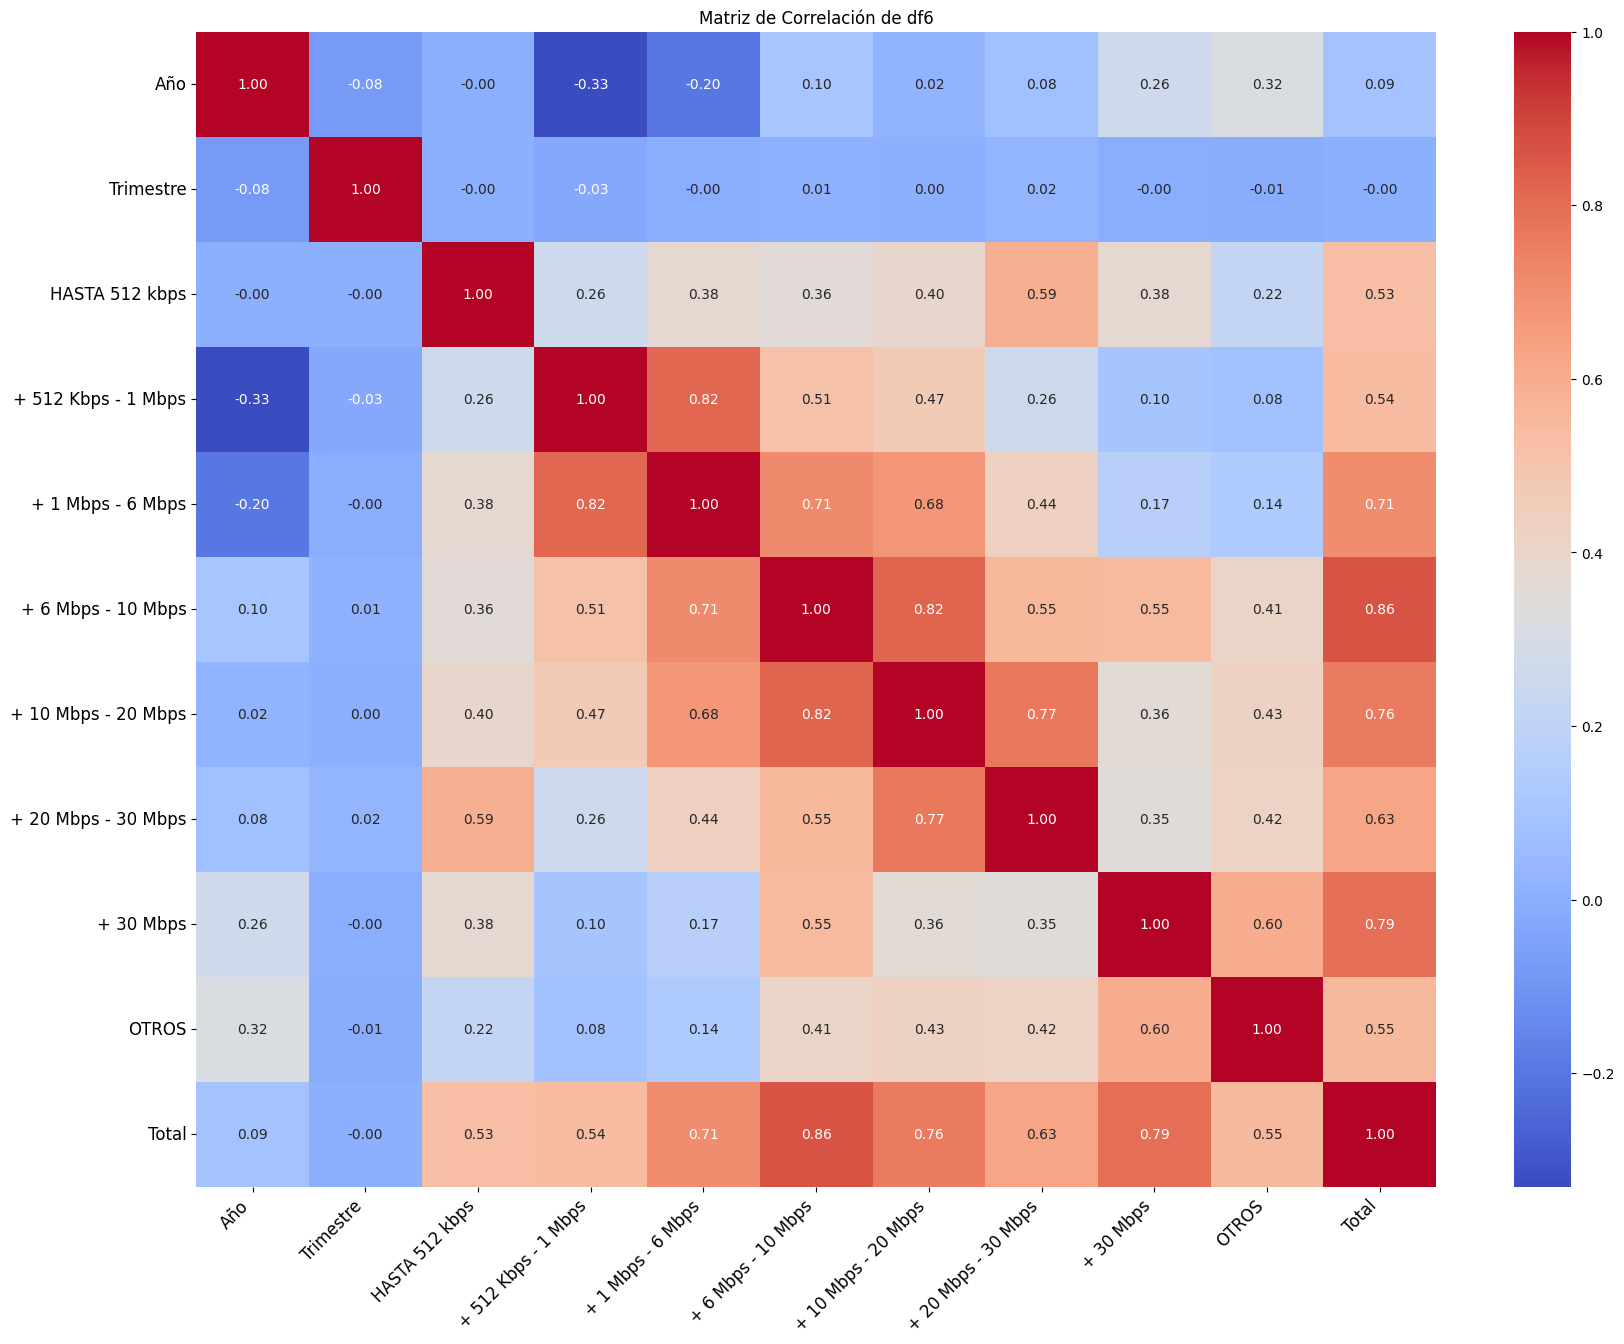

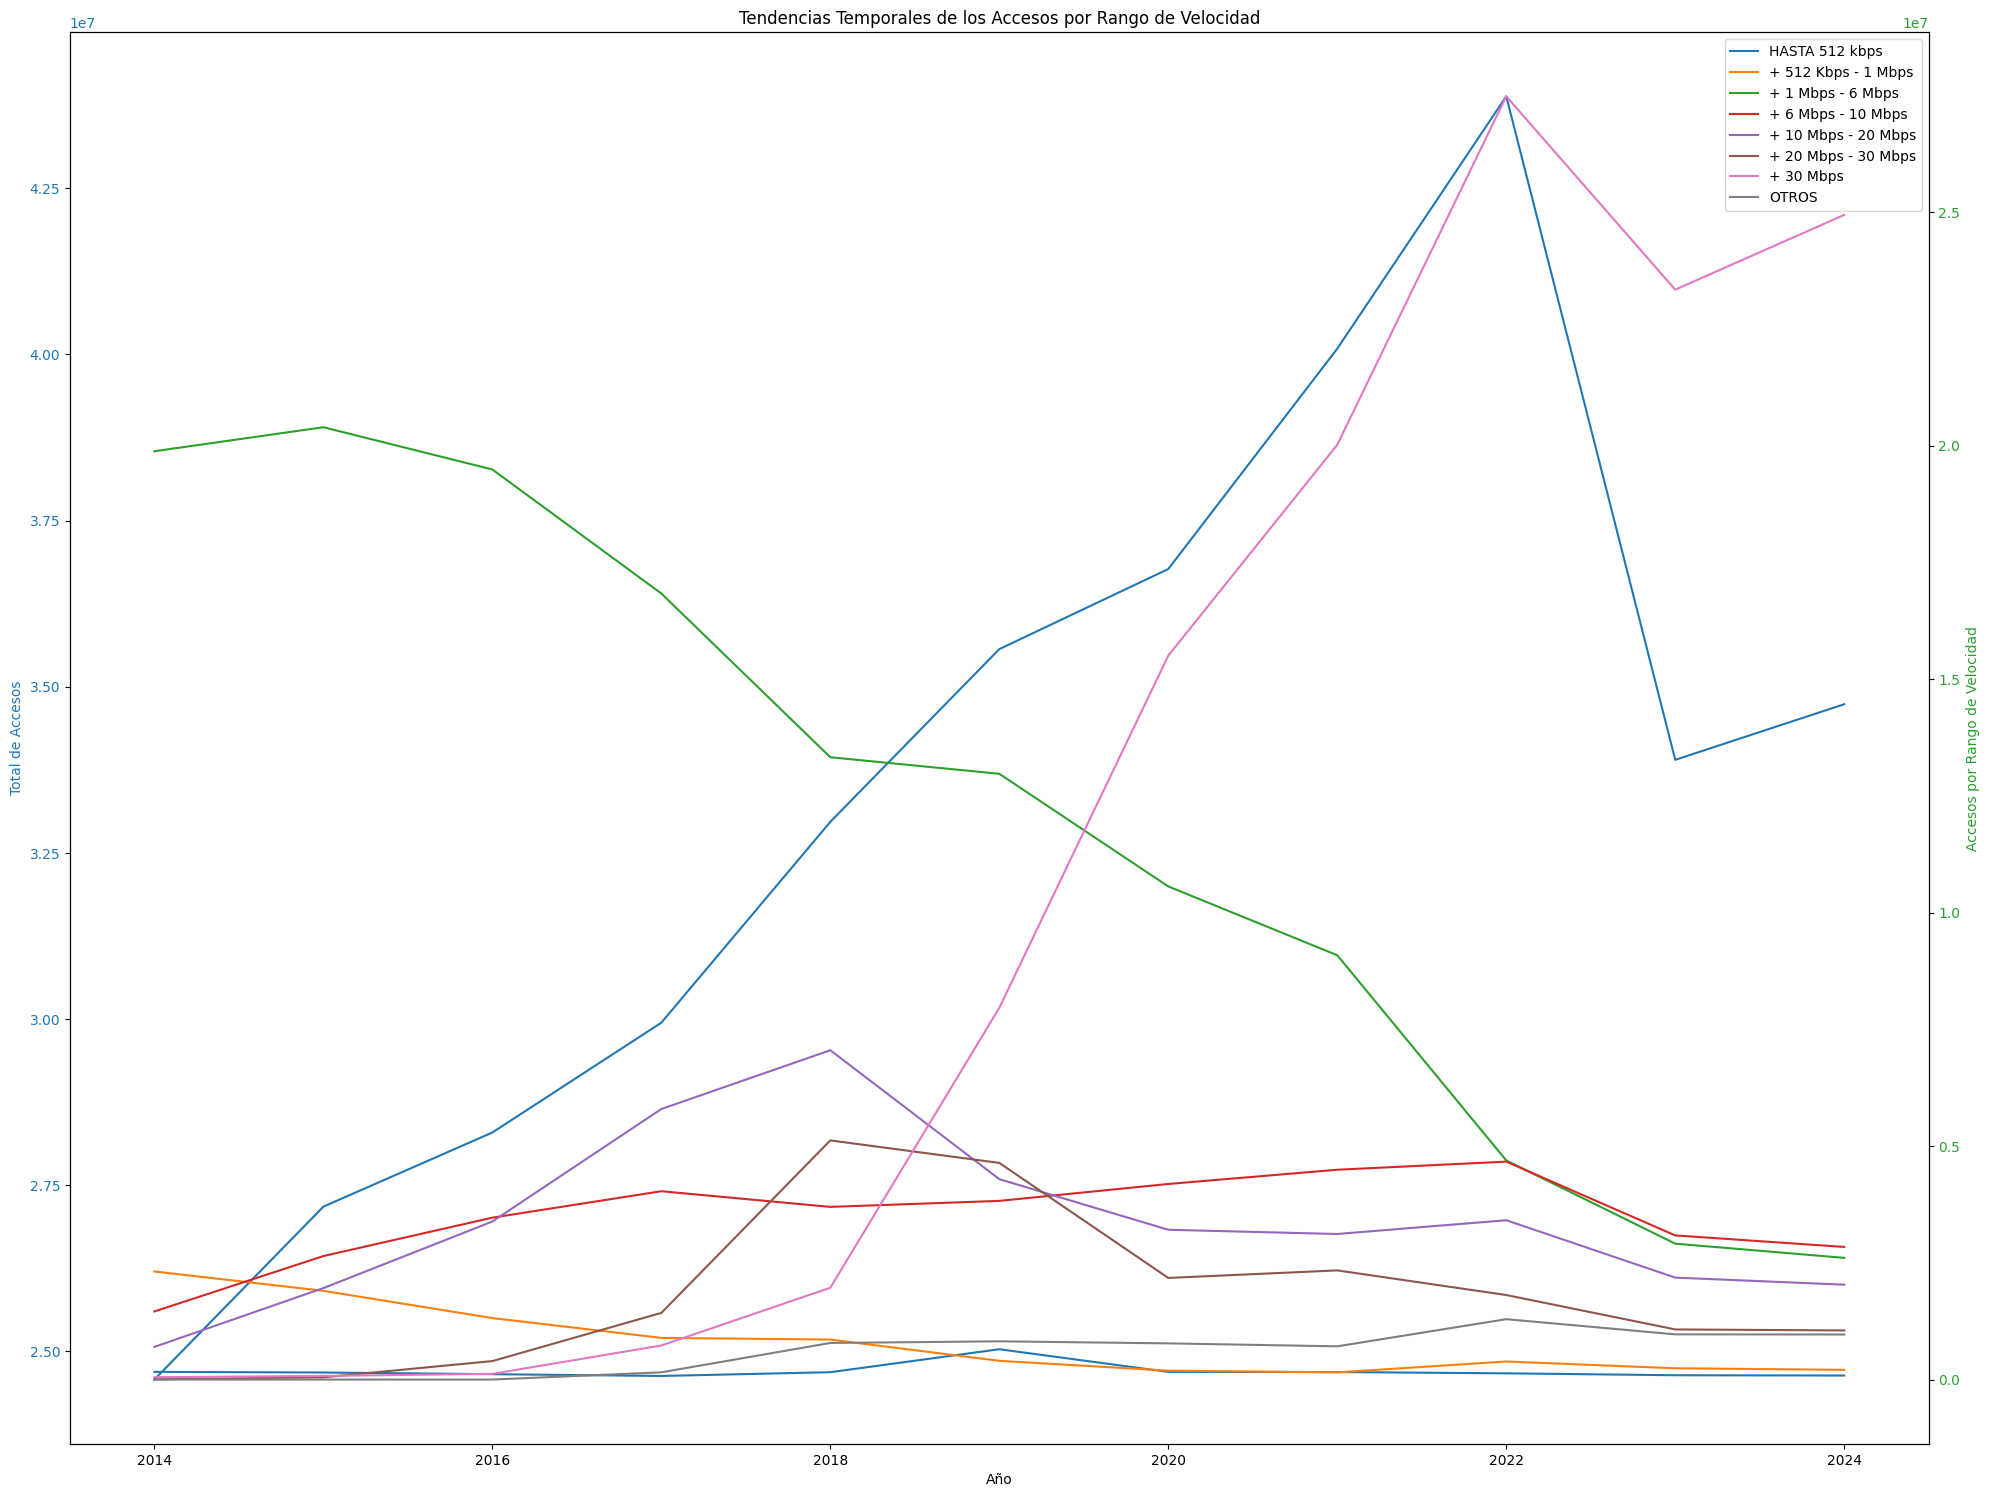

In [17]:
# Cargar la hoja 'Accesos por rangos' en el dataframe df6
df6 = pd.read_excel(file_path, sheet_name='Accesos por rangos')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df6.head())

# Búsqueda de valores faltantes
missing_values_df6 = df6.isnull().sum()
print("Valores faltantes por columna en df6:\n", missing_values_df6)

# Detección de registros duplicados
duplicate_records_df6 = df6.duplicated().sum()
print("Número de registros duplicados en df6:", duplicate_records_df6)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']:
    Q1 = df6[column].quantile(0.25)
    Q3 = df6[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df6[(df6[column] < lower_bound) | (df6[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df6[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df6[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']].hist(bins=30, figsize=(20, 15))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(20, 15))
correlation_matrix_df6 = df6.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df6, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df6')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(20, 15))

# Total en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Accesos', color=color)
ax1.plot(df6.groupby('Año')['Total'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Otros rangos de velocidad en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accesos por Rango de Velocidad', color=color)
for column in ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']:
    ax2.plot(df6.groupby('Año')[column].sum(), label=column)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de los Accesos por Rango de Velocidad')
plt.legend()
plt.show()


En este punto se destaca la correlación negativa entre las variable Año y los accesos a velocidades inferiores a 6 Mbps, sustentando el hecho de que a medida que han pasado los años, se ha realizado inversión en infraestructura permitiendo el acceso a internet a mayor velocidad.

    Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2024          2          11544314    11793  11556107   Abr-Jun 2024
1  2024          1          11621363    11793  11633156   Ene-Mar 2024
2  2023          4          11535868    11793  11547661   Oct-Dic 2023
3  2023          3          11395115    11793  11406908  Jul-Sept 2023
4  2023          2          11239781    12116  11251897   Abr-Jun 2023
Valores faltantes por columna en df3:
 Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64
Número de registros duplicados en df3: 0
Filas con valores atípicos en 'Banda ancha fija':
 Empty DataFrame
Columns: [Año, Trimestre, Banda ancha fija, Dial up, Total, Periodo]
Index: []


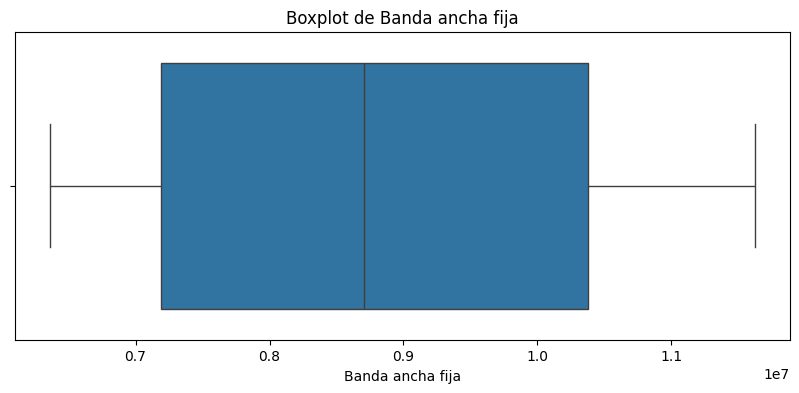

Filas con valores atípicos en 'Dial up':
 Empty DataFrame
Columns: [Año, Trimestre, Banda ancha fija, Dial up, Total, Periodo]
Index: []


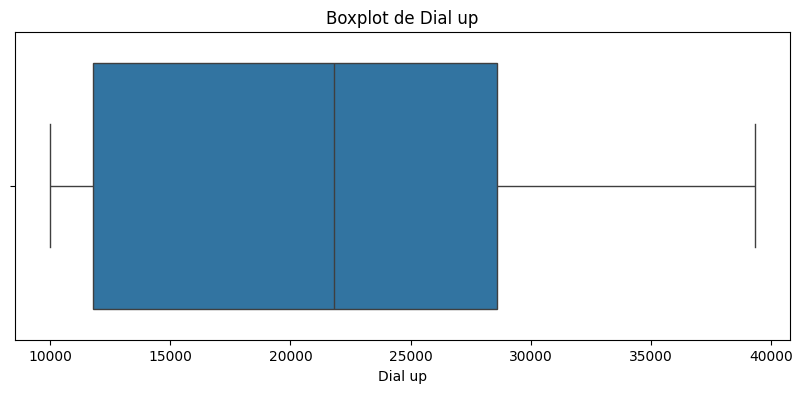

Filas con valores atípicos en 'Total':
 Empty DataFrame
Columns: [Año, Trimestre, Banda ancha fija, Dial up, Total, Periodo]
Index: []


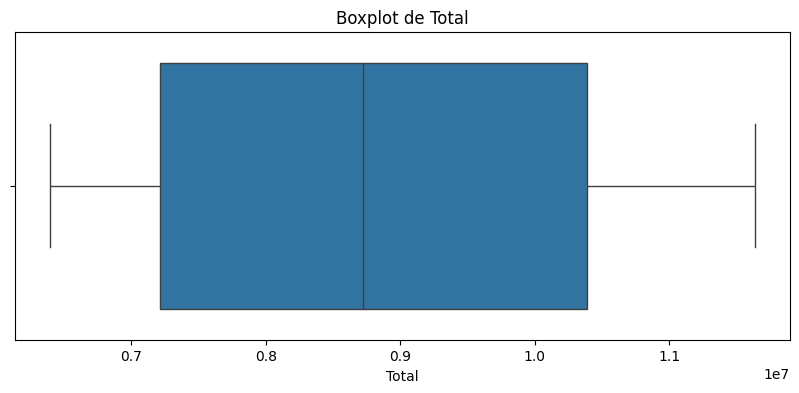

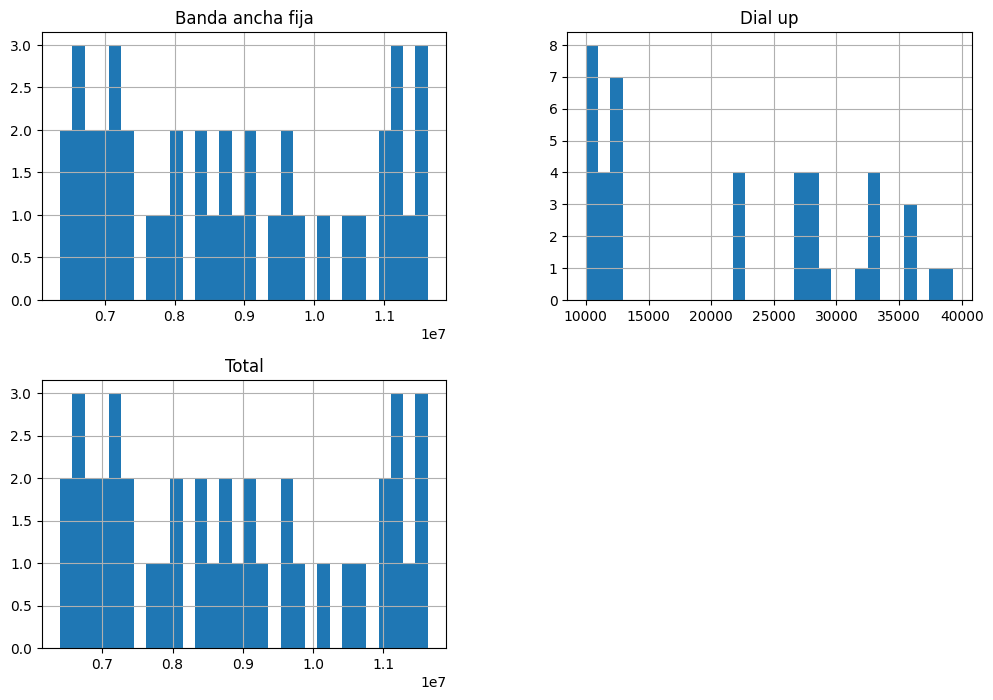

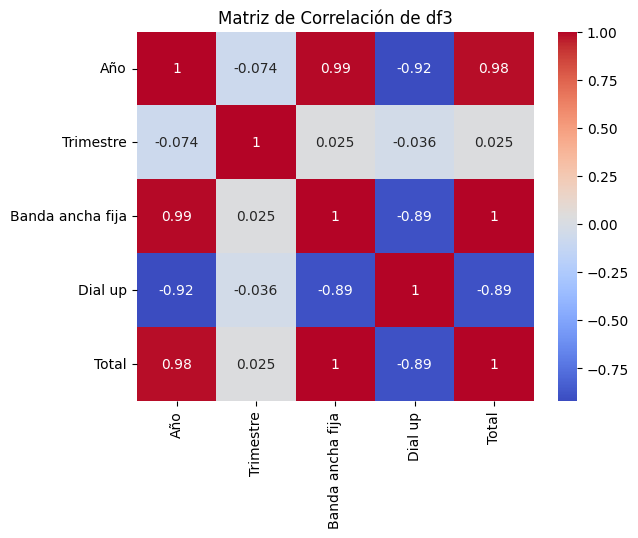

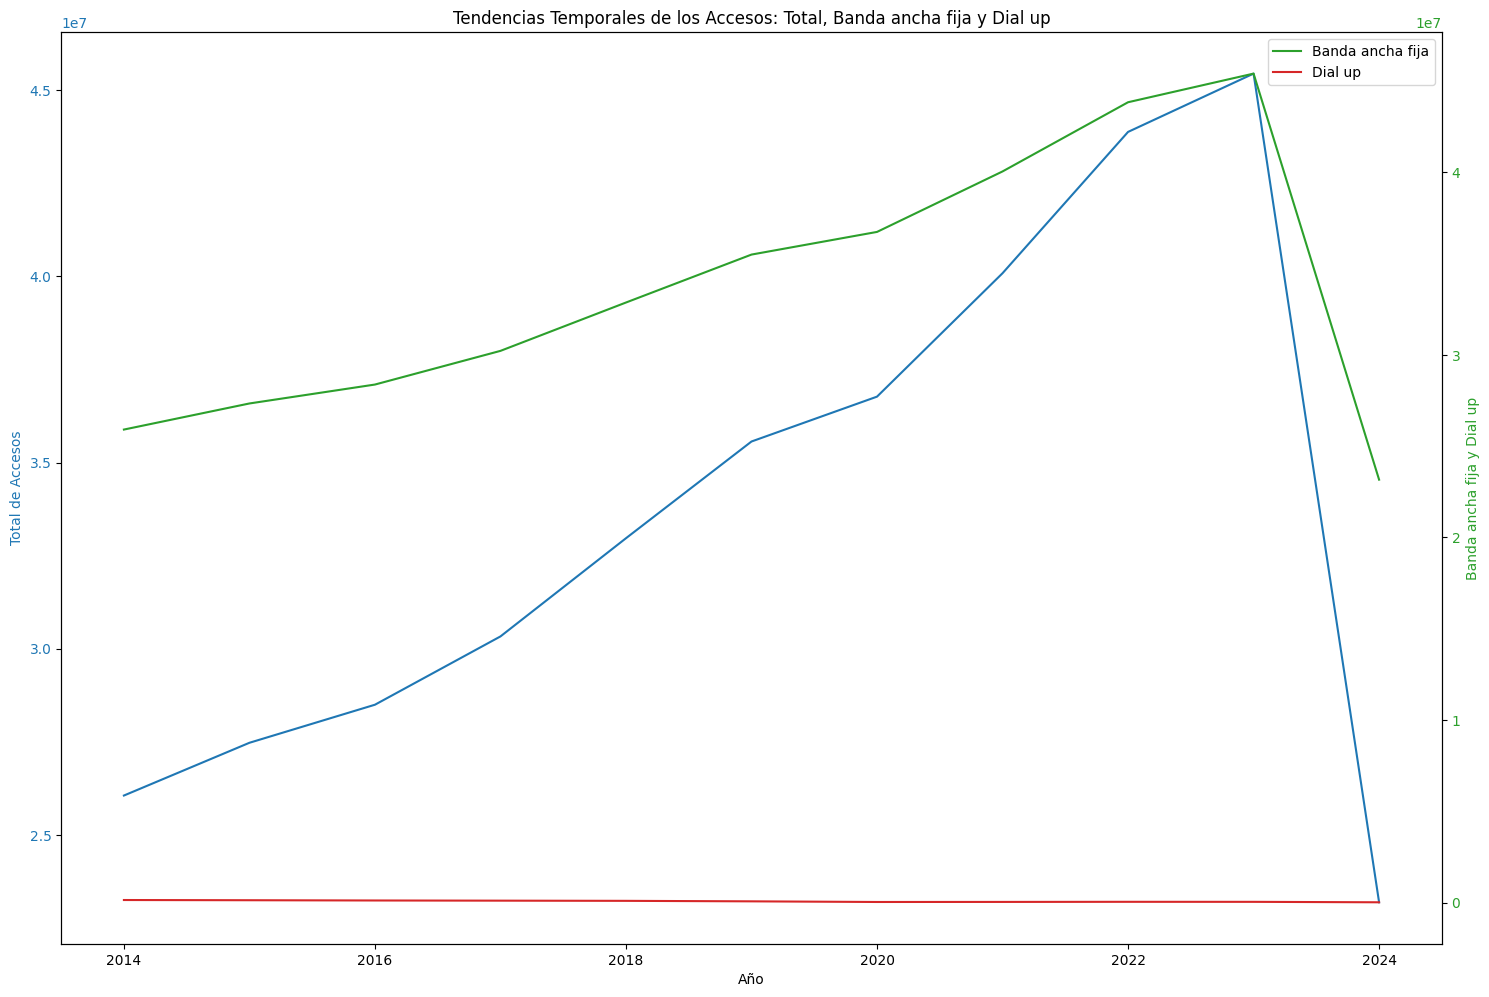

In [18]:
# Cargar la hoja 'Totales Dial-BAf' en el dataframe df3
df3 = pd.read_excel(file_path, sheet_name='Totales Dial-BAf')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df3.head())

# Búsqueda de valores faltantes
missing_values_df3 = df3.isnull().sum()
print("Valores faltantes por columna en df3:\n", missing_values_df3)

# Detección de registros duplicados
duplicate_records_df3 = df3.duplicated().sum()
print("Número de registros duplicados en df3:", duplicate_records_df3)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['Banda ancha fija', 'Dial up', 'Total']:
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df3[(df3[column] < lower_bound) | (df3[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df3[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df3[['Banda ancha fija', 'Dial up', 'Total']].hist(bins=30, figsize=(12, 8))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
correlation_matrix_df3 = df3.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df3, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df3')
plt.show()

# Análisis de Tendencias Temporales para df3
fig, ax1 = plt.subplots(figsize=(15, 10))

# Total en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Accesos', color=color)
ax1.plot(df3.groupby('Año')['Total'].sum(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Banda ancha fija y Dial up en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Banda ancha fija y Dial up', color=color)
ax2.plot(df3.groupby('Año')['Banda ancha fija'].sum(), color=color, label='Banda ancha fija')
ax2.plot(df3.groupby('Año')['Dial up'].sum(), color='tab:red', label='Dial up')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de los Accesos: Total, Banda ancha fija y Dial up')
plt.legend()
plt.show()




En el mapa de correlación anterior se evidencia que dado el bajo número de accesos a conexiones Dial up, la correlación del Total de Accesos con la variable Banda Ancha Fija es positivamente perfecta

Vamos a graficar la tendencia de los accesos para poder observar el histórico del mercado, y luego compararemos los ingresos en dólares contra los accesos para poder determinar el ingreso por acceso.

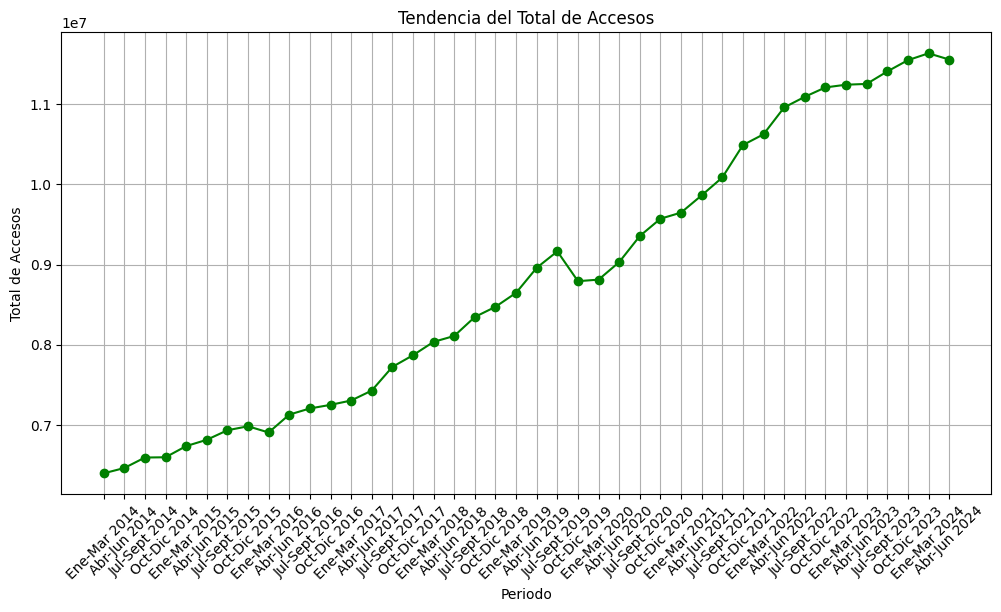

In [19]:
# Graficar la tendencia del 'Total de Accesos'
plt.figure(figsize=(12, 6))
plt.plot(df3['Periodo'][::-1], df3['Total'][::-1], marker='o', linestyle='-', color='g')
plt.xlabel('Periodo')
plt.ylabel('Total de Accesos')
plt.title('Tendencia del Total de Accesos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


En el siguiente gráfico observamos que a pesar de que los accesos se han ido incrementando con el paso del tiempo el ingreso por acceso ha ido disminuyendo lo que justifica el rango en el que se encuentra el comportamiento de los ingresos, esto pudo venir dado por una contracción de la economía como consecuencia de la pandemia y la crisis económica. 

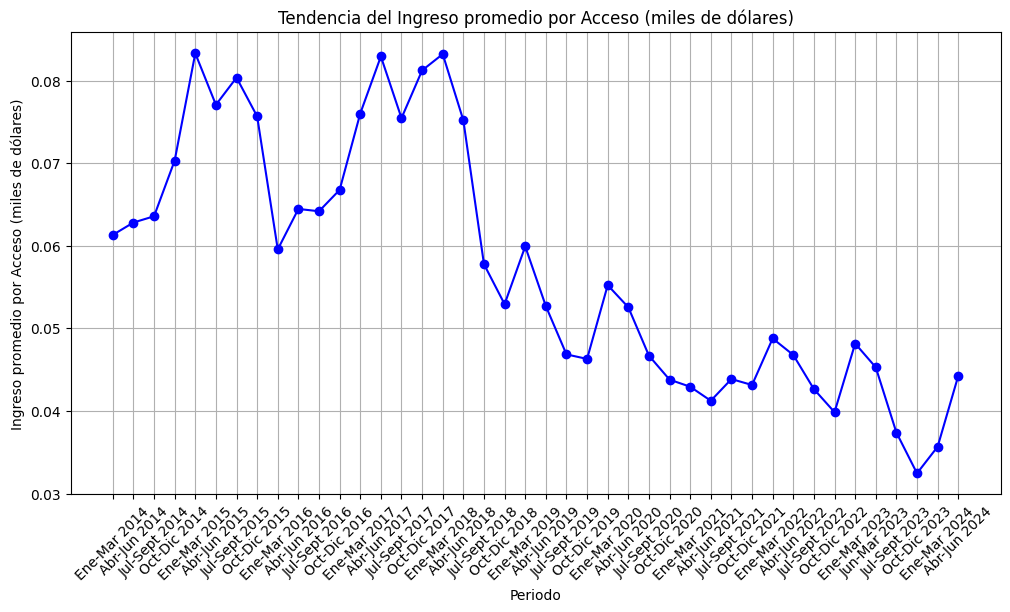

In [20]:
# Unir los dataframes df1 y df3 en función del 'Año' y 'Trimestre'
df_combined = pd.merge(df1, df3[['Año', 'Trimestre', 'Total']], on=['Año', 'Trimestre'], how='left')

# Calcular el 'Ingreso promedio por Acceso'
df_combined['Ingreso promedio por Acceso (miles de dólares)'] = df_combined['Ingreso (miles de dólares)'] / df_combined['Total']

# Graficar la tendencia del 'Ingreso promedio por Acceso'
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Periodo'][::-1], df_combined['Ingreso promedio por Acceso (miles de dólares)'][::-1], marker='o', linestyle='-', color='b')
plt.xlabel('Periodo')
plt.ylabel('Ingreso promedio por Acceso (miles de dólares)')
plt.title('Tendencia del Ingreso promedio por Acceso (miles de dólares)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


    Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0  2024          2     Buenos Aires           4983480   5900.0  4989380
1  2024          2  Capital Federal           1461549   2050.0  1463599
2  2024          2        Catamarca             75073      1.0    75074
3  2024          2            Chaco            147087      5.0   147092
4  2024          2           Chubut            173366    857.0   174223
Valores faltantes por columna en df4:
 Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64
Número de registros duplicados en df4: 984
Filas con valores atípicos en 'Banda ancha fija':
        Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0     2024          2     Buenos Aires           4983480   5900.0  4989380
1     2024          2  Capital Federal           1461549   2050.0  1463599
5     2024          2          Córdoba           1085711     63.0

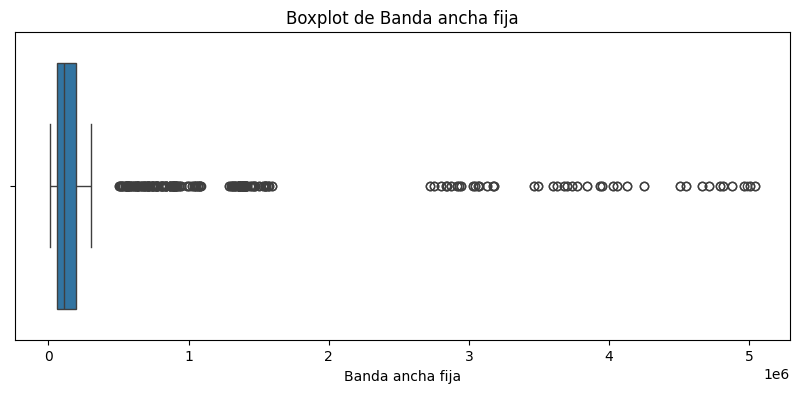

Filas con valores atípicos en 'Dial up':
        Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0     2024          2     Buenos Aires           4983480   5900.0  4989380
1     2024          2  Capital Federal           1461549   2050.0  1463599
24    2024          1     Buenos Aires           5038657   5900.0  5044557
25    2024          1  Capital Federal           1502661   2050.0  1504711
48    2023          4     Buenos Aires           5005720   5900.0  5011620
...    ...        ...              ...               ...      ...      ...
1968  2014          1     Buenos Aires           2725732  14144.0  2739876
1969  2014          1  Capital Federal           1289204  10714.0  1299918
1972  2014          1           Chubut             68205   2016.0    70221
1980  2014          1          Mendoza            164084   1761.0   165845
1982  2014          1          Neuquén             88077   2303.0    90380

[260 rows x 6 columns]


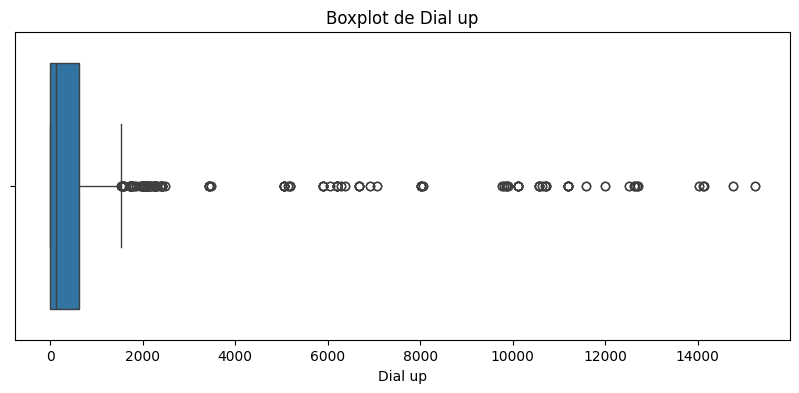

Filas con valores atípicos en 'Total':
        Año  Trimestre        Provincia  Banda ancha fija  Dial up    Total
0     2024          2     Buenos Aires           4983480   5900.0  4989380
1     2024          2  Capital Federal           1461549   2050.0  1463599
5     2024          2          Córdoba           1085711     63.0  1085774
20    2024          2         Santa Fe            930867    106.0   930973
24    2024          1     Buenos Aires           5038657   5900.0  5044557
...    ...        ...              ...               ...      ...      ...
1964  2014          2         Santa Fe            511753    605.0   512358
1968  2014          1     Buenos Aires           2725732  14144.0  2739876
1969  2014          1  Capital Federal           1289204  10714.0  1299918
1973  2014          1          Córdoba            566705    205.0   566910
1988  2014          1         Santa Fe            506000    612.0   506612

[332 rows x 6 columns]


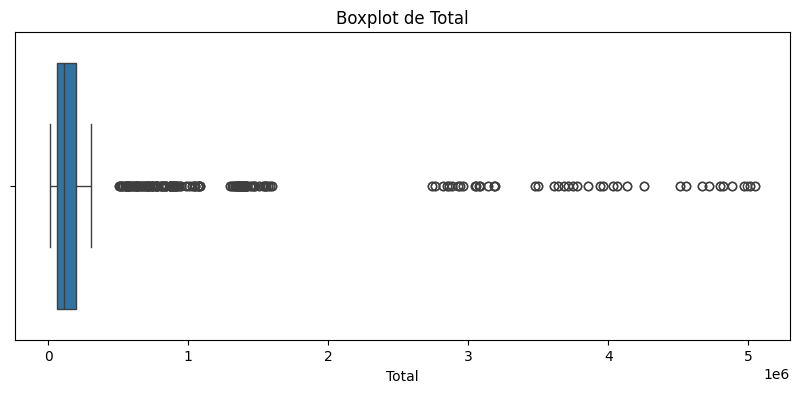

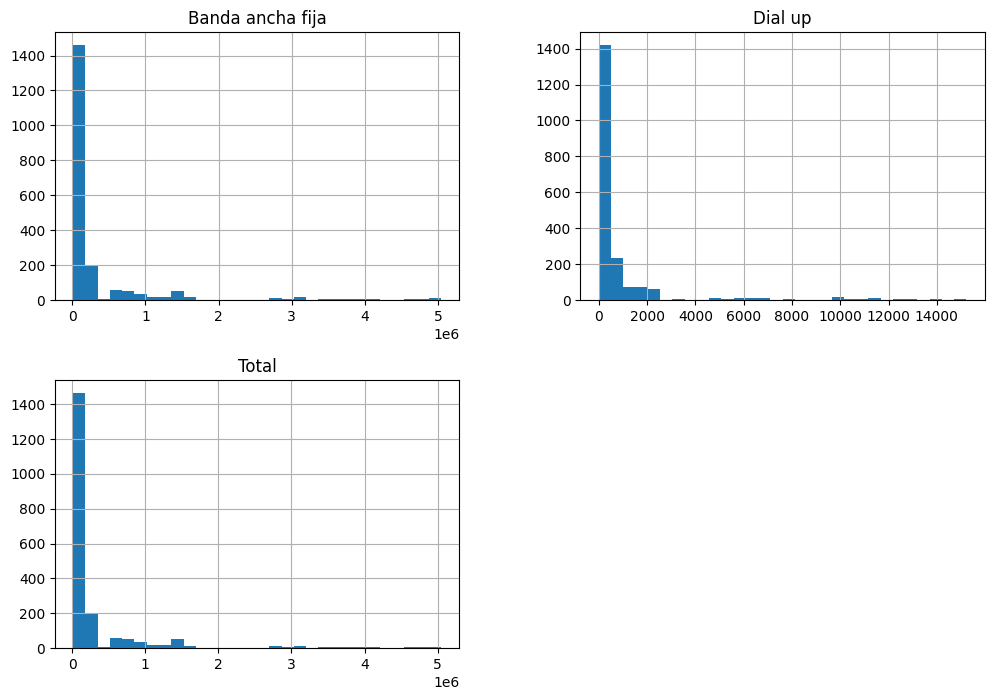

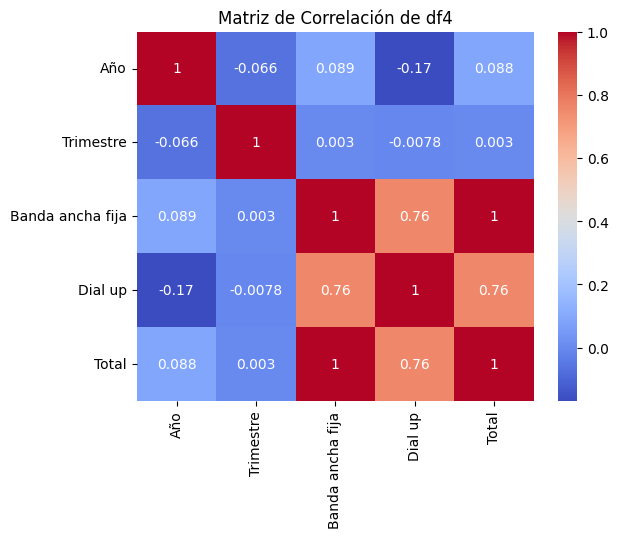

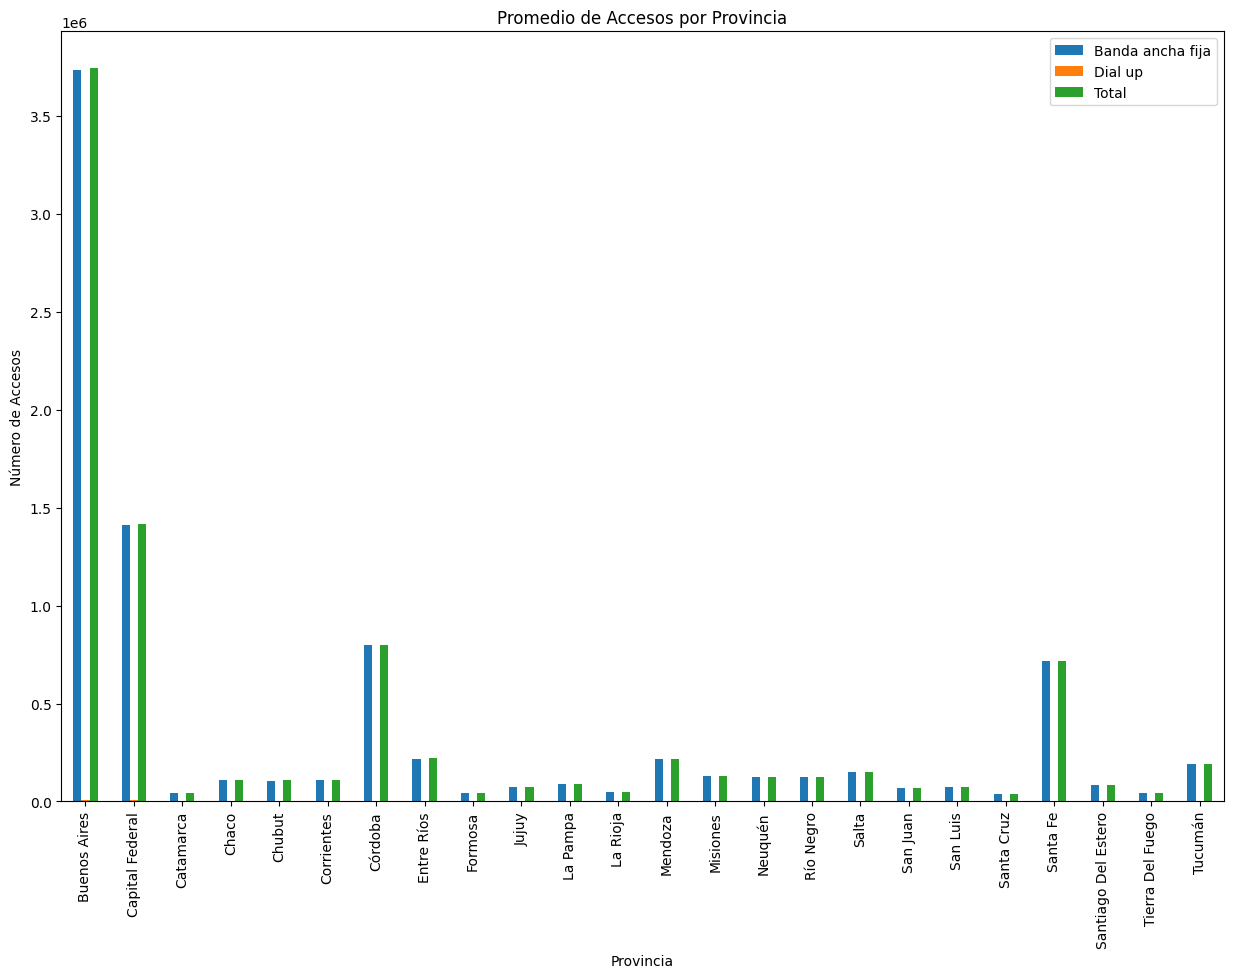

In [21]:
# Cargar la hoja 'Dial-BAf' en el dataframe df4
df4 = pd.read_excel(file_path, sheet_name='Dial-BAf')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df4.head())

# Búsqueda de valores faltantes
missing_values_df4 = df4.isnull().sum()
print("Valores faltantes por columna en df4:\n", missing_values_df4)

# Detección de registros duplicados
duplicate_records_df4 = df4.duplicated().sum()
print("Número de registros duplicados en df4:", duplicate_records_df4)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['Banda ancha fija', 'Dial up', 'Total']:
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df4[(df4[column] < lower_bound) | (df4[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df4[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df4[['Banda ancha fija', 'Dial up', 'Total']].hist(bins=30, figsize=(12, 8))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
correlation_matrix_df4 = df4.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df4, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de df4')
plt.show()

# Análisis por Grupos (Provincias)
df4.groupby('Provincia').mean()[['Banda ancha fija', 'Dial up', 'Total']].plot(kind='bar', figsize=(15, 10))
plt.title('Promedio de Accesos por Provincia')
plt.ylabel('Número de Accesos')
plt.show()


Visto el gráfico anterior, es relevante poder determinar cuáles son las provincias que agrupan el promedio del 80% superior de los accesos, esta información nos será relevante para conocer el o los mercados más importantes y más adelante al momento de identificar los competidores que se encuentran en esas provincias.

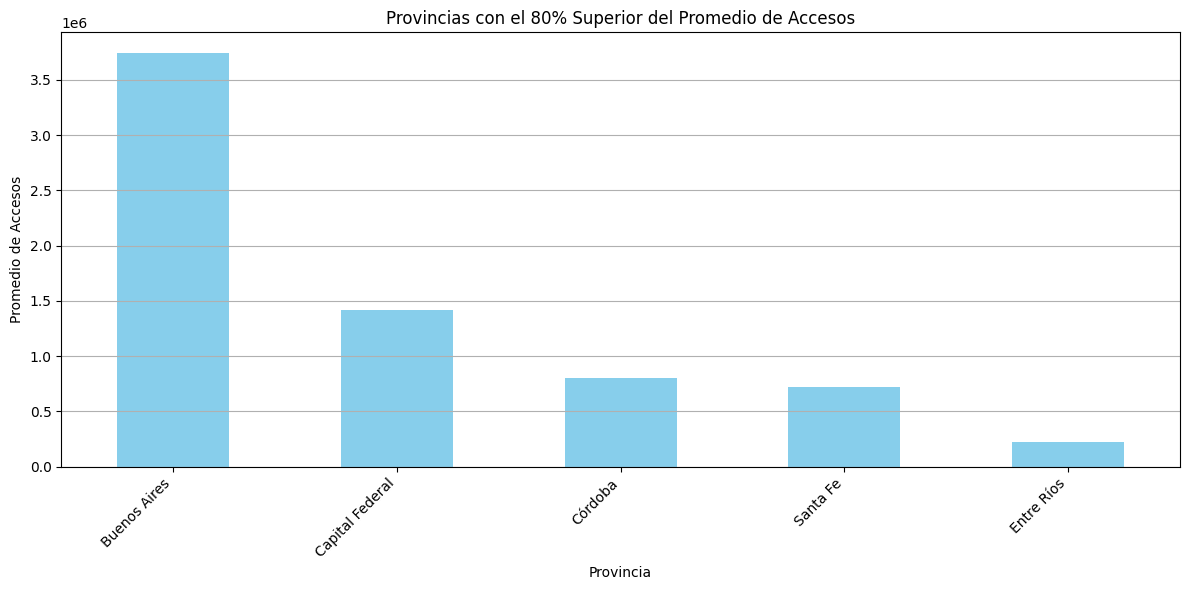

In [22]:
# Calcular el promedio de accesos por provincia
average_accesses_by_province = df4.groupby('Provincia')['Total'].mean().sort_values(ascending=False)

# Calcular el umbral del 80% superior del promedio de accesos
cumulative_percentage = average_accesses_by_province.cumsum() / average_accesses_by_province.sum()
top_80_provinces = cumulative_percentage[cumulative_percentage <= 0.80].index

# Filtrar las provincias que agrupan el 80% superior del promedio de accesos
df4_top_80 = df4[df4['Provincia'].isin(top_80_provinces)]

# Calcular el promedio de accesos para las provincias seleccionadas
top_80_average_accesses = df4_top_80.groupby('Provincia')['Total'].mean().sort_values(ascending=False)

# Graficar las provincias que agrupan el 80% superior del promedio de accesos
plt.figure(figsize=(12, 6))
top_80_average_accesses.plot(kind='bar', color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Promedio de Accesos')
plt.title('Provincias con el 80% Superior del Promedio de Accesos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Análisis Penetración

A continuación se realizará un análisis sobre la penetración medida por cada 100 hogares y por cada 100 habitantes.

    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  
Valores faltantes por columna en df7:
 Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64
Número de registros duplicados en df7: 0
Filas con valores atípicos en 'Accesos por cada 100 hogares':
 Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 10

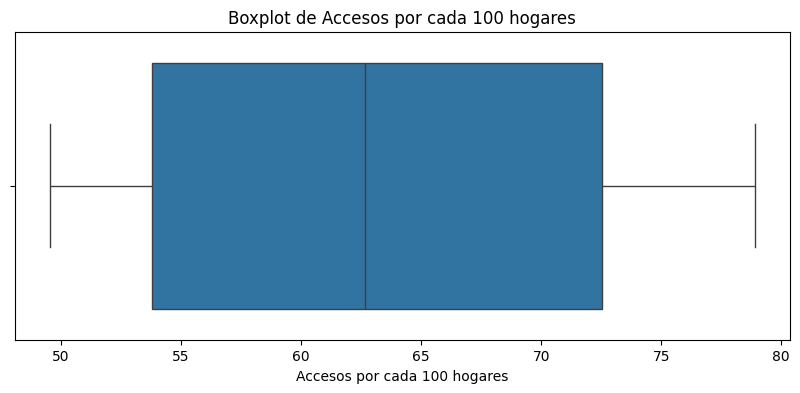

Filas con valores atípicos en 'Accesos por cada 100 hab':
 Empty DataFrame
Columns: [Año, Trimestre, Accesos por cada 100 hogares, Accesos por cada 100 hab, Periodo]
Index: []


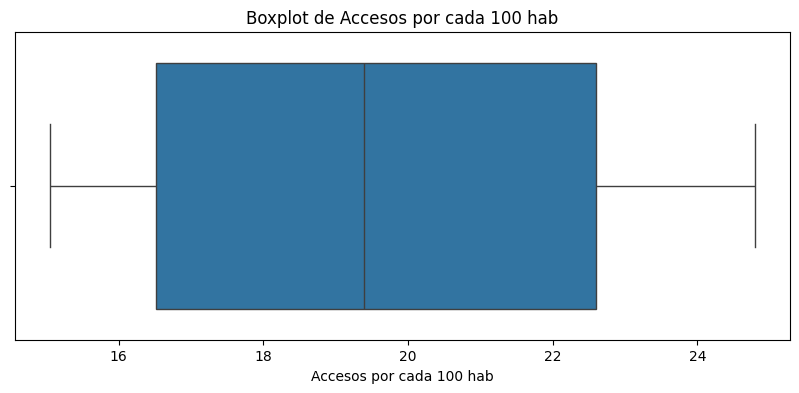

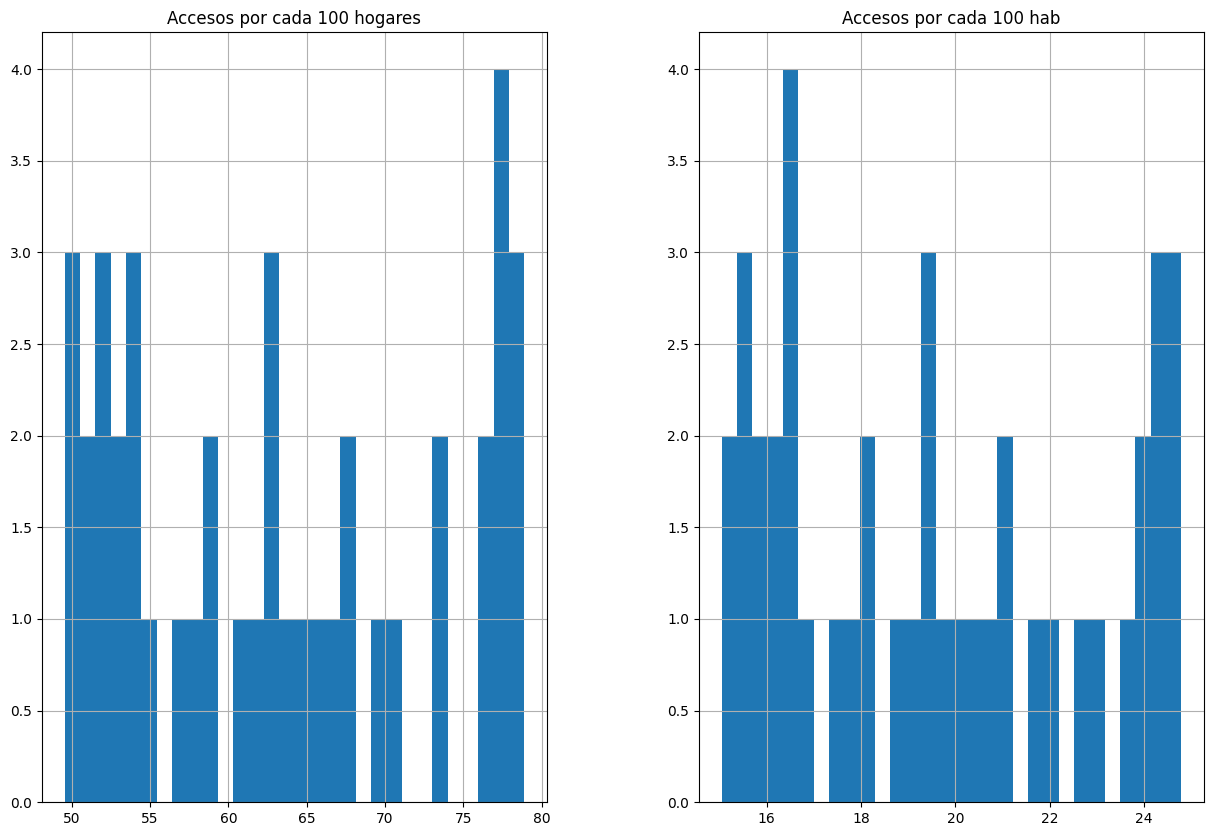

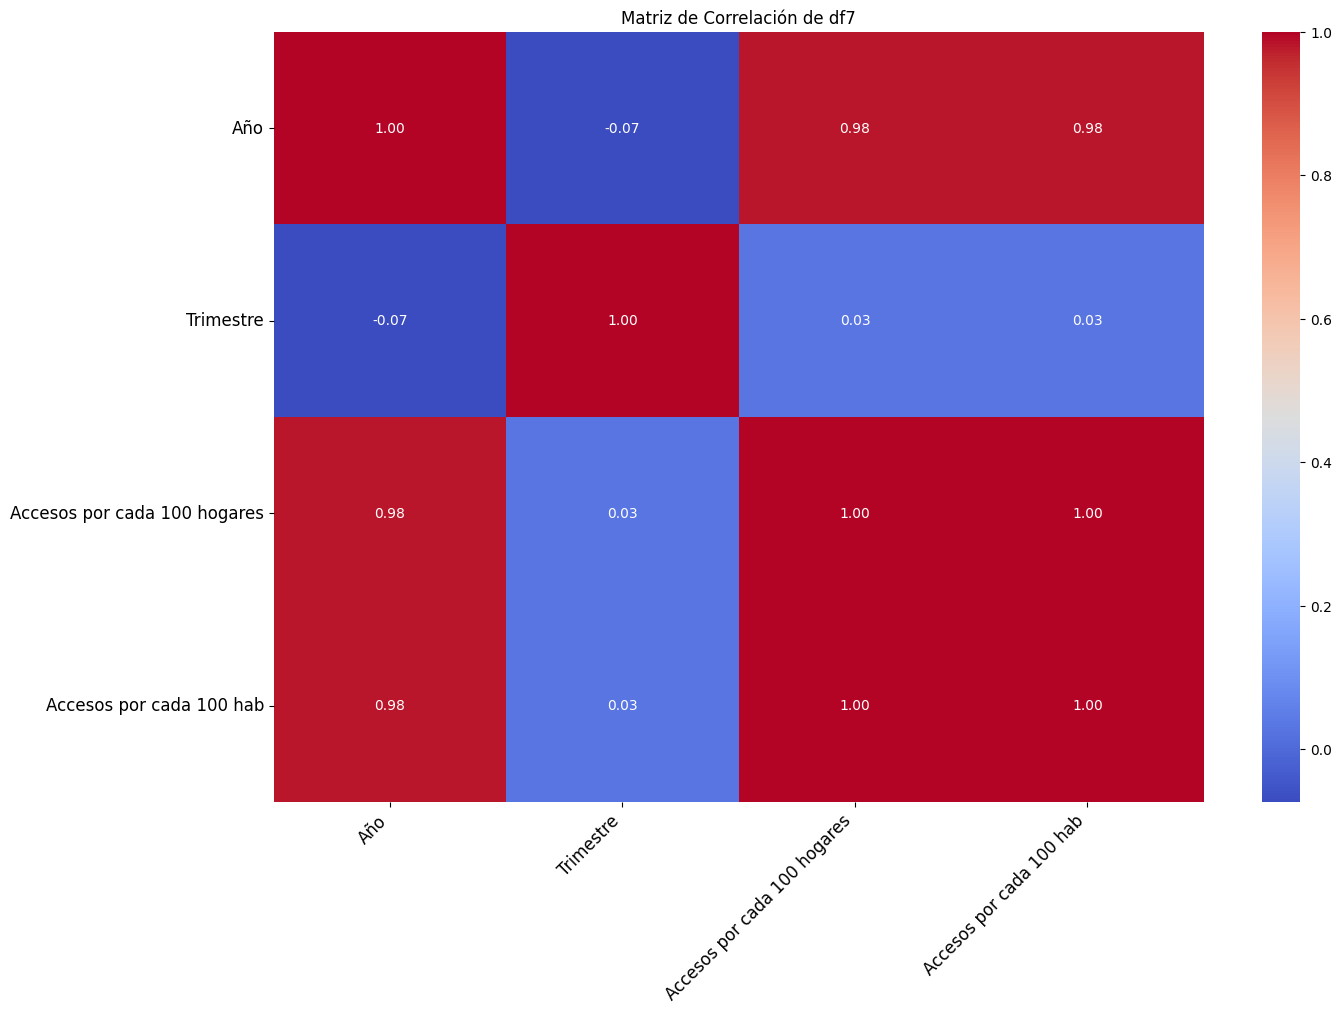

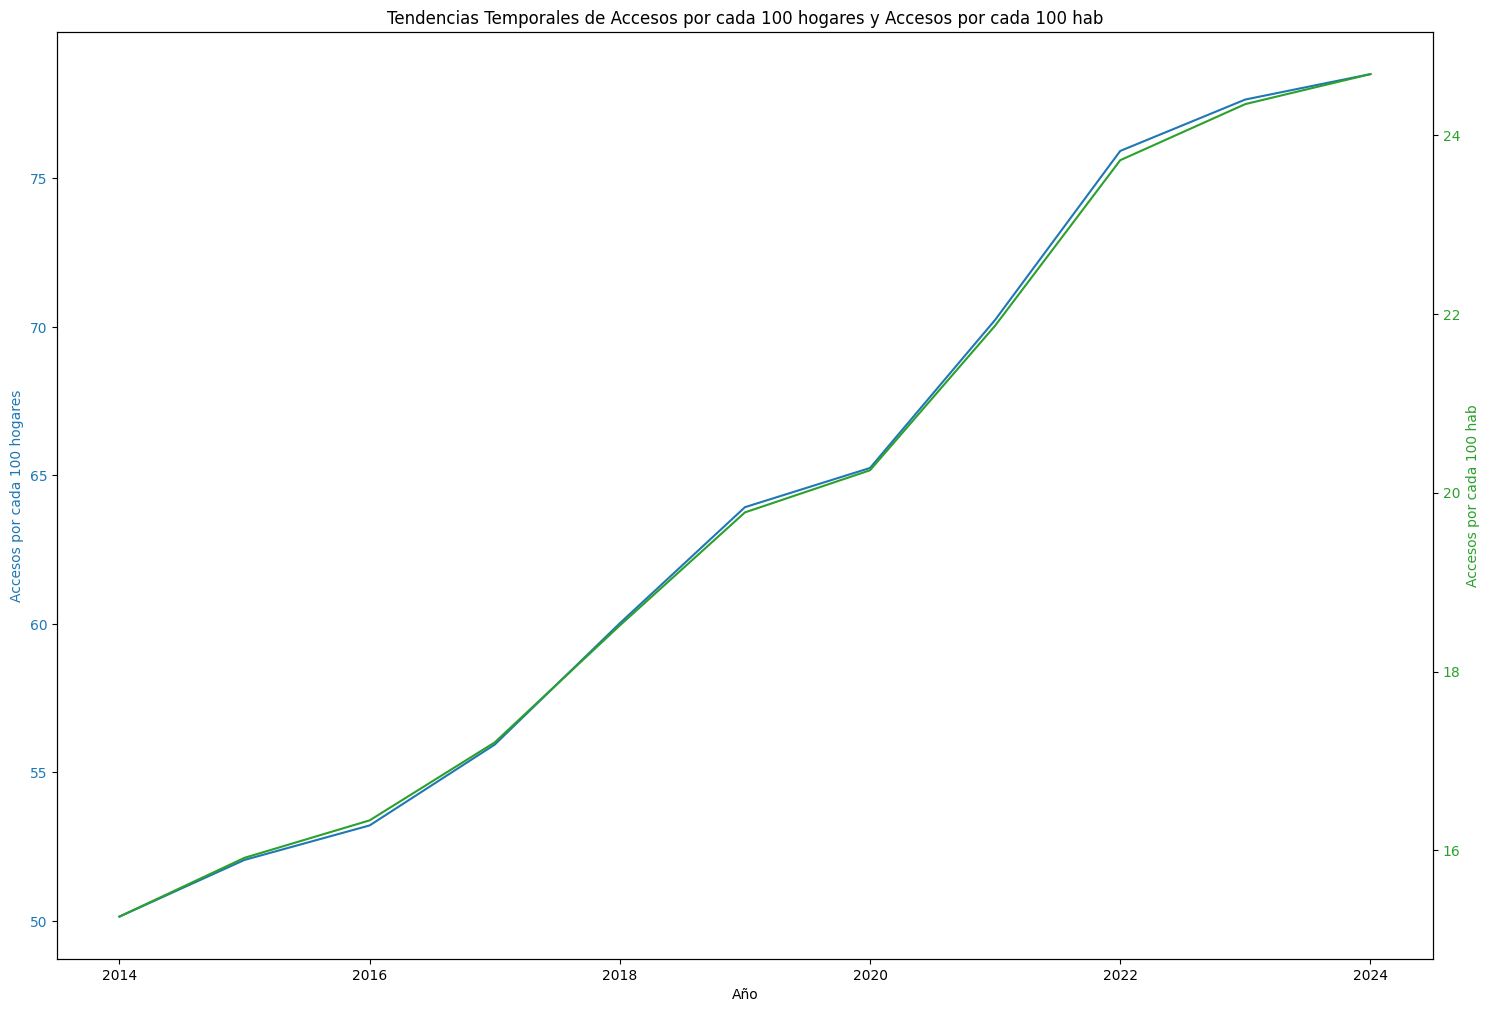

In [23]:
# Cargar la hoja 'Penetracion-totales' en el dataframe df7
df7 = pd.read_excel(file_path, sheet_name='Penetracion-totales')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df7.head())

# Búsqueda de valores faltantes
missing_values_df7 = df7.isnull().sum()
print("Valores faltantes por columna en df7:\n", missing_values_df7)

# Detección de registros duplicados
duplicate_records_df7 = df7.duplicated().sum()
print("Número de registros duplicados en df7:", duplicate_records_df7)

# Identificación de valores atípicos/extremos en las columnas numéricas
for column in ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']:
    Q1 = df7[column].quantile(0.25)
    Q3 = df7[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df7[(df7[column] < lower_bound) | (df7[column] > upper_bound)]
    print(f"Filas con valores atípicos en '{column}':\n", outliers)

    # Visualizar los valores atípicos con boxplots
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df7[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

# Análisis de Distribución
df7[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].hist(bins=30, figsize=(15, 10))
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(15, 10))
correlation_matrix_df7 = df7.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df7, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df7')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(15, 10))

# Accesos por cada 100 hogares en el eje Y de la izquierda
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos por cada 100 hogares', color=color)
ax1.plot(df7.groupby('Año')['Accesos por cada 100 hogares'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Accesos por cada 100 hab en el eje Y de la derecha
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accesos por cada 100 hab', color=color)
ax2.plot(df7.groupby('Año')['Accesos por cada 100 hab'].mean(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Accesos por cada 100 hogares y Accesos por cada 100 hab')
plt.show()

Se observa que el comportamiento es espejo, sustentado en la correlación positivamente perfecta entre las variables y en la tendencia calcada que tienen a lo largo del tiempo.

    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33
Valores faltantes por columna en df8:
 Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Número de registros duplicados en df8: 0
Filas con valores atípicos en 'Accesos por cada 100 hogares':
       Año  Trimestre        Provincia  Accesos por cada 100 hogares
25   2024          1  Capital Federal                    119.530000
49   2023          4  Capital Federal                    117.020000
121  2023          1  Capital Federal                    122.590000
145  2022          4  Capital Federal   

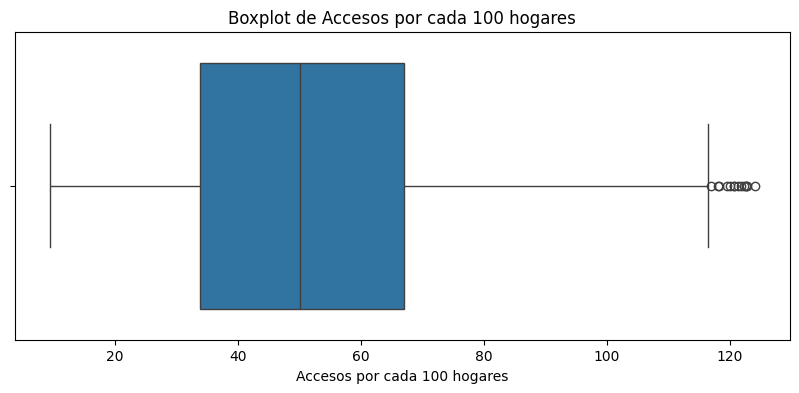

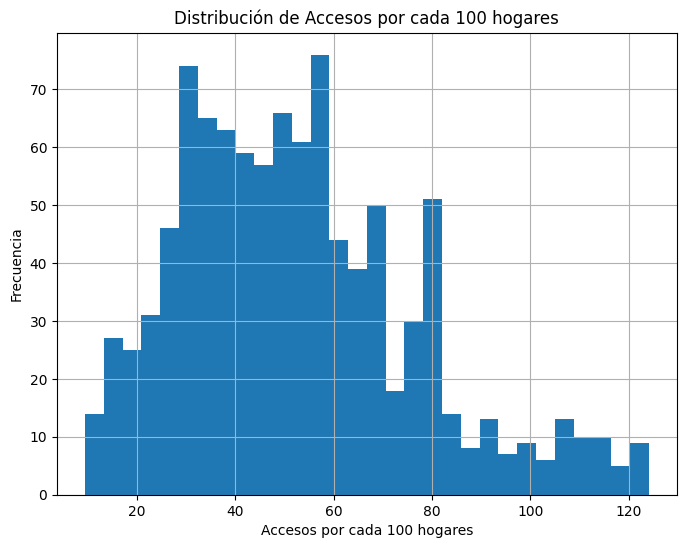

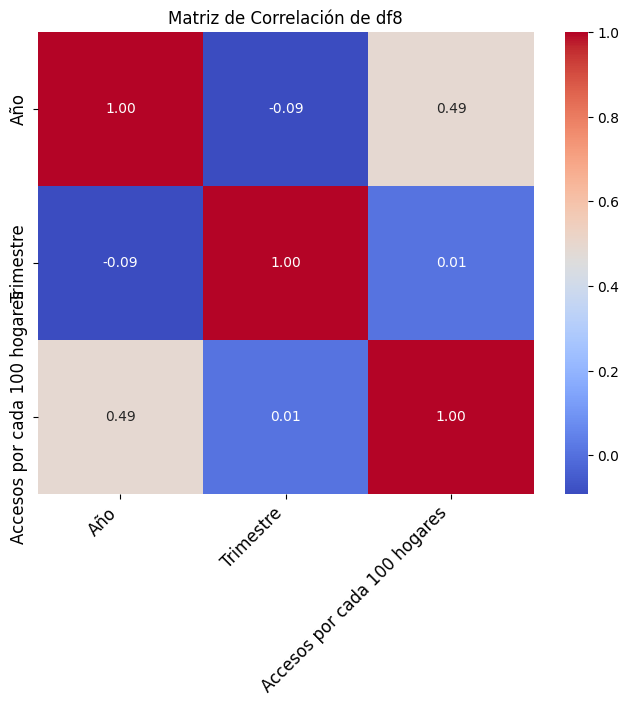

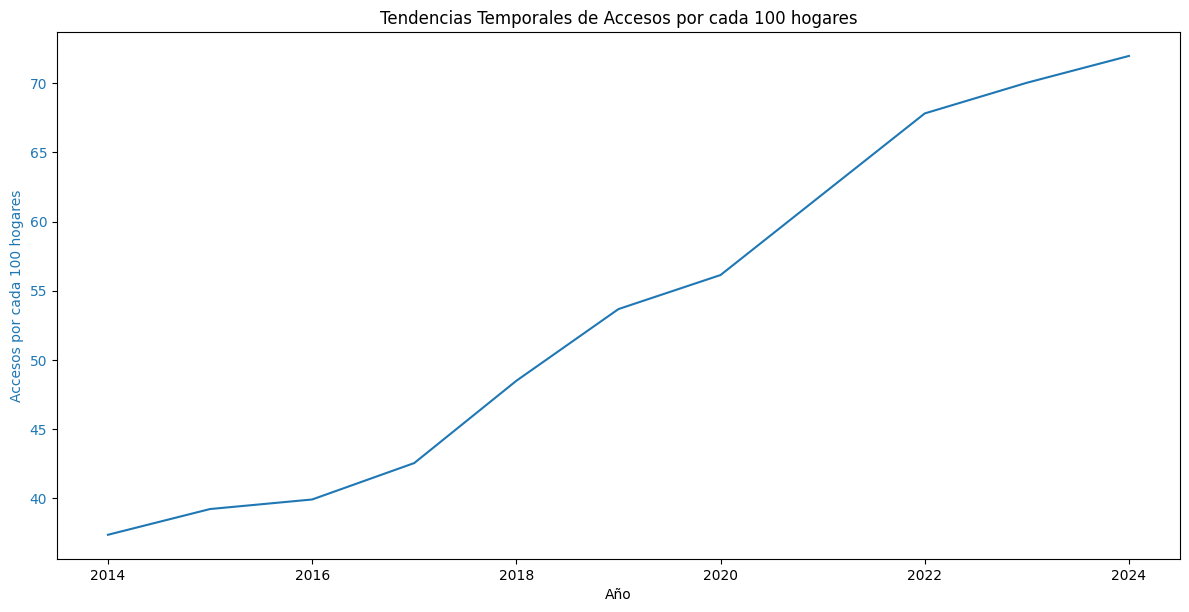

In [24]:
# Cargar la hoja 'Penetracion-hogares' en el dataframe df8
df8 = pd.read_excel(file_path, sheet_name='Penetracion-hogares')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df8.head())

# Búsqueda de valores faltantes
missing_values_df8 = df8.isnull().sum()
print("Valores faltantes por columna en df8:\n", missing_values_df8)

# Detección de registros duplicados
duplicate_records_df8 = df8.duplicated().sum()
print("Número de registros duplicados en df8:", duplicate_records_df8)

# Identificación de valores atípicos/extremos en la columna 'Accesos por cada 100 hogares'
Q1 = df8['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df8['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df8[(df8['Accesos por cada 100 hogares'] < lower_bound) | (df8['Accesos por cada 100 hogares'] > upper_bound)]
print("Filas con valores atípicos en 'Accesos por cada 100 hogares':\n", outliers)

# Visualizar los valores atípicos con boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=df8['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

# Análisis de Distribución
df8['Accesos por cada 100 hogares'].hist(bins=30, figsize=(8, 6))
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(8, 6))
correlation_matrix_df8 = df8.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df8, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df8')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Accesos por cada 100 hogares en el eje Y
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos por cada 100 hogares', color=color)
ax1.plot(df8.groupby('Año')['Accesos por cada 100 hogares'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Accesos por cada 100 hogares')
plt.show()

En este punto llama la atención los casos en la distribución de acceso mayores a 100, la mayoría de ellos se presentan en Capital Federal y la explicación que podría inferir de esto es que hay hogares en donde se encuentra más de una conexión.

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46
Valores faltantes por columna en df9:
 Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64
Número de registros duplicados en df9: 0
Filas con valores atípicos en 'Accesos por cada 100 hab':
       Año  Trimestre        Provincia  Accesos por cada 100 hab
1    2024          2  Capital Federal                 47.440000
25   2024          1  Capital Federal                 48.780000
49   2023          4  Capital Federal                 47.800000
73   2023          3  Capital Federal                 47.600000
97   2023          2  Capital Federa

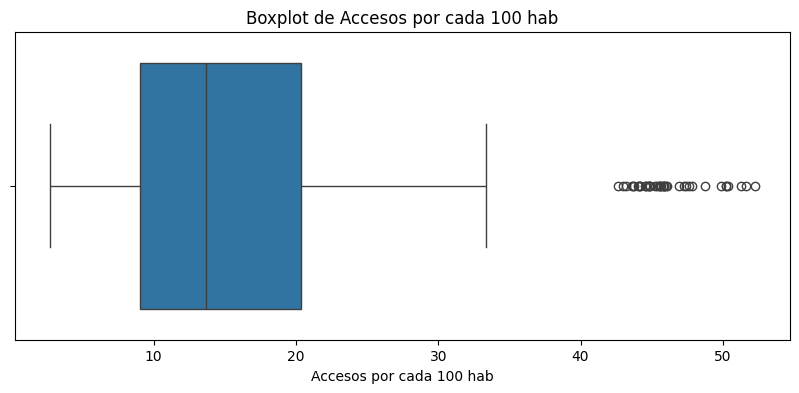

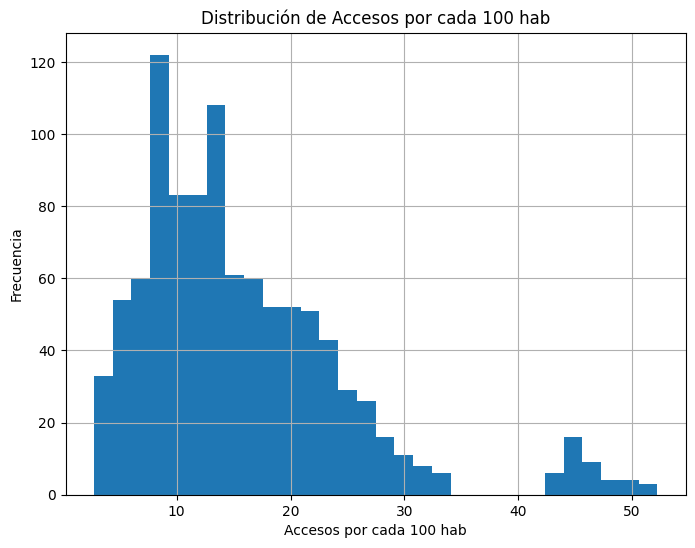

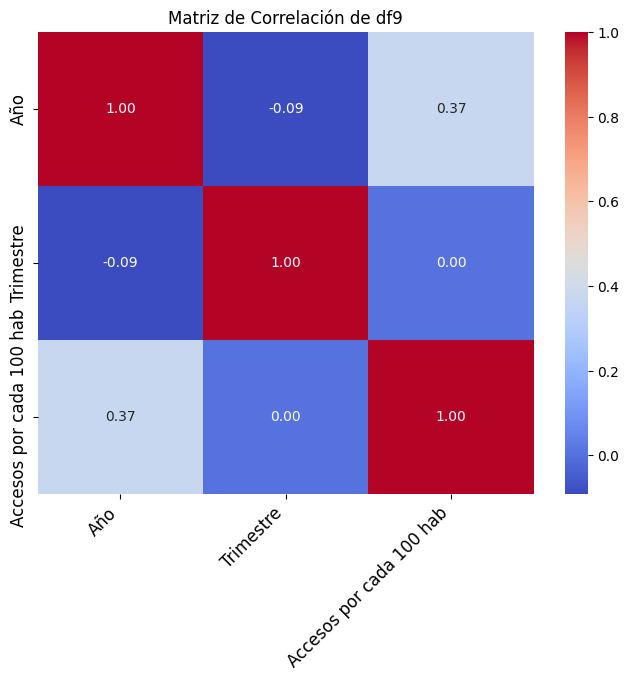

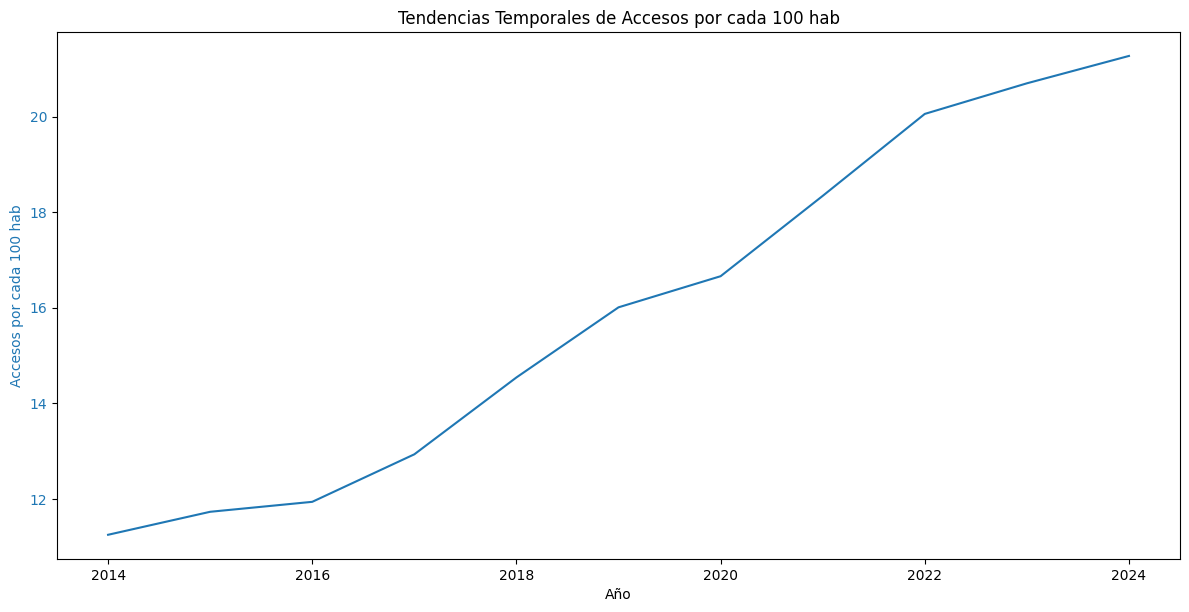

In [25]:
# Cargar la hoja 'Penetración-poblacion' en el dataframe df9
df9 = pd.read_excel(file_path, sheet_name='Penetración-poblacion')

# Mostrar las primeras filas del dataframe para entender su estructura
print(df9.head())

# Búsqueda de valores faltantes
missing_values_df9 = df9.isnull().sum()
print("Valores faltantes por columna en df9:\n", missing_values_df9)

# Detección de registros duplicados
duplicate_records_df9 = df9.duplicated().sum()
print("Número de registros duplicados en df9:", duplicate_records_df9)

# Identificación de valores atípicos/extremos en la columna 'Accesos por cada 100 hab'
Q1 = df9['Accesos por cada 100 hab'].quantile(0.25)
Q3 = df9['Accesos por cada 100 hab'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df9[(df9['Accesos por cada 100 hab'] < lower_bound) | (df9['Accesos por cada 100 hab'] > upper_bound)]
print("Filas con valores atípicos en 'Accesos por cada 100 hab':\n", outliers)

# Visualizar los valores atípicos con boxplots
plt.figure(figsize=(10, 4))
sns.boxplot(x=df9['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 hab')
plt.show()

# Análisis de Distribución
df9['Accesos por cada 100 hab'].hist(bins=30, figsize=(8, 6))
plt.title('Distribución de Accesos por cada 100 hab')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de Correlación (excluyendo columnas no numéricas)
plt.figure(figsize=(8, 6))
correlation_matrix_df9 = df9.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix_df9, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt=".2f")
plt.title('Matriz de Correlación de df9')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Análisis de Tendencias Temporales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Accesos por cada 100 hab en el eje Y
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('Accesos por cada 100 hab', color=color)
ax1.plot(df9.groupby('Año')['Accesos por cada 100 hab'].mean(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Tendencias Temporales de Accesos por cada 100 hab')
plt.show()

### Análisis de Competidores

A continuación vamos a observar un gráfico en donde observamos las provincias que agrupan el 80% superior de los proveedores de servicios de internet, esto para una noción de donde se agrupa la mayor competencia

                                             Miembro  \
0  GLOBALSAT ARGENTINA TELECOMUNICACIONES SRL 54 ...   
1  INTELIGLOBE COMUNICACIONES ARGENTINA SRL (IG N...   
2                         NUAGE SYSTEMS S.A (EMBLUE)   
3                            SERVICIO SATELITAL S.A.   
4                            TELESPAZIO ARGENTINA SA   

            Telefono Empresa                    Web Localidad  Provincia  
0  www.globalsatgroup.com.ar                                   ARGENTINA  
1           +54 11 5367 1940  www.ignetworks.com.ar            ARGENTINA  
2                 1141363500     www.embluemail.com            ARGENTINA  
3           +54 11 4317 1800   www.satelital.com.ar            ARGENTINA  
4            (011) 4852 8700  www.telespazio.com.ar            ARGENTINA  


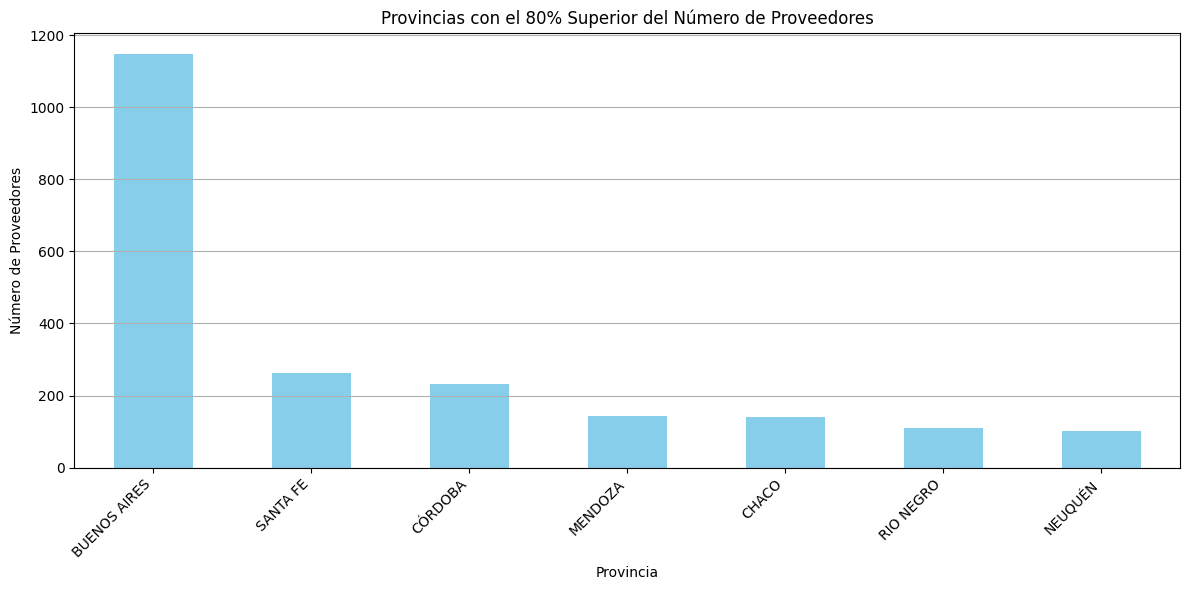

In [26]:
# Ruta del archivo PDF
file_path = "C:\\Users\\guard\\OneDrive\\Desktop\\Henry Data Science\\Proyecto PIDA\\Datos\\isp_por_provincias_2.pdf"

# Extraer tablas de las páginas del PDF (desde la página 2 hasta la página 77)
tables = camelot.read_pdf(file_path, pages='2-77')

# Combinar todas las tablas en un único dataframe
df_combined_pdf = pd.concat([table.df for table in tables], ignore_index=True)

# Asignar nombres a las columnas
df_combined_pdf.columns = ['Miembro', 'Telefono Empresa', 'Web', 'Localidad', 'Provincia']

# Mostrar las primeras filas del dataframe combinado
print(df_combined_pdf.head())

# Calcular el número de proveedores por provincia
provs_count = df_combined_pdf['Provincia'].value_counts()

# Calcular el umbral del 80% superior del número de proveedores
cumulative_percentage = provs_count.cumsum() / provs_count.sum()
top_80_provs = cumulative_percentage[cumulative_percentage <= 0.80].index

# Filtrar las provincias que agrupan el 80% superior del número de proveedores
df_top_80_provs = df_combined_pdf[df_combined_pdf['Provincia'].isin(top_80_provs)]

# Calcular el número de proveedores para las provincias seleccionadas
top_80_provs_count = df_top_80_provs['Provincia'].value_counts()

# Graficar las provincias que agrupan el 80% superior del número de proveedores
plt.figure(figsize=(12, 6))
top_80_provs_count.plot(kind='bar', color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Número de Proveedores')
plt.title('Provincias con el 80% Superior del Número de Proveedores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Conclusiones

Argentina posee 31.526km de fibra óptica, esto ha llevado a un incremento consistente en el número de accesos por cada 100 hogares llegando este dato a 77.66  para el año 2023. Sin embargo, la crisis que ha vivido la nación en los últimos años no ha permitido convertir ese número creciente de accesos a valor monetario, observándose una contracción del ingreso en dólares en los últimos años, concretamente desde el año 2017. Es importante señalar como se observó en el análisis de los datos, que el 80% de los proveedores de servicios se encuentran registrados en 7 provincias, lo que muestra una competencia importante por la oferta de servicios. Al observar el comportamiento de los ingresos en la industria del internet destaca el comportamiento estacionario del mismo, por lo que a nivel de marketing se recomiendo tomar en cuenta este comportamiento para el manejo de promociones. Se observa que a lo largo del tiempo de estudio la velocidad media presenta crecimiento consistente, esto como consecuencia de la migración tecnológica a equipos de mayor velocidad, sin embargo, este aumento de la velocidad no es consistente a lo largo del territorio, siendo notable la diferencia de velocidad media en Buenos Aires con el resto de las provincias.